# Задание к выпускной квалификационной работе
# по курсу «Data Science»

### Тема: Прогнозирование конечных свойств новых материалов (композиционных материалов). 
### Описание: 
Композиционные материалы — это искусственно созданные материалы, состоящие из нескольких других с четкой границей между ними. Композиты обладают теми свойствами, которые не наблюдаются у компонентов по отдельности. При этом композиты являются монолитным материалом, т. е. компоненты материала неотделимы друг от друга без разрушения конструкции в целом. Яркий пример композита - железобетон. Бетон прекрасно сопротивляется сжатию, но плохо растяжению. Стальная арматура внутри бетона компенсирует его неспособность сопротивляться растяжению, формируя тем самым новые, уникальные свойства. Современные композиты изготавливаются из других материалов: полимеры, керамика, стеклянные и углеродные волокна, но данный принцип сохраняется. У такого подхода есть и недостаток: даже если мы знаем характеристики исходных компонентов, определить характеристики композита, состоящего из этих компонентов, достаточно проблематично. Для решения этой проблемы есть два пути: физические испытания образцов материалов, или прогнозирование характеристик. Суть прогнозирования заключается в симуляции представительного элемента объема композита, на основе данных о характеристиках входящих компонентов (связующего и армирующего компонента).
На входе имеются данные о начальных свойствах компонентов композиционных материалов (количество связующего, наполнителя, температурный режим отверждения и т.д.). На выходе необходимо спрогнозировать ряд конечных свойств получаемых композиционных материалов. Кейс основан на реальных производственных задачах Центра НТИ «Цифровое материаловедение: новые материалы и вещества» (структурное подразделение МГТУ им. Н.Э. Баумана).
Актуальность: Созданные прогнозные модели помогут сократить количество проводимых испытаний, а также пополнить базу данных материалов возможными новыми характеристиками материалов, и цифровыми двойниками новых композитов.
Датасет со свойствами композитов. Объединение делать по индексу тип объединения INNER
https://drive.google.com/file/d/1B1s5gBlvgU81H9GGolLQVw_SOi-vyNf2/view?usp=sharing

### Требуется:
1)	Изучить теоретические основы и методы решения поставленной задачи.

2)	Провести разведочный анализ предложенных данных. Необходимо нарисовать гистограммы распределения каждой из переменной, диаграммы ящика с усами, попарные графики рассеяния точек. Необходимо также для каждой колонки получить среднее, медианное значение, провести анализ и исключение выбросов, проверить наличие пропусков.

3)	Провести предобработку данных (удаление шумов, нормализация и т.д.).

4)	Обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении. При построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.

5)	Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель.

6)	Разработать приложение с графическим интерфейсом или интерфейсом командной строки, которое будет выдавать прогноз, полученный в задании 4 или 5 (один или два прогноза, на выбор учащегося).

7)	Оценить точность модели на тренировочном и тестовом датасете.

8)	Создать репозиторий в GitHub / GitLab и разместить там код исследования. Оформить файл README.


### Задачи 2 - 4, 7  (применительно к методам задачи 4)

# Загрузка данных

In [1]:
# для определения времени выполнения ноутбука
import time
start_time = time.time()

In [2]:
# импорт библиотек
import pandas as pd
import numpy as np

In [3]:
# данные загружены с https://drive.google.com/file/d/1B1s5gBlvgU81H9GGolLQVw_SOi-vyNf2/view?usp=sharing
# путь к данным
Data_path_x_bp  = "Data\X_bp.xlsx"
Data_path_x_nup = "Data\X_nup.xlsx"


In [4]:
# загрузка из эксель-файлов
Data_x_bp  = pd.read_excel(Data_path_x_bp,  index_col=0)
Data_x_nup = pd.read_excel(Data_path_x_nup, index_col=0)

In [5]:
# посмотрим содержимое датасетов (выведем для просмотра первые пять строк)

In [6]:
Data_x_bp.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  
0                    220.0  
1                    220.0  
2                    220.0  
3                    220.0  
4                    220.0

In [7]:
Data_x_nup.head()

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0                   0          4.0               57.0
1                   0          4.0               60.0
2                   0          4.0               70.0
3                   0          5.0               47.0
4                   0          5.0               57.0

In [8]:
# посмотрим размер датасетов

In [9]:
Data_x_bp.shape

(1023, 10)

In [10]:
Data_x_nup.shape

(1040, 3)

# Объединение датасетов по типу INNER

In [11]:
# Из размерности видно, что количество строк в датасетах не совпадают.
# По условию задачи, необходимо выполнить объединение датасетов по индексу.
# Тип объединения INNER.

In [12]:
# выполняем объединение
df = Data_x_bp.merge(Data_x_nup, left_index = True, right_index = True, how = 'inner')

In [13]:
# выводим результат, первые пять строк, для удобства просмотра, 
# на экран выводим в транспонированном виде для удобства просмотра
df.head().T

0            1            2  \
Соотношение матрица-наполнитель          1.857143     1.857143     1.857143   
Плотность, кг/м3                      2030.000000  2030.000000  2030.000000   
модуль упругости, ГПа                  738.736842   738.736842   738.736842   
Количество отвердителя, м.%             30.000000    50.000000    49.900000   
Содержание эпоксидных групп,%_2         22.267857    23.750000    33.000000   
Температура вспышки, С_2               100.000000   284.615385   284.615385   
Поверхностная плотность, г/м2          210.000000   210.000000   210.000000   
Модуль упругости при растяжении, ГПа    70.000000    70.000000    70.000000   
Прочность при растяжении, МПа         3000.000000  3000.000000  3000.000000   
Потребление смолы, г/м2                220.000000   220.000000   220.000000   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              4.000000     4.000000     4.000000   
Плотность нашивки                       57.000000    60.000000    70.000000   

                                                3            4  
Соотношение матрица-наполнитель          1.857143     2.771331  
Плотность, кг/м3                      2030.000000  2030.000000  
модуль упругости, ГПа                  738.736842   753.000000  
Количество отвердителя, м.%            129.000000   111.860000  
Содержание эпоксидных групп,%_2         21.250000    22.267857  
Температура вспышки, С_2               300.000000   284.615385  
Поверхностная плотность, г/м2          210.000000   210.000000  
Модуль упругости при растяжении, ГПа    70.000000    70.000000  
Прочность при растяжении, МПа         3000.000000  3000.000000  
Потребление смолы, г/м2                220.000000   220.000000  
Угол нашивки, град                       0.000000     0.000000  
Шаг нашивки                              5.000000     5.000000  
Плотность нашивки                       47.000000    57.000000

In [14]:
# посмотрим размер объединенного датасета
df.shape

(1023, 13)

In [15]:
# вывод: при обединении, что и было изначально понятно,
# количество строк во втором датасете было изначально больше, поэтому при объединении
# должно было остаться строк меньше или равно 1023, количество столбцов - сумма столбцов двух датасетов

# Разведочный анализ данных

In [16]:
# информация о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [17]:
# вывод из информации о датасете:
# - типы данных только float64(12 столбцов), int64(1 столбец)
# - 1023 строки, 13 колонок

In [18]:
# Посчитаем количество пропущенных данных
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [19]:
# вывод:
# - пропусков данных нет

In [20]:
# Посчитаем количество дублирующих данных
df.duplicated().sum()

0

In [21]:
# вывод:
# - дублирующих данных нет

In [22]:
# Посчитаем количество уникальных данных в каждом столбце
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [23]:
# вывод:
# - все данные за исключением столбца "Угол нашивки, град" разные.
# - столбец "Угол нашивки, град" содержит только два вида значений

In [24]:
# посмотрим на уникальные значения в столбец "Угол нашивки, град"
print(df['Угол нашивки, град'].unique())

[ 0 90]


In [25]:
# столбец "Угол нашивки, град" содержит только два вида значений: 0 градусов и 90 градусов.
# проверим данные по столбцу "Угол нашивки, град" на сбалансированность, посчитаем количество значений

In [26]:
df['Угол нашивки, град'][df['Угол нашивки, град'] == 0].count()

520

In [27]:
df['Угол нашивки, град'][df['Угол нашивки, град'] == 90].count()

503

In [28]:
# вывод:
# количество значений равных 0 градусов - 520, количество значений равных 90 градусов - 503
# датасет по столбцу "Угол нашивки, град" - сбалансированный

In [29]:
# заменим столбец "Угол нашивки, град" категориальным признаком, двумя столбцами, которые добавим к датасету
# и удалим столбец "Угол нашивки, град"

In [30]:
df["Угол нашивки,  0 град"] = df['Угол нашивки, град'].replace({0 : 1, 90 : 0})
df["Угол нашивки, 90 град"] = df['Угол нашивки, град'].replace({0 : 0, 90 : 1})
df = df.drop('Угол нашивки, град', axis=1)

In [31]:
# Примечание: можно было использовать LabelEncoder или OneHotEncoder (SciKit Learn), но так как,
# датасет не большой и работу выполняем только с одним столбцом, достаточно возможностей pandas

In [32]:
# посмотрим, на результат
df.head().T

0            1            2  \
Соотношение матрица-наполнитель          1.857143     1.857143     1.857143   
Плотность, кг/м3                      2030.000000  2030.000000  2030.000000   
модуль упругости, ГПа                  738.736842   738.736842   738.736842   
Количество отвердителя, м.%             30.000000    50.000000    49.900000   
Содержание эпоксидных групп,%_2         22.267857    23.750000    33.000000   
Температура вспышки, С_2               100.000000   284.615385   284.615385   
Поверхностная плотность, г/м2          210.000000   210.000000   210.000000   
Модуль упругости при растяжении, ГПа    70.000000    70.000000    70.000000   
Прочность при растяжении, МПа         3000.000000  3000.000000  3000.000000   
Потребление смолы, г/м2                220.000000   220.000000   220.000000   
Шаг нашивки                              4.000000     4.000000     4.000000   
Плотность нашивки                       57.000000    60.000000    70.000000   
Угол нашивки,  0 град                    1.000000     1.000000     1.000000   
Угол нашивки, 90 град                    0.000000     0.000000     0.000000   

                                                3            4  
Соотношение матрица-наполнитель          1.857143     2.771331  
Плотность, кг/м3                      2030.000000  2030.000000  
модуль упругости, ГПа                  738.736842   753.000000  
Количество отвердителя, м.%            129.000000   111.860000  
Содержание эпоксидных групп,%_2         21.250000    22.267857  
Температура вспышки, С_2               300.000000   284.615385  
Поверхностная плотность, г/м2          210.000000   210.000000  
Модуль упругости при растяжении, ГПа    70.000000    70.000000  
Прочность при растяжении, МПа         3000.000000  3000.000000  
Потребление смолы, г/м2                220.000000   220.000000  
Шаг нашивки                              5.000000     5.000000  
Плотность нашивки                       47.000000    57.000000  
Угол нашивки,  0 град                    1.000000     1.000000  
Угол нашивки, 90 град                    0.000000     0.000000

In [33]:
# проверим, что количество не изменилось и равно 520
df['Угол нашивки,  0 град'][df['Угол нашивки,  0 град'] == 1].count()

520

In [34]:
# проверим, что количество не изменилось и равно 503
df['Угол нашивки, 90 град'][df['Угол нашивки, 90 град'] == 1].count()

503

### данные - физические параметры, 
### в датасете не должно быть значений отрицательных и равных нулю (кроме угла нашивки)

In [35]:
# определим значения в датасете, которые отрицательные или равные нулю (за исключением угла нашивки)

In [36]:
# функция для определения значений меньше или равных нулю
def detect_negative_or_equal_to_zero(data):
    find_value = []
    for i in data:
        if i <= 0:
            find_value.append(i)
    return find_value

In [37]:
print("Отрицательные либо равные нулю значения исследуюмых переменных (за исключением угла нашивки): ")
for df_col_num in df.iloc[:, 0:12].columns:
    negative_or_equal_to_zero_values = detect_negative_or_equal_to_zero(df[df_col_num])
    print(f"{df_col_num:>40}", " - ", negative_or_equal_to_zero_values)

Отрицательные либо равные нулю значения исследуюмых переменных (за исключением угла нашивки): 
         Соотношение матрица-наполнитель  -  []
                        Плотность, кг/м3  -  []
                   модуль упругости, ГПа  -  []
             Количество отвердителя, м.%  -  []
         Содержание эпоксидных групп,%_2  -  []
                Температура вспышки, С_2  -  []
           Поверхностная плотность, г/м2  -  []
    Модуль упругости при растяжении, ГПа  -  []
           Прочность при растяжении, МПа  -  []
                 Потребление смолы, г/м2  -  []
                             Шаг нашивки  -  [0.0]
                       Плотность нашивки  -  [0.0]


In [38]:
# удаляем нулевые значения шага и плотности нашивки
for df_col_num in df.iloc[:, 0:12].columns:
    negative_or_equal_to_zero_values = detect_negative_or_equal_to_zero(df[df_col_num])
    df = df[df[df_col_num].isin (negative_or_equal_to_zero_values) == False ]

In [39]:
# проверяем еще раз на отрицательность и равенство нулю
print("Отрицательные либо равные нулю значения исследуюмых переменных (за исключением угла нашивки): ")
for df_col_num in df.iloc[:, 0:12].columns:
    negative_or_equal_to_zero_values = detect_negative_or_equal_to_zero(df[df_col_num])
    print(f"{df_col_num:>40}", " - ", negative_or_equal_to_zero_values)

Отрицательные либо равные нулю значения исследуюмых переменных (за исключением угла нашивки): 
         Соотношение матрица-наполнитель  -  []
                        Плотность, кг/м3  -  []
                   модуль упругости, ГПа  -  []
             Количество отвердителя, м.%  -  []
         Содержание эпоксидных групп,%_2  -  []
                Температура вспышки, С_2  -  []
           Поверхностная плотность, г/м2  -  []
    Модуль упругости при растяжении, ГПа  -  []
           Прочность при растяжении, МПа  -  []
                 Потребление смолы, г/м2  -  []
                             Шаг нашивки  -  []
                       Плотность нашивки  -  []


In [40]:
# проверим количество срок в датасете, должно стать 1022 (было 1023, одну удалили)
df.shape

(1022, 14)

In [41]:
# Посмотрим описательную статистику по датасету
df.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1022.0     2.929777    0.913475   
Плотность, кг/м3                      1022.0  1975.730715   73.765207   
модуль упругости, ГПа                 1022.0   739.489694  330.101862   
Количество отвердителя, м.%           1022.0   110.569507   28.309736   
Содержание эпоксидных групп,%_2       1022.0    22.244367    2.407479   
Температура вспышки, С_2              1022.0   285.883391   40.963286   
Поверхностная плотность, г/м2         1022.0   482.215915  280.967801   
Модуль упругости при растяжении, ГПа  1022.0    73.324000    3.117080   
Прочность при растяжении, МПа         1022.0  2467.379714  485.645758   
Потребление смолы, г/м2               1022.0   218.343323   59.710570   
Шаг нашивки                           1022.0     6.905973    2.555608   
Плотность нашивки                     1022.0    57.209853   12.226746   
Угол нашивки,  0 град                 1022.0     0.507828    0.500183   
Угол нашивки, 90 град                 1022.0     0.492172    0.500183   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317247     2.906630   
Плотность, кг/м3                      1731.764635  1924.134147  1977.603973   
модуль упругости, ГПа                    2.436909   499.321940   739.310747   
Количество отвердителя, м.%             17.740275    92.431413   110.549159   
Содержание эпоксидных групп,%_2         14.254985    20.607747    22.230545   
Температура вспышки, С_2               100.000000   259.029216   285.922290   
Поверхностная плотность, г/м2            0.603740   266.654559   451.588705   
Модуль упругости при растяжении, ГПа    64.054061    71.241213    73.266770   
Прочность при растяжении, МПа         1036.856605  2136.259145  2460.260972   
Потребление смолы, г/м2                 33.803026   179.604490   219.189018   
Шаг нашивки                              0.037639     5.081732     6.922196   
Плотность нашивки                       11.740126    49.852483    57.362576   
Угол нашивки,  0 град                    0.000000     0.000000     1.000000   
Угол нашивки, 90 град                    0.000000     0.000000     0.000000   

                                              75%          max  
Соотношение матрица-наполнитель          3.552781     5.591742  
Плотность, кг/м3                      2021.384103  2207.773481  
модуль упругости, ГПа                  960.465724  1911.536477  
Количество отвердителя, м.%            129.732521   198.953207  
Содержание эпоксидных групп,%_2         23.962050    33.000000  
Температура вспышки, С_2               313.012786   413.273418  
Поверхностная плотность, г/м2          692.342336  1399.542362  
Модуль упругости при растяжении, ГПа    75.338920    82.682051  
Прочность при растяжении, МПа         2768.016102  3848.436732  
Потребление смолы, г/м2                257.399329   414.590628  
Шаг нашивки                              8.586378    14.440522  
Плотность нашивки                       64.959026   103.988901  
Угол нашивки,  0 град                    1.000000     1.000000  
Угол нашивки, 90 град                    1.000000     1.000000

In [42]:
# отдельно выведем среднее и медианное значение (примечание: условие задания)
df.describe().loc[['mean', '50%']].T

mean          50%
Соотношение матрица-наполнитель          2.929777     2.906630
Плотность, кг/м3                      1975.730715  1977.603973
модуль упругости, ГПа                  739.489694   739.310747
Количество отвердителя, м.%            110.569507   110.549159
Содержание эпоксидных групп,%_2         22.244367    22.230545
Температура вспышки, С_2               285.883391   285.922290
Поверхностная плотность, г/м2          482.215915   451.588705
Модуль упругости при растяжении, ГПа    73.324000    73.266770
Прочность при растяжении, МПа         2467.379714  2460.260972
Потребление смолы, г/м2                218.343323   219.189018
Шаг нашивки                              6.905973     6.922196
Плотность нашивки                       57.209853    57.362576
Угол нашивки,  0 град                    0.507828     1.000000
Угол нашивки, 90 град                    0.492172     0.000000

In [43]:
# в описательной статистеке по каждому столюбцу (по каждому признаку), вычисляются:
# - count - количество значений отличных от NA / null, по всем столбцам значение одинаковое и равно 1023
# - mean - среднее значение
# - std - стандартное отклонение
# - min - минимальное значение
# - max - максимальное значение
# - 25%, 50%, 75% - процентили (25% - нижний процентиль, 50% - совпадает с медианой, 75% - верхний процентиль)

In [44]:
# вывод из описательной статистики:
# по некоторым признакам (столбцам) довольно большой разброс значений между минимумом и максимумом
# и как следствие большое отклонение от медианы (например "Поверхностная плотность", "модуль упругости")
# необходим дополнительный анализ на выбросы.
# Так как, среднее и медиана близки по значениям, то в целом датасет хорошо сбалансирован.

# Гистограммы распределения признаков (переменных)

In [45]:
import matplotlib.pyplot as plt

In [46]:
%matplotlib inline

In [47]:
# Построим гистограммы распределения каждой из переменных.
# Примечание: данные в датасете без нормализации и исключения выбросов

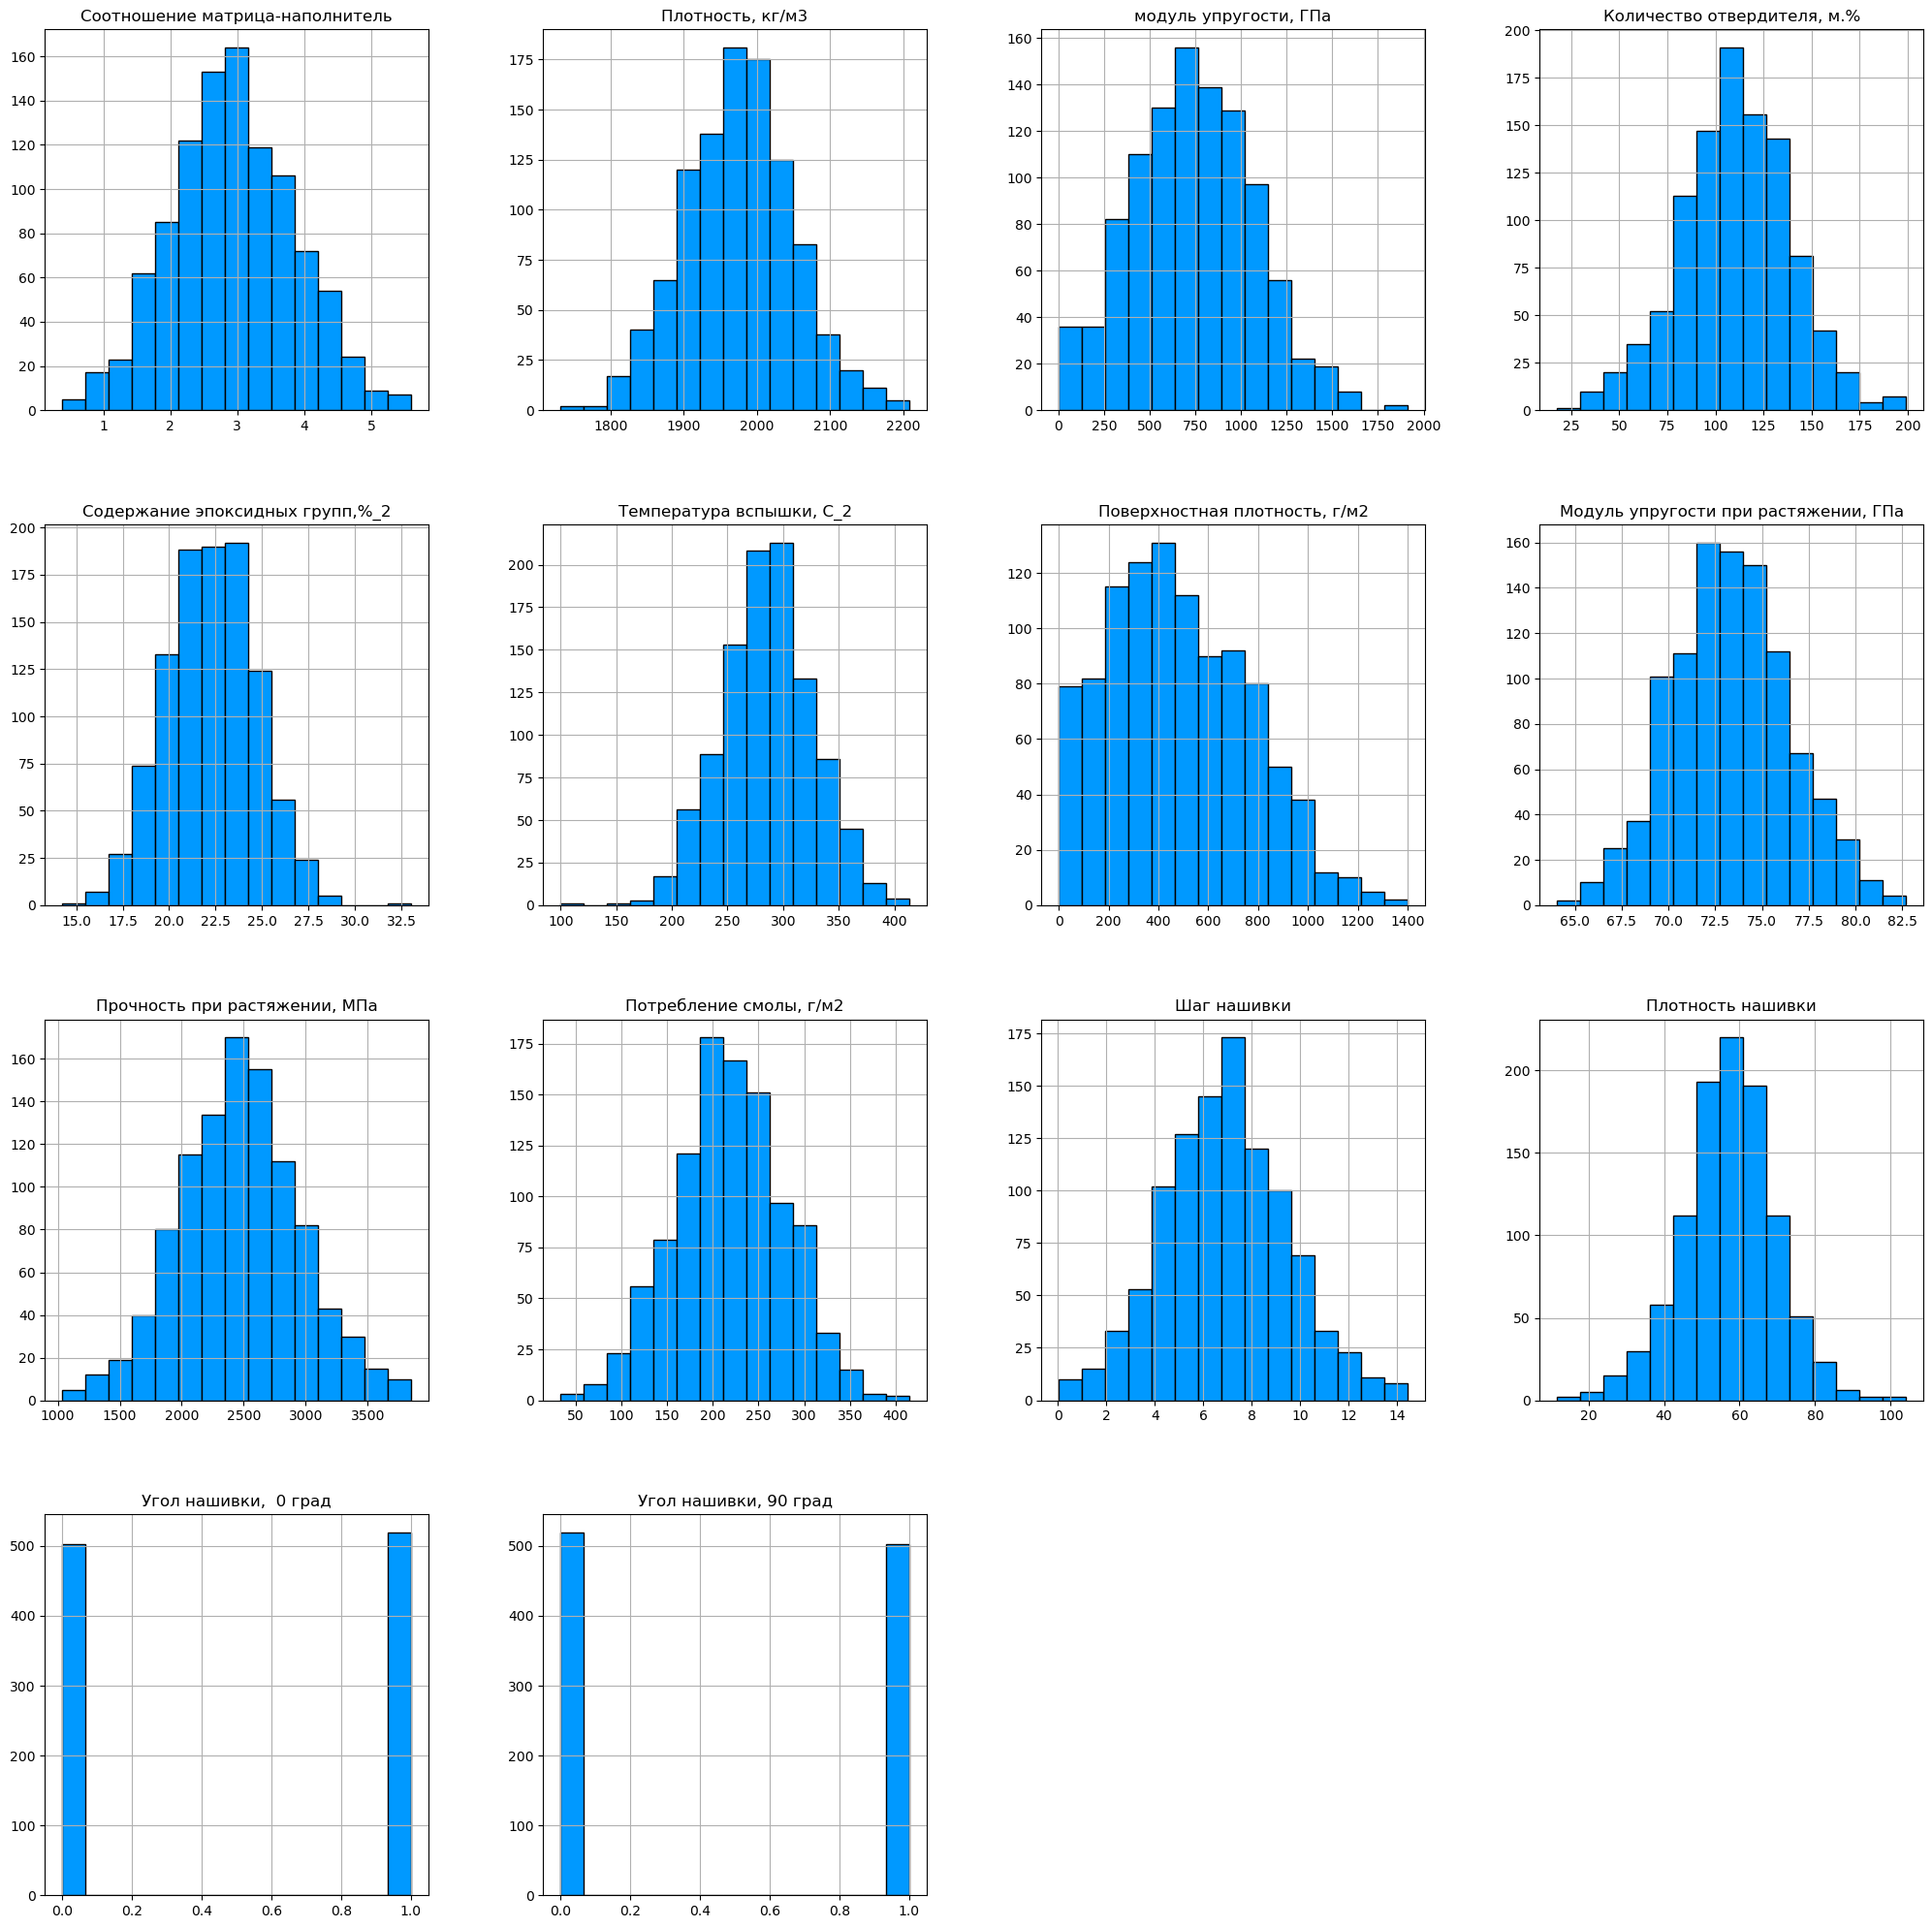

In [48]:
df.hist(figsize = (25,25), color = '#0099FF', edgecolor = 'black', bins = 15)
plt.savefig('Images\hist1.png')
plt.show()

In [49]:
# Вывод: из гистограмм распределений видно, что все признаки, за исключением "угол нашивки, 0 град", "угол нашивки, 90 град"
# имеют вид близкого к нормальному распределению

In [50]:
import seaborn as sns
sns.set(font_scale=1.5)

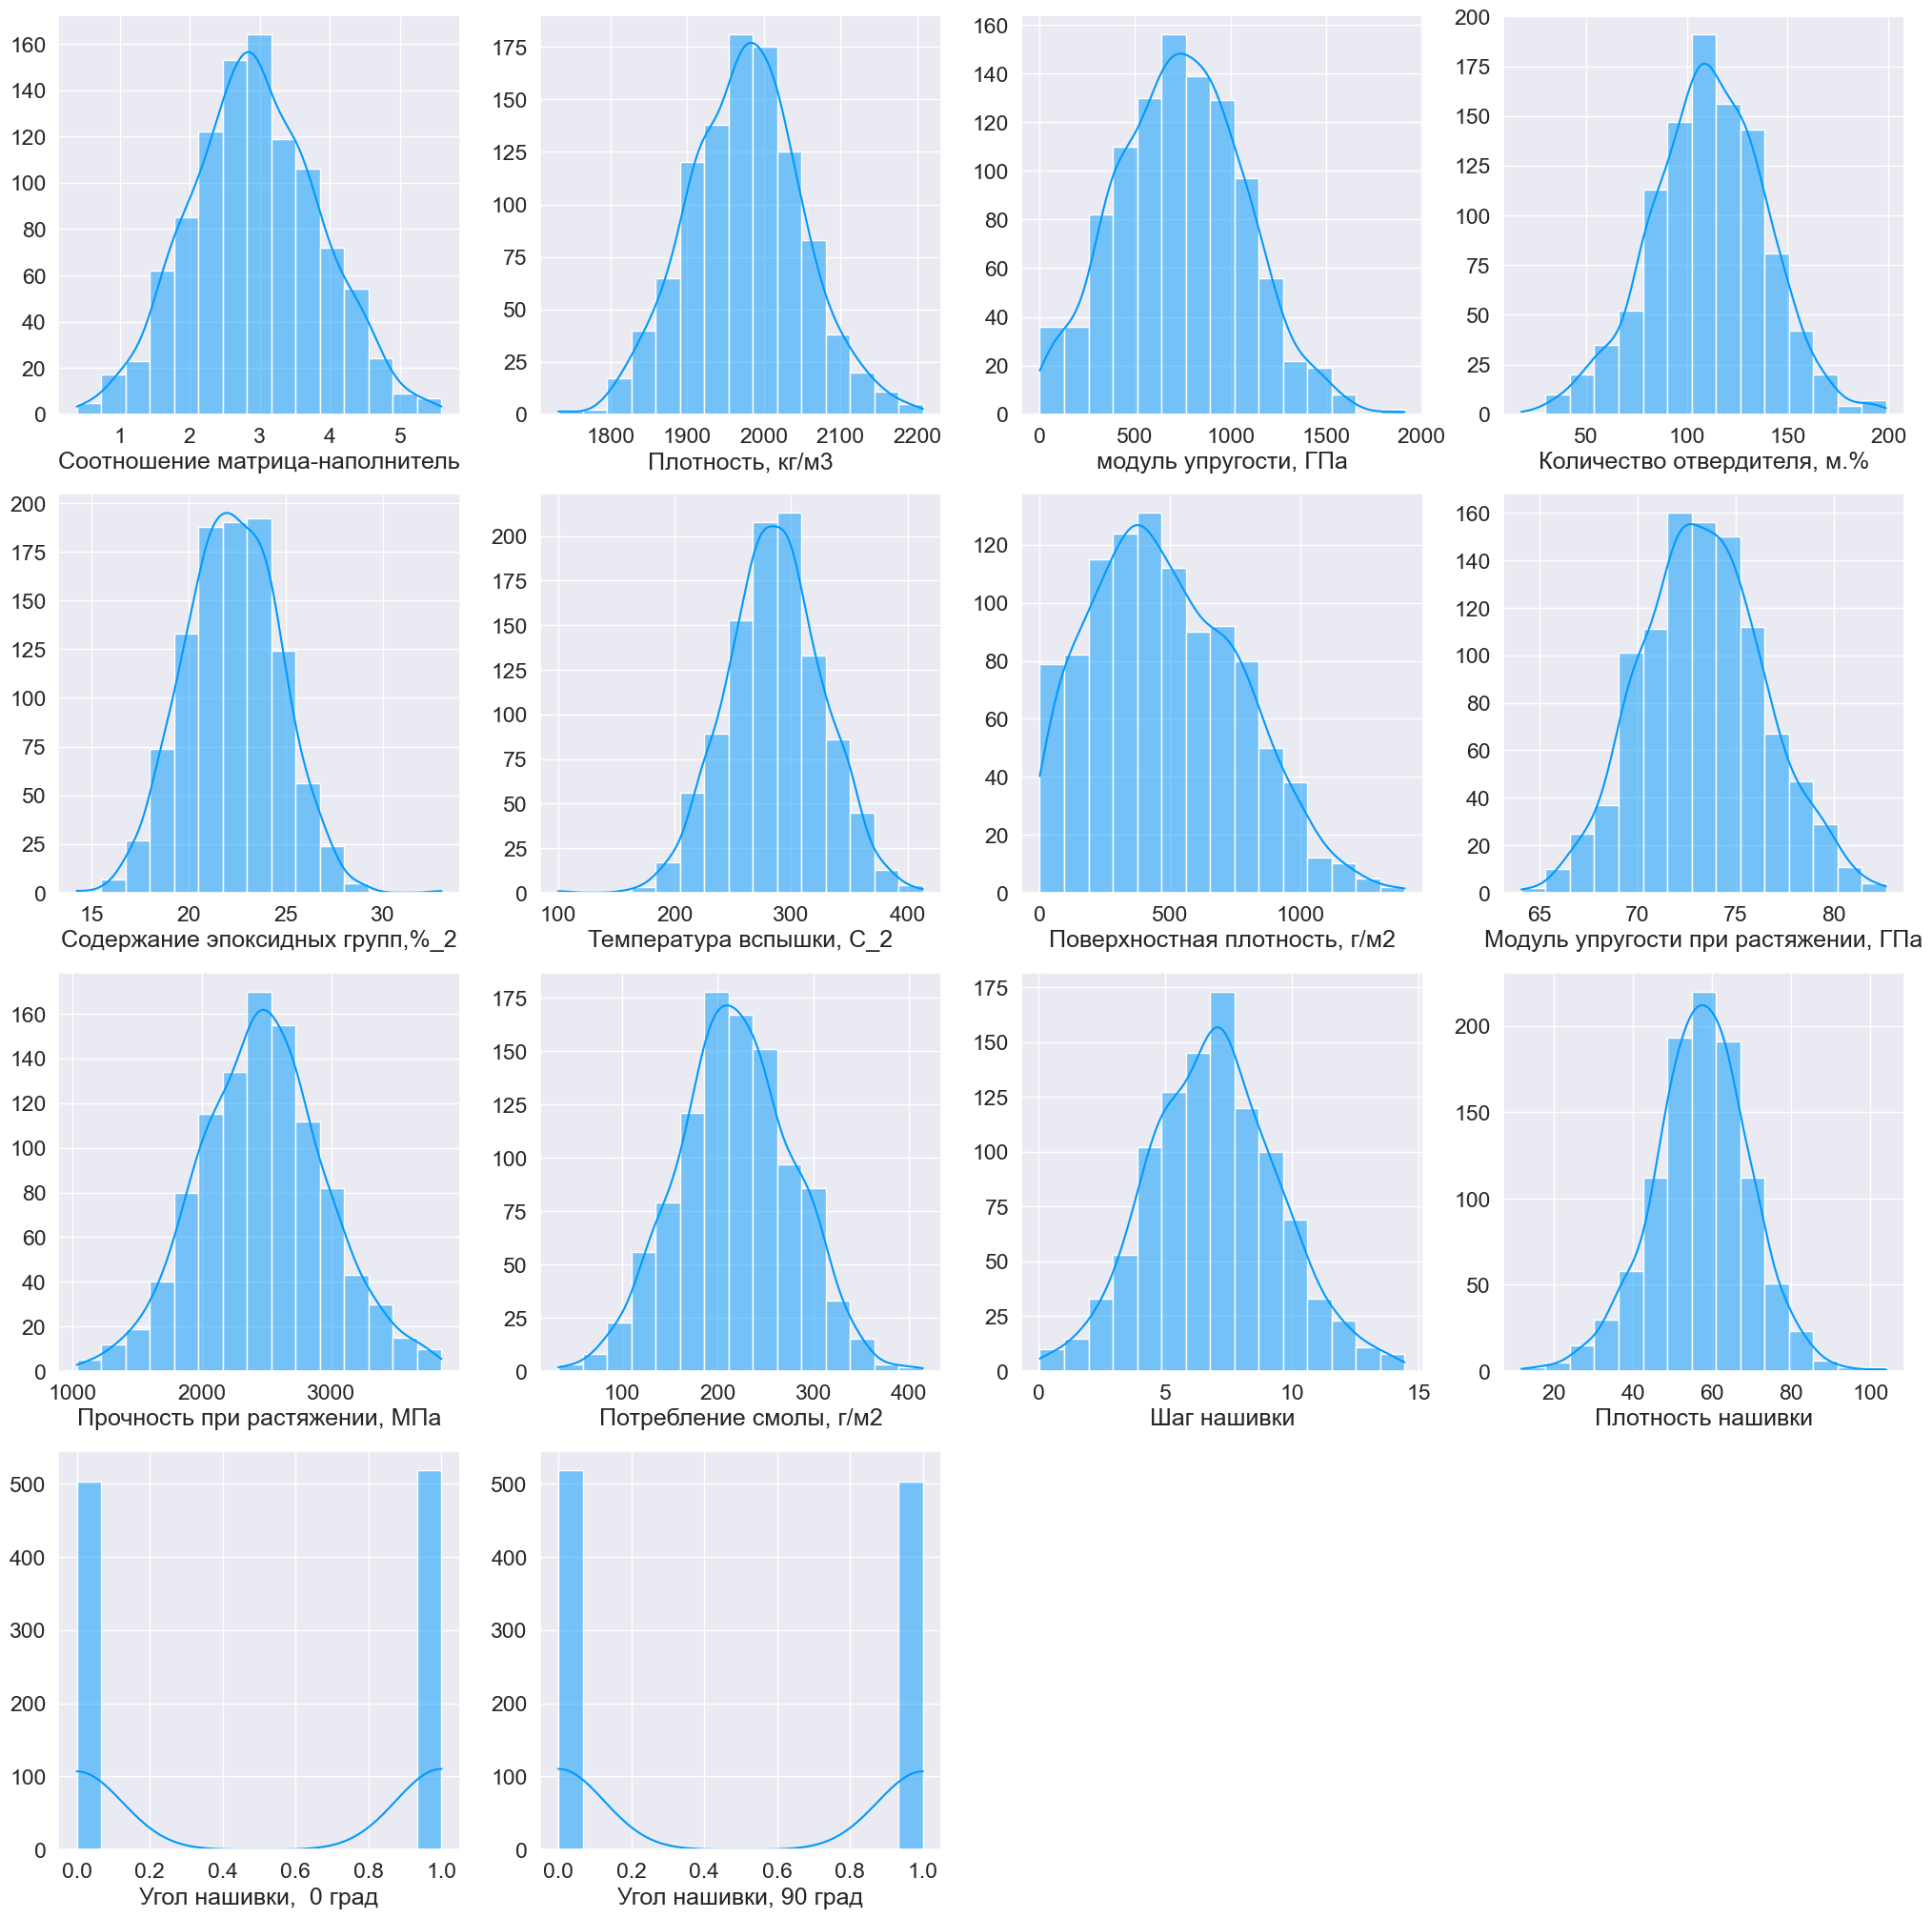

In [51]:
# Гистограммы распределения признаков с графиком распределения
i = 1
plt.figure(figsize = (25,25))
for df_col_num in df.columns:
    plt.subplot(4, 4, i)
    sns.histplot(data = df[df_col_num], kde=True, color = "#0099FF", bins = 15)
    plt.ylabel(None)
    i += 1
plt.savefig('Images\hist2.png')

In [52]:
# Из графиков видно, что скорее всего имеютя выбросы как минимум по следующим признакм:
# - плотность;
# - содержание эпоксидных групп;
# - температура вспышки;
# - плотность нашивки

# Диаграммы "ящика с усами"

In [53]:
# Ящик с усами (диаграмма размаха, усиковая диаграмма, коробчатая диаграмма).
# Такой вид диаграммы в удобной форме показывает медиану (или, если нужно, среднее), нижний и верхний квартили,
# минимальное и максимальное значение выборки и выбросы

In [54]:
import math

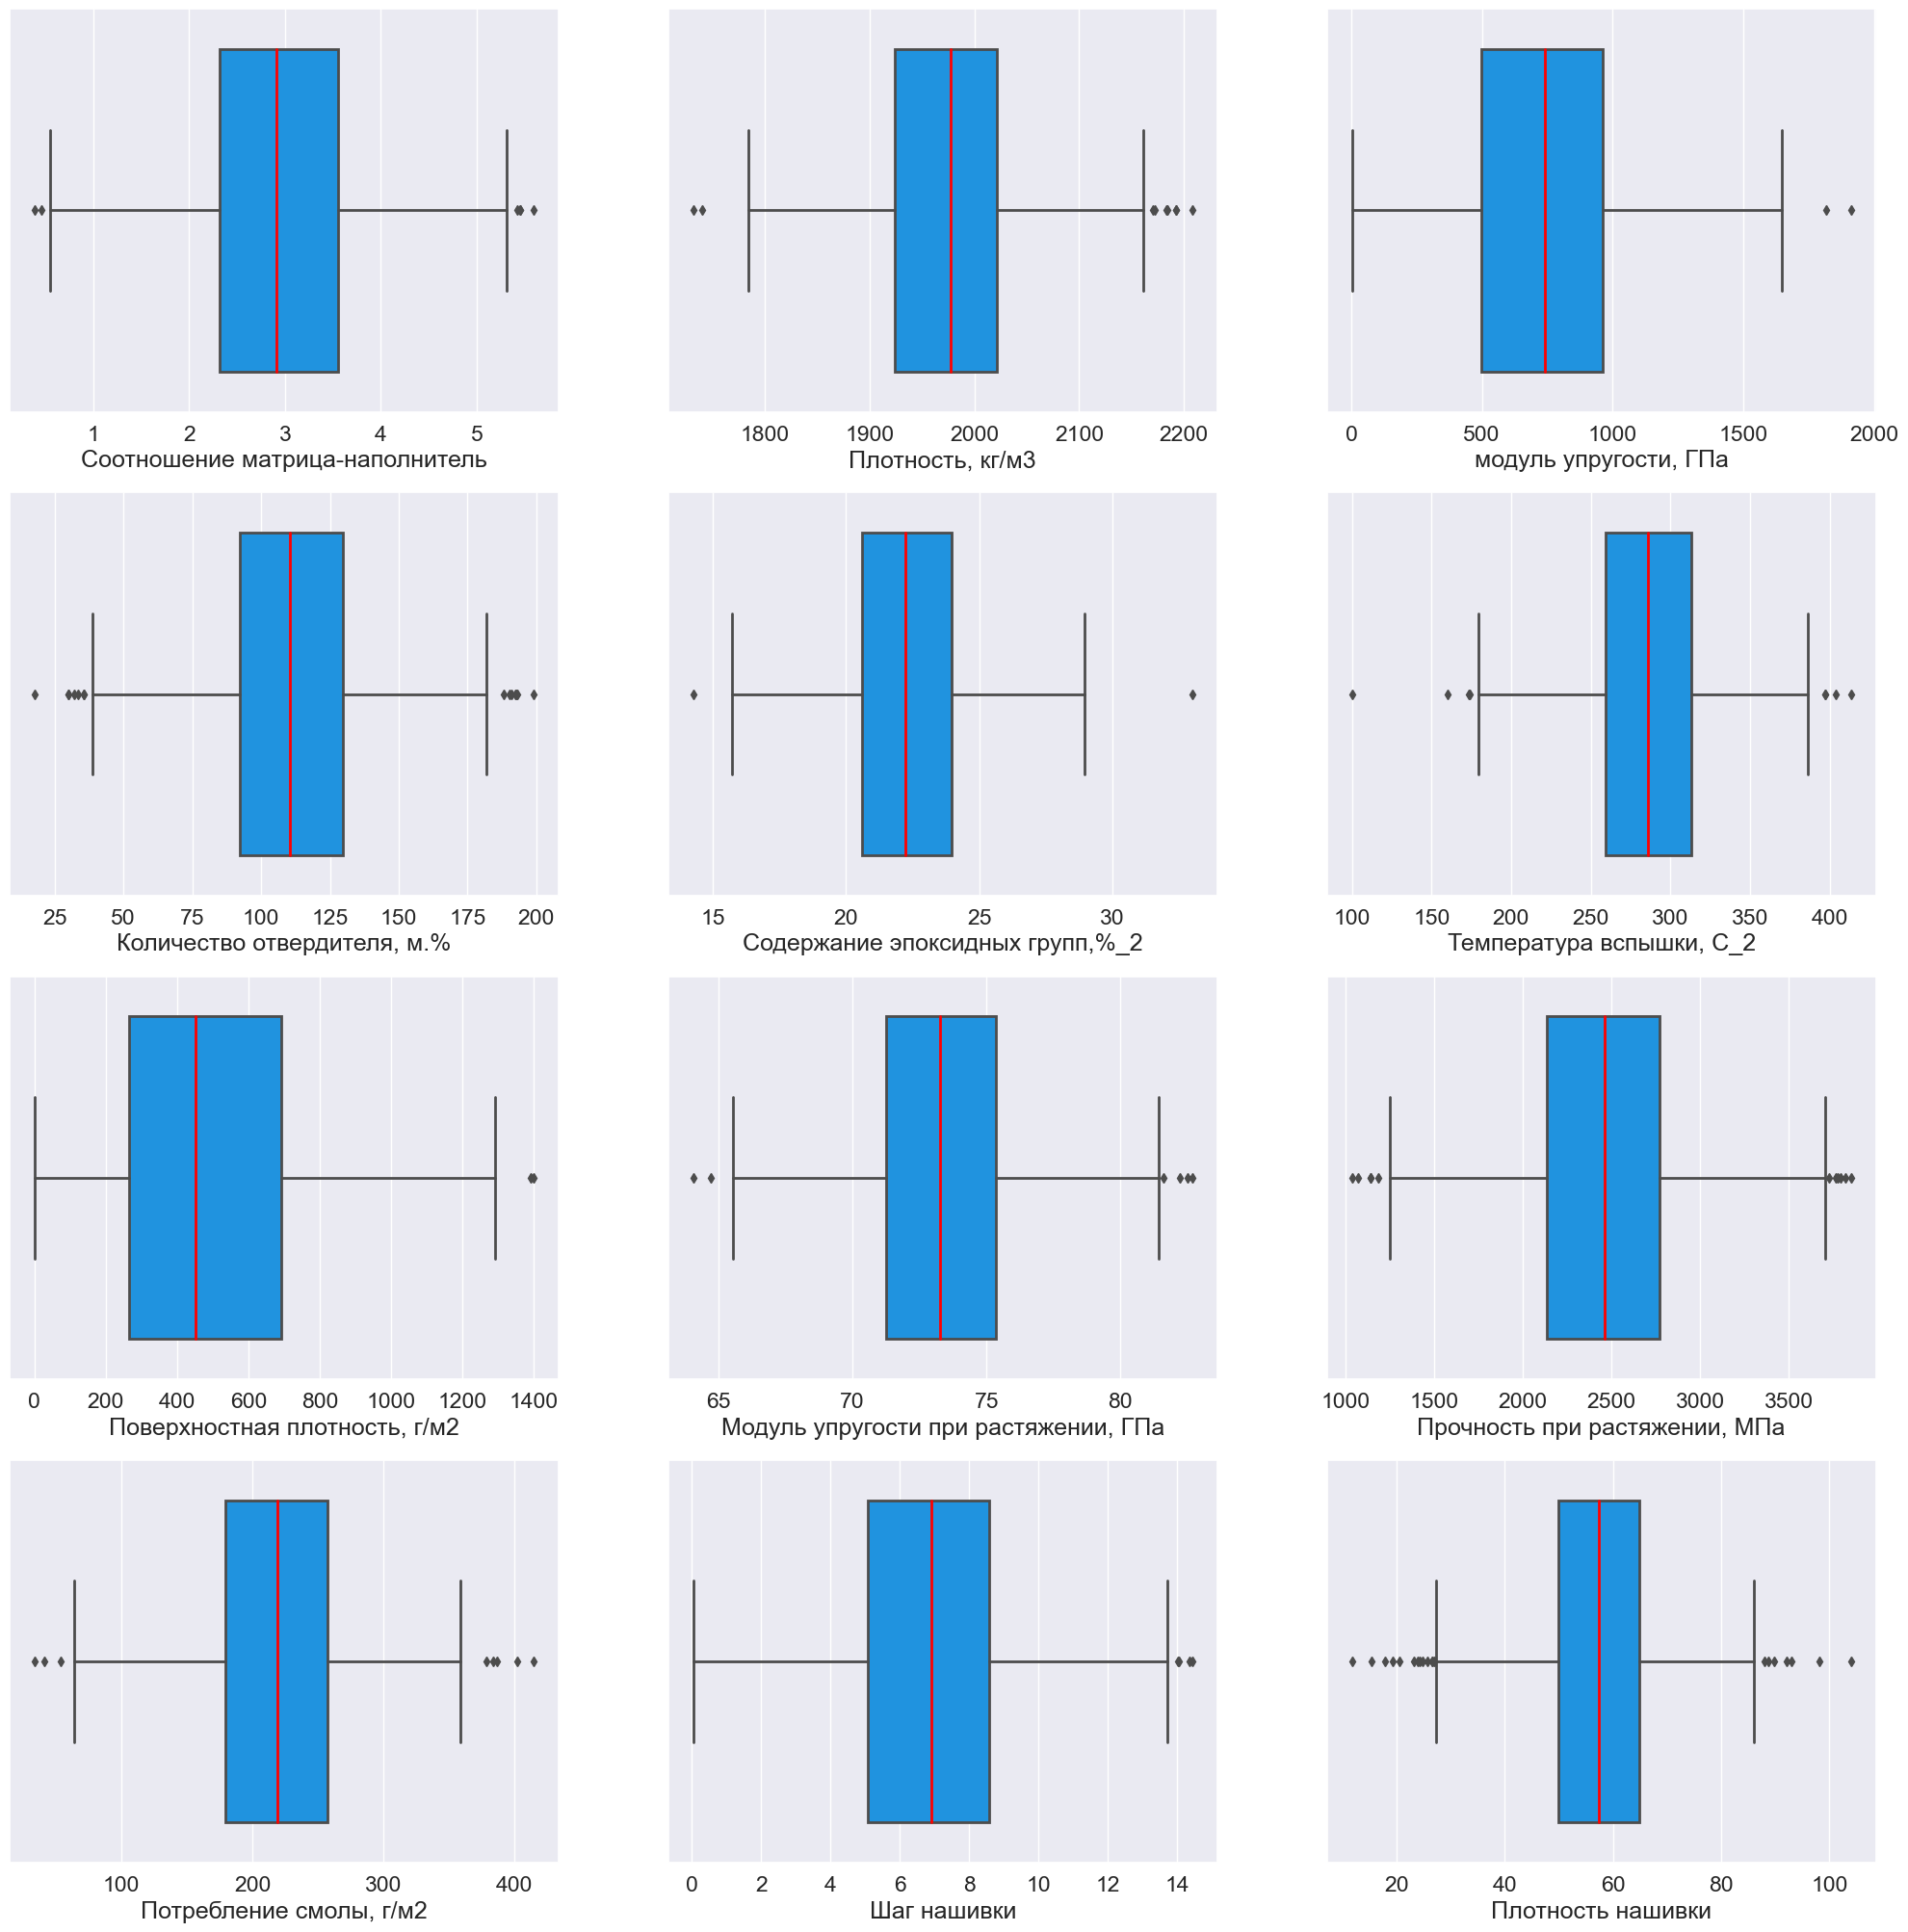

In [55]:
i = 1 # номер столбца (при отсчете от единицы, а не нуля)
Num_col = df.columns.shape[0] - 2 # количество столбцов без последних двух (без углов нашивки)
plt.figure(figsize = (25,25))
for df_col_num in df.columns:
    plt.subplot(math.ceil(Num_col / 3), 3, i)
    sns.boxplot(x = df[df_col_num], color = "#0099FF", meanline = True, medianprops = dict(color = 'red'), linewidth = 2)
    plt.ylabel(None)
    i += 1
    if i > Num_col:
        break
plt.savefig('Images\Boxplot1.png')

In [56]:
# Вывод: по всем признакам (переменным) есть выбросы, в дальнейшем,
# собственно как и дано в задании, проведем исключение выбросов 

# Попарные графики рассеяния

In [57]:
# Диаграммы рассеяния используются для демонстрации наличия или отсутствия зависимости между двумя переменными.

<Figure size 5000x5000 with 0 Axes>

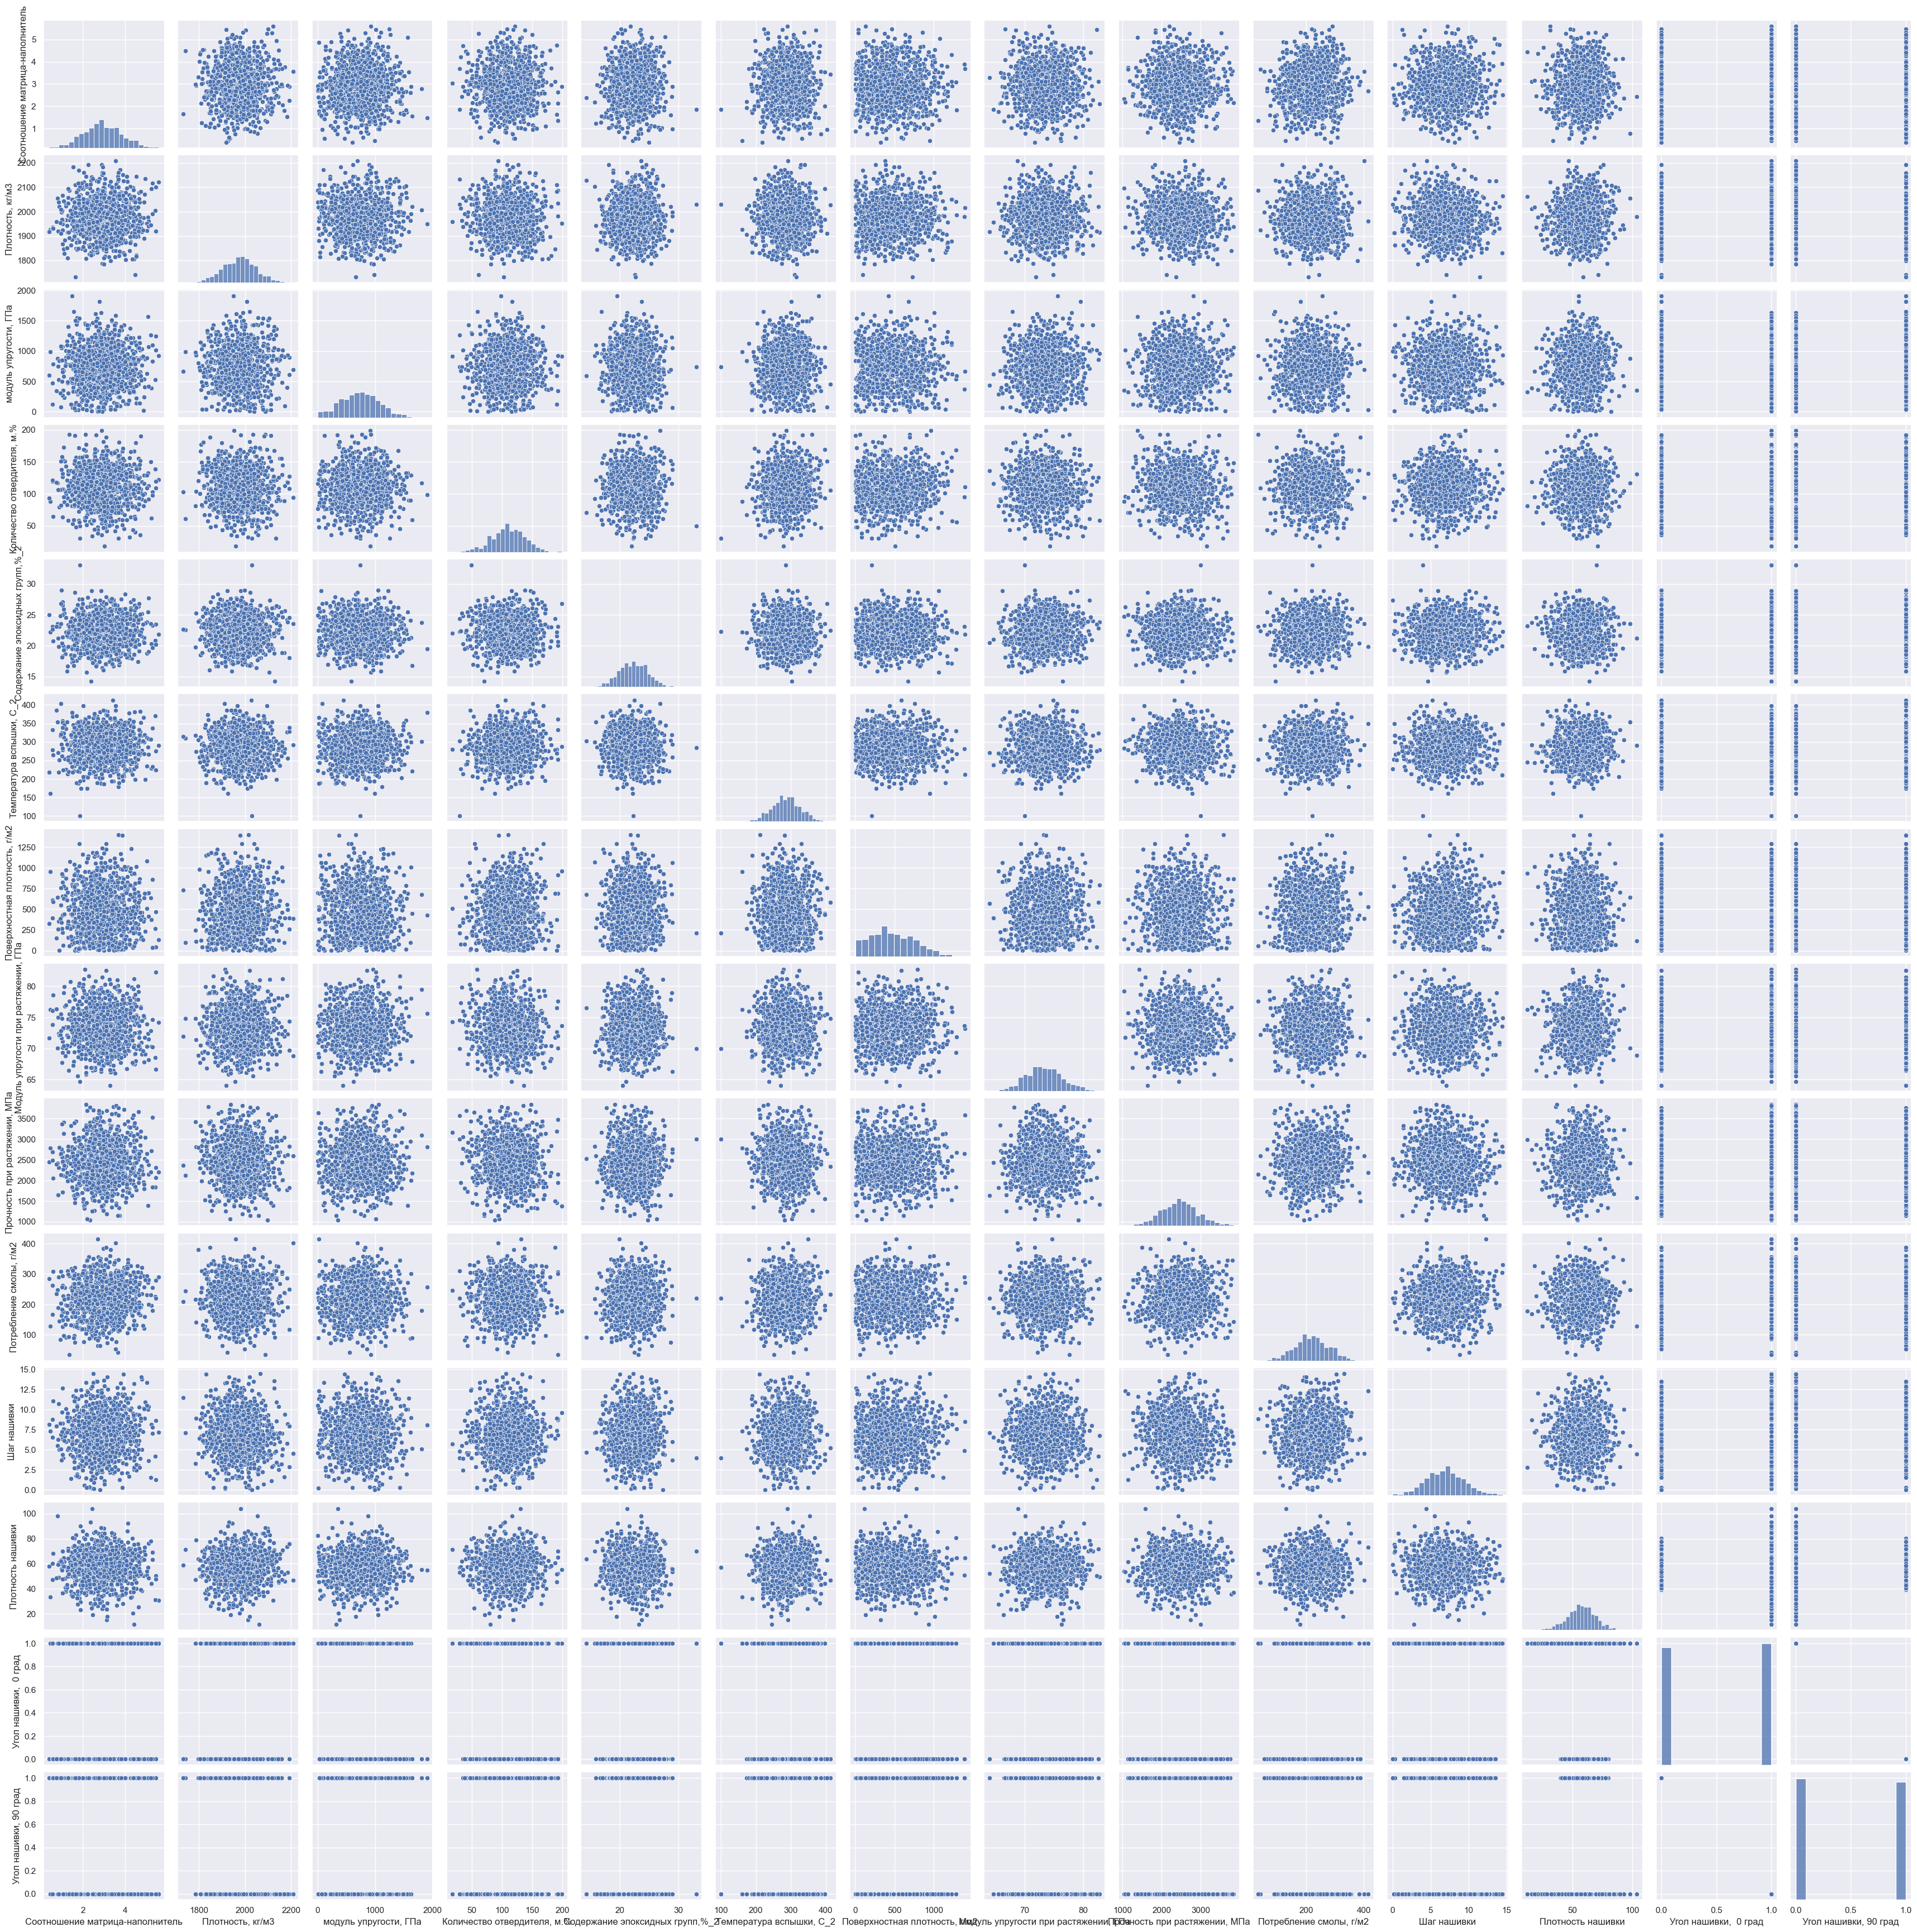

In [58]:
plt.figure(figsize=(50, 50))
sns.set_style('darkgrid')
sns.set(font_scale=1.0)
sns.pairplot(df)
plt.savefig('Images\pairplot1.png')

In [59]:
# из парных графиков рассеяния явных зависимостей не видно 

In [60]:
# Отрисуем тепловую карту (графическое представление значений в сетке цветовой кодировкой).
# Нанесённые значения — это коэффициенты корреляции пар. 
# В отличие от диаграмм рассеяния, которые показывают интуитивно понятные тенденции,
# тепловая карта отображает значения с помощью цвета.

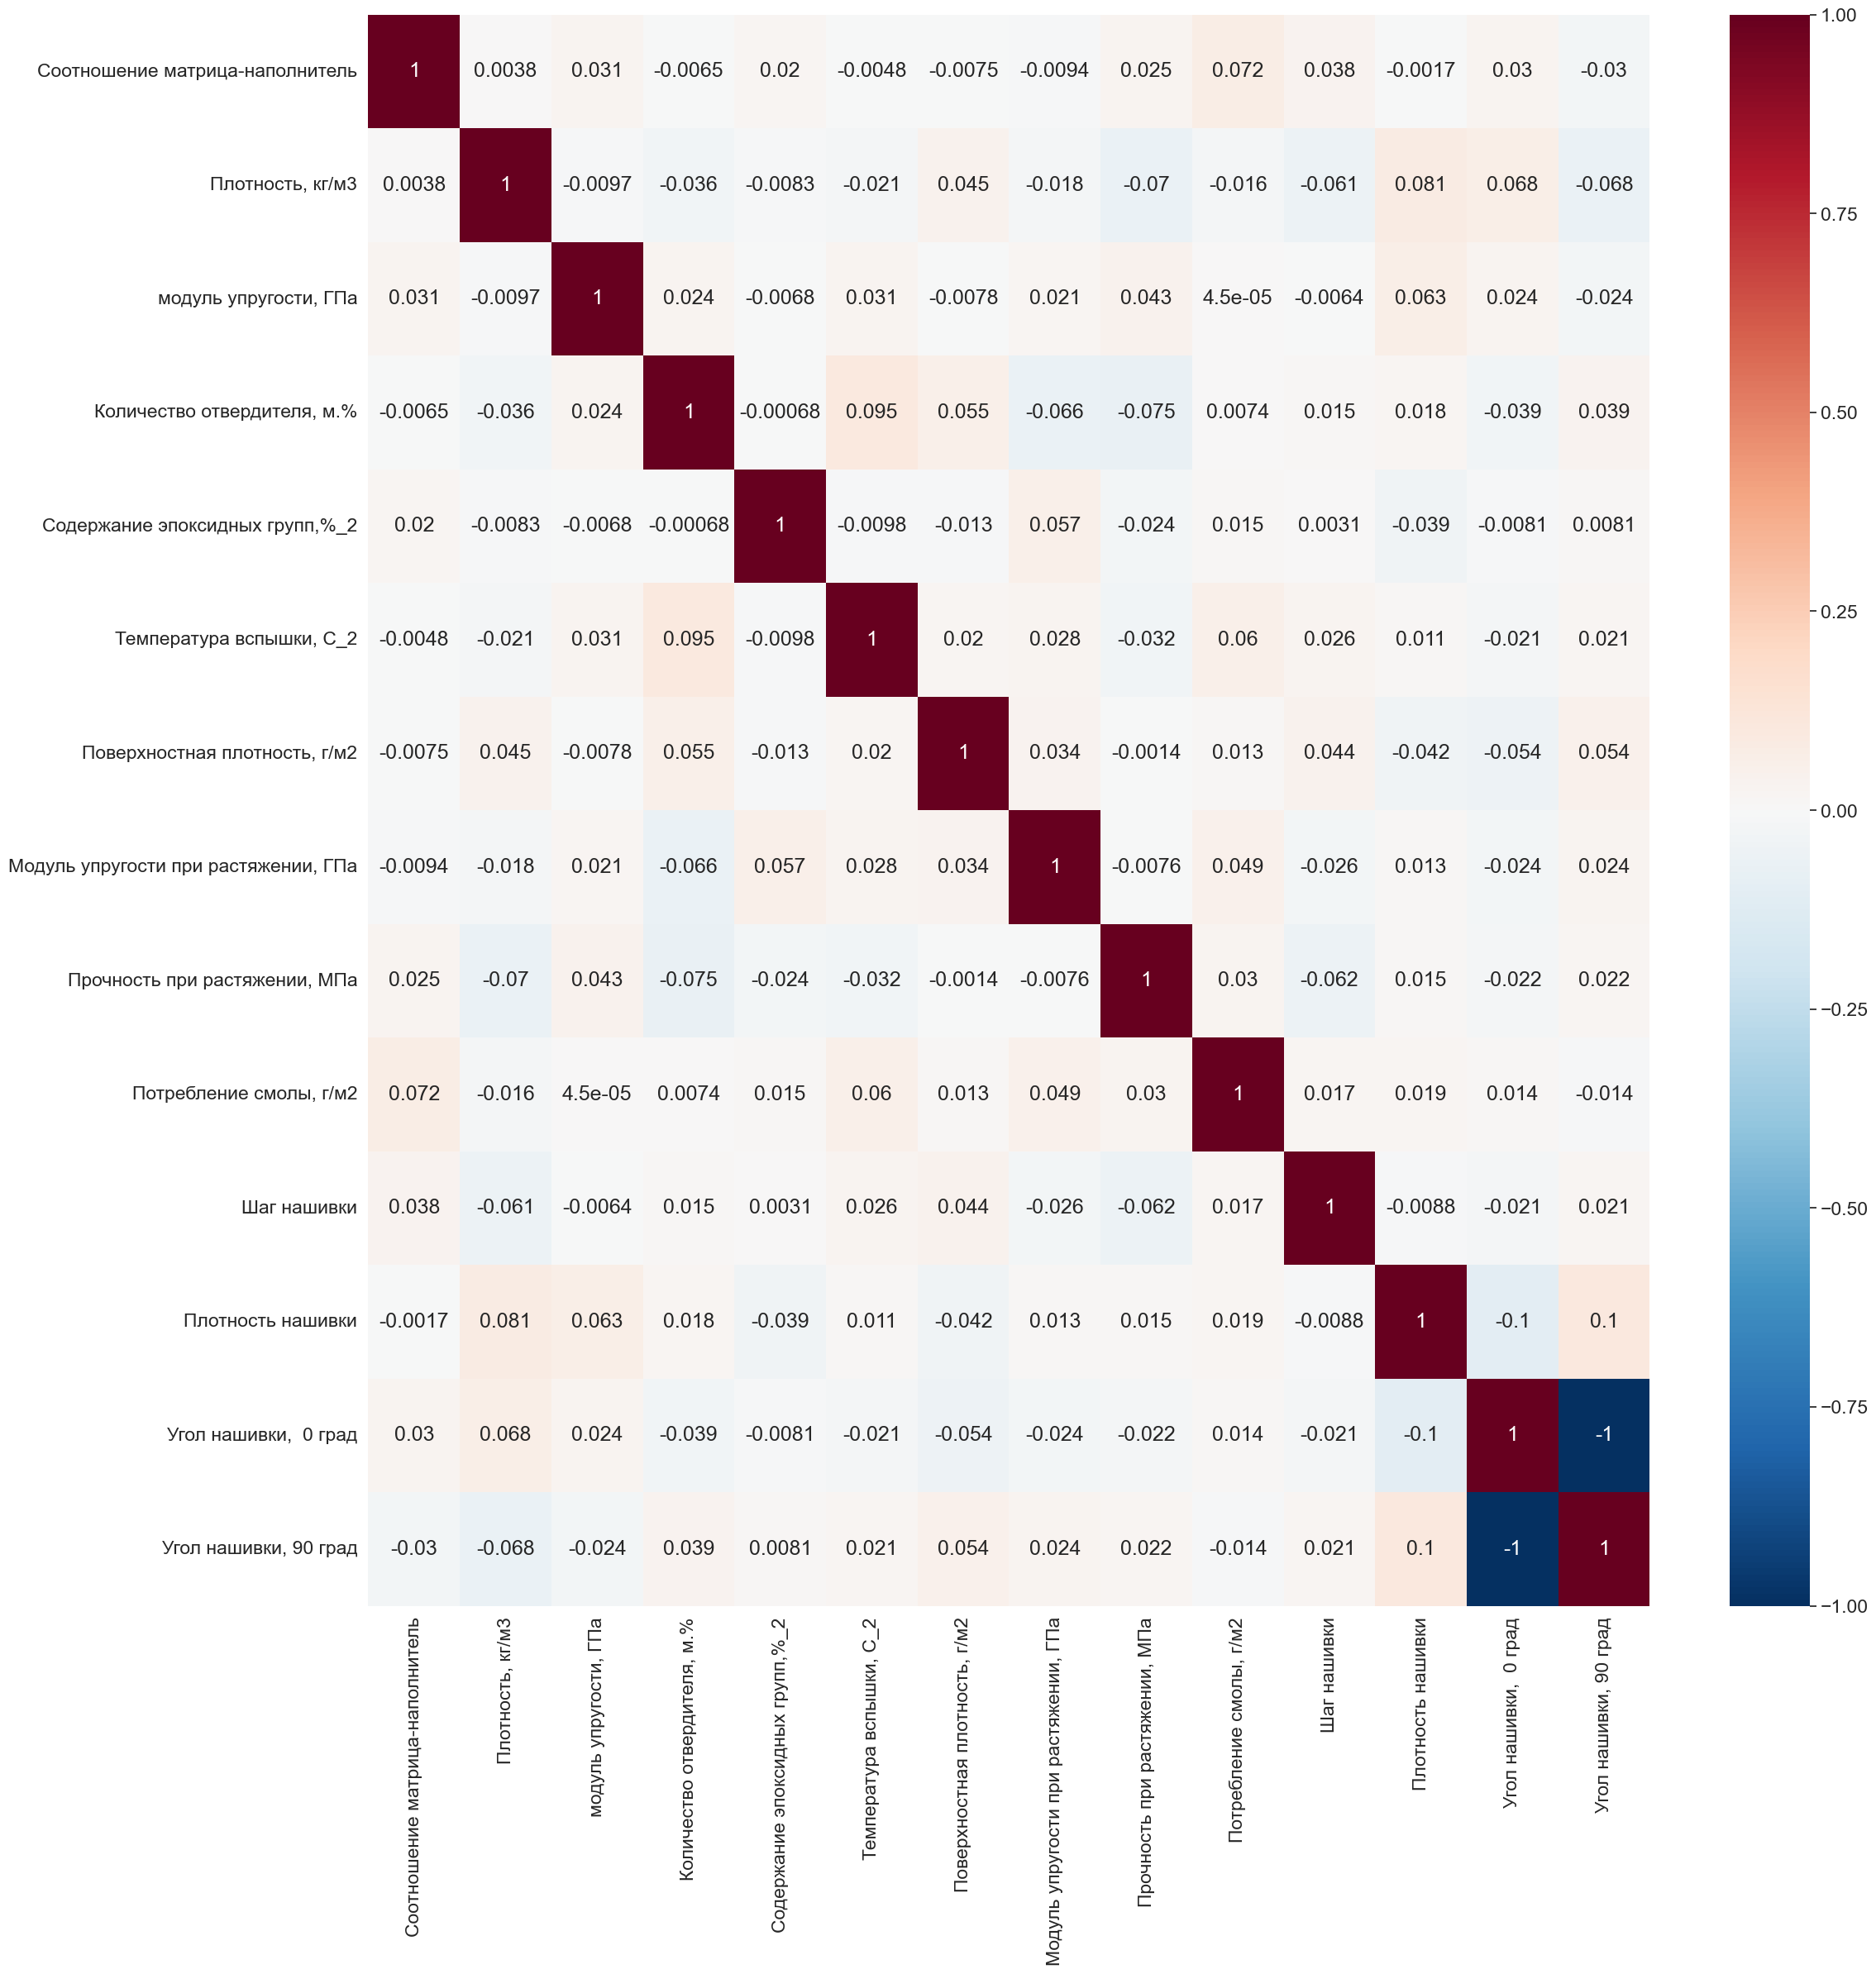

In [61]:
plt.figure(figsize=(25,25))
sns.set(font_scale=1.5)
sns.heatmap(
    df.corr(),        
    cmap='RdBu_r', # задаёт цветовую схему
    annot=True, # рисует значения внутри ячеек
    vmin=-1, vmax=1); # указывает начало цветовых кодов от -1 до 1.
plt.savefig('Images\heatmap1.png')

In [62]:
# Вывод по диаграммам рассеивания и тепловой карте: 
# - выраженные зависимости отсутствуют

# Исключение выбросов

###  Исключение выбросов - Z-оценка (также называется стандартной оценкой)
Это значение (оценка) помогает понять, насколько далека точка данных от среднего значения.
И после настройки порогового значения можно использовать значения z-баллов точек данных для определения выбросов.
Z-score = (data_point - среднее значение) / std.отклонение
Для определения порогового значения выбросов выбирается значение, которое обычно равно 3,0. Поскольку 99,7% точек данных лежат между стандартным отклонением +/-3 (с использованием метода распределения по Гауссу).

In [63]:
from scipy import stats

In [64]:
# функция для определения выбросов через z-оценку
def detect_outliers_zscore(data):
    outliers_value = []
    mean = np.mean(data) 
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > 3):
            outliers_value.append(i)
    return outliers_value

### Исключение выбросов - IQR (межквартильный диапазон)
Подход к поиску выбросов в интервале между квартилями является наиболее часто используемым и наиболее надежным подходом, используемым в области исследований.
IQR = Quartile3 – Quartile1

Для определения базового значения выбросов определяется выше и ниже нормального диапазона наборов данных,
а именно верхней и нижней границ, определяем верхнюю и нижнюю границы (учитывается значение 1,5 * IQR):
верхний = Q3 + 1,5 * IQR
нижний  = Q1 – 1,5 * IQR

In [65]:
# функция для определения выбросов методом IQR
def detect_outliers_IQR(data):
    outliers_value = []
    Q1 = np.percentile(data, 25, method = 'midpoint')
    Q3 = np.percentile(data, 75, method = 'midpoint')
    IQR = Q3 - Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    for i in data:
        if  i <= lower or i >= upper:
            outliers_value.append(i)
    return outliers_value

### Определим значения выбросов двумя методами:  Z-оценка и IQR (межквартильный диапазон)

In [66]:
print("Значения выбросов определенных методом Z-scores: ")
for df_col_name in df.columns:
    Outliers_value = detect_outliers_zscore(df[df_col_name])
    print(f"{df_col_name:>40}", " - ", Outliers_value)

Значения выбросов определенных методом Z-scores: 
         Соотношение матрица-наполнитель  -  []
                        Плотность, кг/м3  -  [2207.77348061119, 1740.65749569112, 1731.764635096]
                   модуль упругости, ГПа  -  [1911.53647700054, 1815.86516990736]
             Количество отвердителя, м.%  -  [17.7402745562519, 198.953207190451]
         Содержание эпоксидных групп,%_2  -  [33.0, 14.2549854977161]
                Температура вспышки, С_2  -  [100.0, 160.255842892284, 413.273418243566]
           Поверхностная плотность, г/м2  -  [1399.54236233989, 1391.03240865282]
    Модуль упругости при растяжении, ГПа  -  [82.682051035271]
           Прочность при растяжении, МПа  -  []
                 Потребление смолы, г/м2  -  [402.163809219598, 414.590628361534, 33.8030255329625]
                             Шаг нашивки  -  []
                       Плотность нашивки  -  [19.2505331367488, 98.2026027528147, 11.7401256604075, 15.4160755126792, 17.9344081943835, 103.

In [67]:
print("Значения выбросов определенных методом IQR: ")
for df_col_name in df.columns:
    Outliers_value = detect_outliers_IQR(df[df_col_name])
    print(f"{df_col_name:>40}", " - ", Outliers_value)

Значения выбросов определенных методом IQR: 
         Соотношение матрица-наполнитель  -  [5.59174159869754, 5.42513947440363, 0.463342035924085, 5.45295943131032, 0.389402605178414, 5.45556617827335]
                        Плотность, кг/м3  -  [2207.77348061119, 2182.75182183283, 2172.24679646503, 2192.29763744164, 2184.49319952038, 2170.34236302043, 2192.73878348, 1740.65749569112, 1731.764635096]
                   модуль упругости, ГПа  -  [1911.53647700054, 1649.41570587587, 1815.86516990736]
             Количество отвердителя, м.%  -  [30.0, 191.053003718703, 35.6209043592388, 17.7402745562519, 198.953207190451, 33.6241865036291, 192.85170183308, 192.705385447053, 32.0192215581845, 29.9561496534826, 188.049897892565, 35.599697406249, 190.318107209251, 192.334469461448]
         Содержание эпоксидных групп,%_2  -  [33.0, 14.2549854977161]
                Температура вспышки, С_2  -  [100.0, 396.898222222153, 173.484919924459, 160.255842892284, 397.151290856661, 173.973907031866,

In [68]:
# видно что методом IQR определяется больше выбросов, что соотвествует построеннным ранее ящиком с усами

In [69]:
# удалим выбросы методом IQR 
for df_col_name in df.columns:
    Outliers_value = detect_outliers_IQR(df[df_col_name])
    df = df[df[df_col_name].isin (Outliers_value) == False ]

In [70]:
# посмотрим размер датасета после удаления выбросов
df.shape

(932, 14)

In [71]:
# проверим еще раз наличие выбросов
print("Значения выбросов определенных методом IQR: ")
for df_col_name in df.columns:
    Outliers_value = detect_outliers_IQR(df[df_col_name])
    print(f"{df_col_name:>40}", " - ", Outliers_value)

Значения выбросов определенных методом IQR: 
         Соотношение матрица-наполнитель  -  []
                        Плотность, кг/м3  -  []
                   модуль упругости, ГПа  -  []
             Количество отвердителя, м.%  -  []
         Содержание эпоксидных групп,%_2  -  []
                Температура вспышки, С_2  -  []
           Поверхностная плотность, г/м2  -  []
    Модуль упругости при растяжении, ГПа  -  []
           Прочность при растяжении, МПа  -  [3689.22368059651]
                 Потребление смолы, г/м2  -  []
                             Шаг нашивки  -  []
                       Плотность нашивки  -  [28.2377463953996, 27.891888320878]
                   Угол нашивки,  0 град  -  []
                   Угол нашивки, 90 град  -  []


In [72]:
# выбросы остались, удалим выбросы методом IQR еще раз
for df_col_name in df.columns:
    Outliers_value = detect_outliers_IQR(df[df_col_name])
    df = df[df[df_col_name].isin (Outliers_value) == False ]

In [73]:
# проверим еще раз наличие выбросов
print("Значения выбросов определенных методом IQR: ")
for df_col_name in df.columns:
    Outliers_value = detect_outliers_IQR(df[df_col_name])
    print(f"{df_col_name:>40}", " - ", Outliers_value)

Значения выбросов определенных методом IQR: 
         Соотношение матрица-наполнитель  -  []
                        Плотность, кг/м3  -  []
                   модуль упругости, ГПа  -  [1649.41570587587]
             Количество отвердителя, м.%  -  []
         Содержание эпоксидных групп,%_2  -  []
                Температура вспышки, С_2  -  []
           Поверхностная плотность, г/м2  -  []
    Модуль упругости при растяжении, ГПа  -  []
           Прочность при растяжении, МПа  -  [3660.45020981796, 3656.15836310544]
                 Потребление смолы, г/м2  -  []
                             Шаг нашивки  -  []
                       Плотность нашивки  -  []
                   Угол нашивки,  0 град  -  []
                   Угол нашивки, 90 град  -  []


In [74]:
# удалим выбросы методом IQR еще раз
for df_col_name in df.columns:
    Outliers_value = detect_outliers_IQR(df[df_col_name])
    df = df[df[df_col_name].isin (Outliers_value) == False ]

In [75]:
# проверим еще раз наличие выбросов
print("Значения выбросов определенных методом IQR: ")
for df_col_name in df.columns:
    Outliers_value = detect_outliers_IQR(df[df_col_name])
    print(f"{df_col_name:>40}", " - ", Outliers_value)

Значения выбросов определенных методом IQR: 
         Соотношение матрица-наполнитель  -  []
                        Плотность, кг/м3  -  []
                   модуль упругости, ГПа  -  []
             Количество отвердителя, м.%  -  []
         Содержание эпоксидных групп,%_2  -  []
                Температура вспышки, С_2  -  []
           Поверхностная плотность, г/м2  -  []
    Модуль упругости при растяжении, ГПа  -  []
           Прочность при растяжении, МПа  -  []
                 Потребление смолы, г/м2  -  []
                             Шаг нашивки  -  []
                       Плотность нашивки  -  []
                   Угол нашивки,  0 град  -  []
                   Угол нашивки, 90 град  -  []


In [76]:
# Посчитаем количество уникальных данных в каждом столбце, после удаления выбросов
df.nunique()

Соотношение матрица-наполнитель         915
Плотность, кг/м3                        914
модуль упругости, ГПа                   920
Количество отвердителя, м.%             904
Содержание эпоксидных групп,%_2         904
Температура вспышки, С_2                903
Поверхностная плотность, г/м2           905
Модуль упругости при растяжении, ГПа    905
Прочность при растяжении, МПа           905
Потребление смолы, г/м2                 904
Шаг нашивки                             890
Плотность нашивки                       889
Угол нашивки,  0 град                     2
Угол нашивки, 90 град                     2
dtype: int64

### ящик с усами для переменных после применения IQR

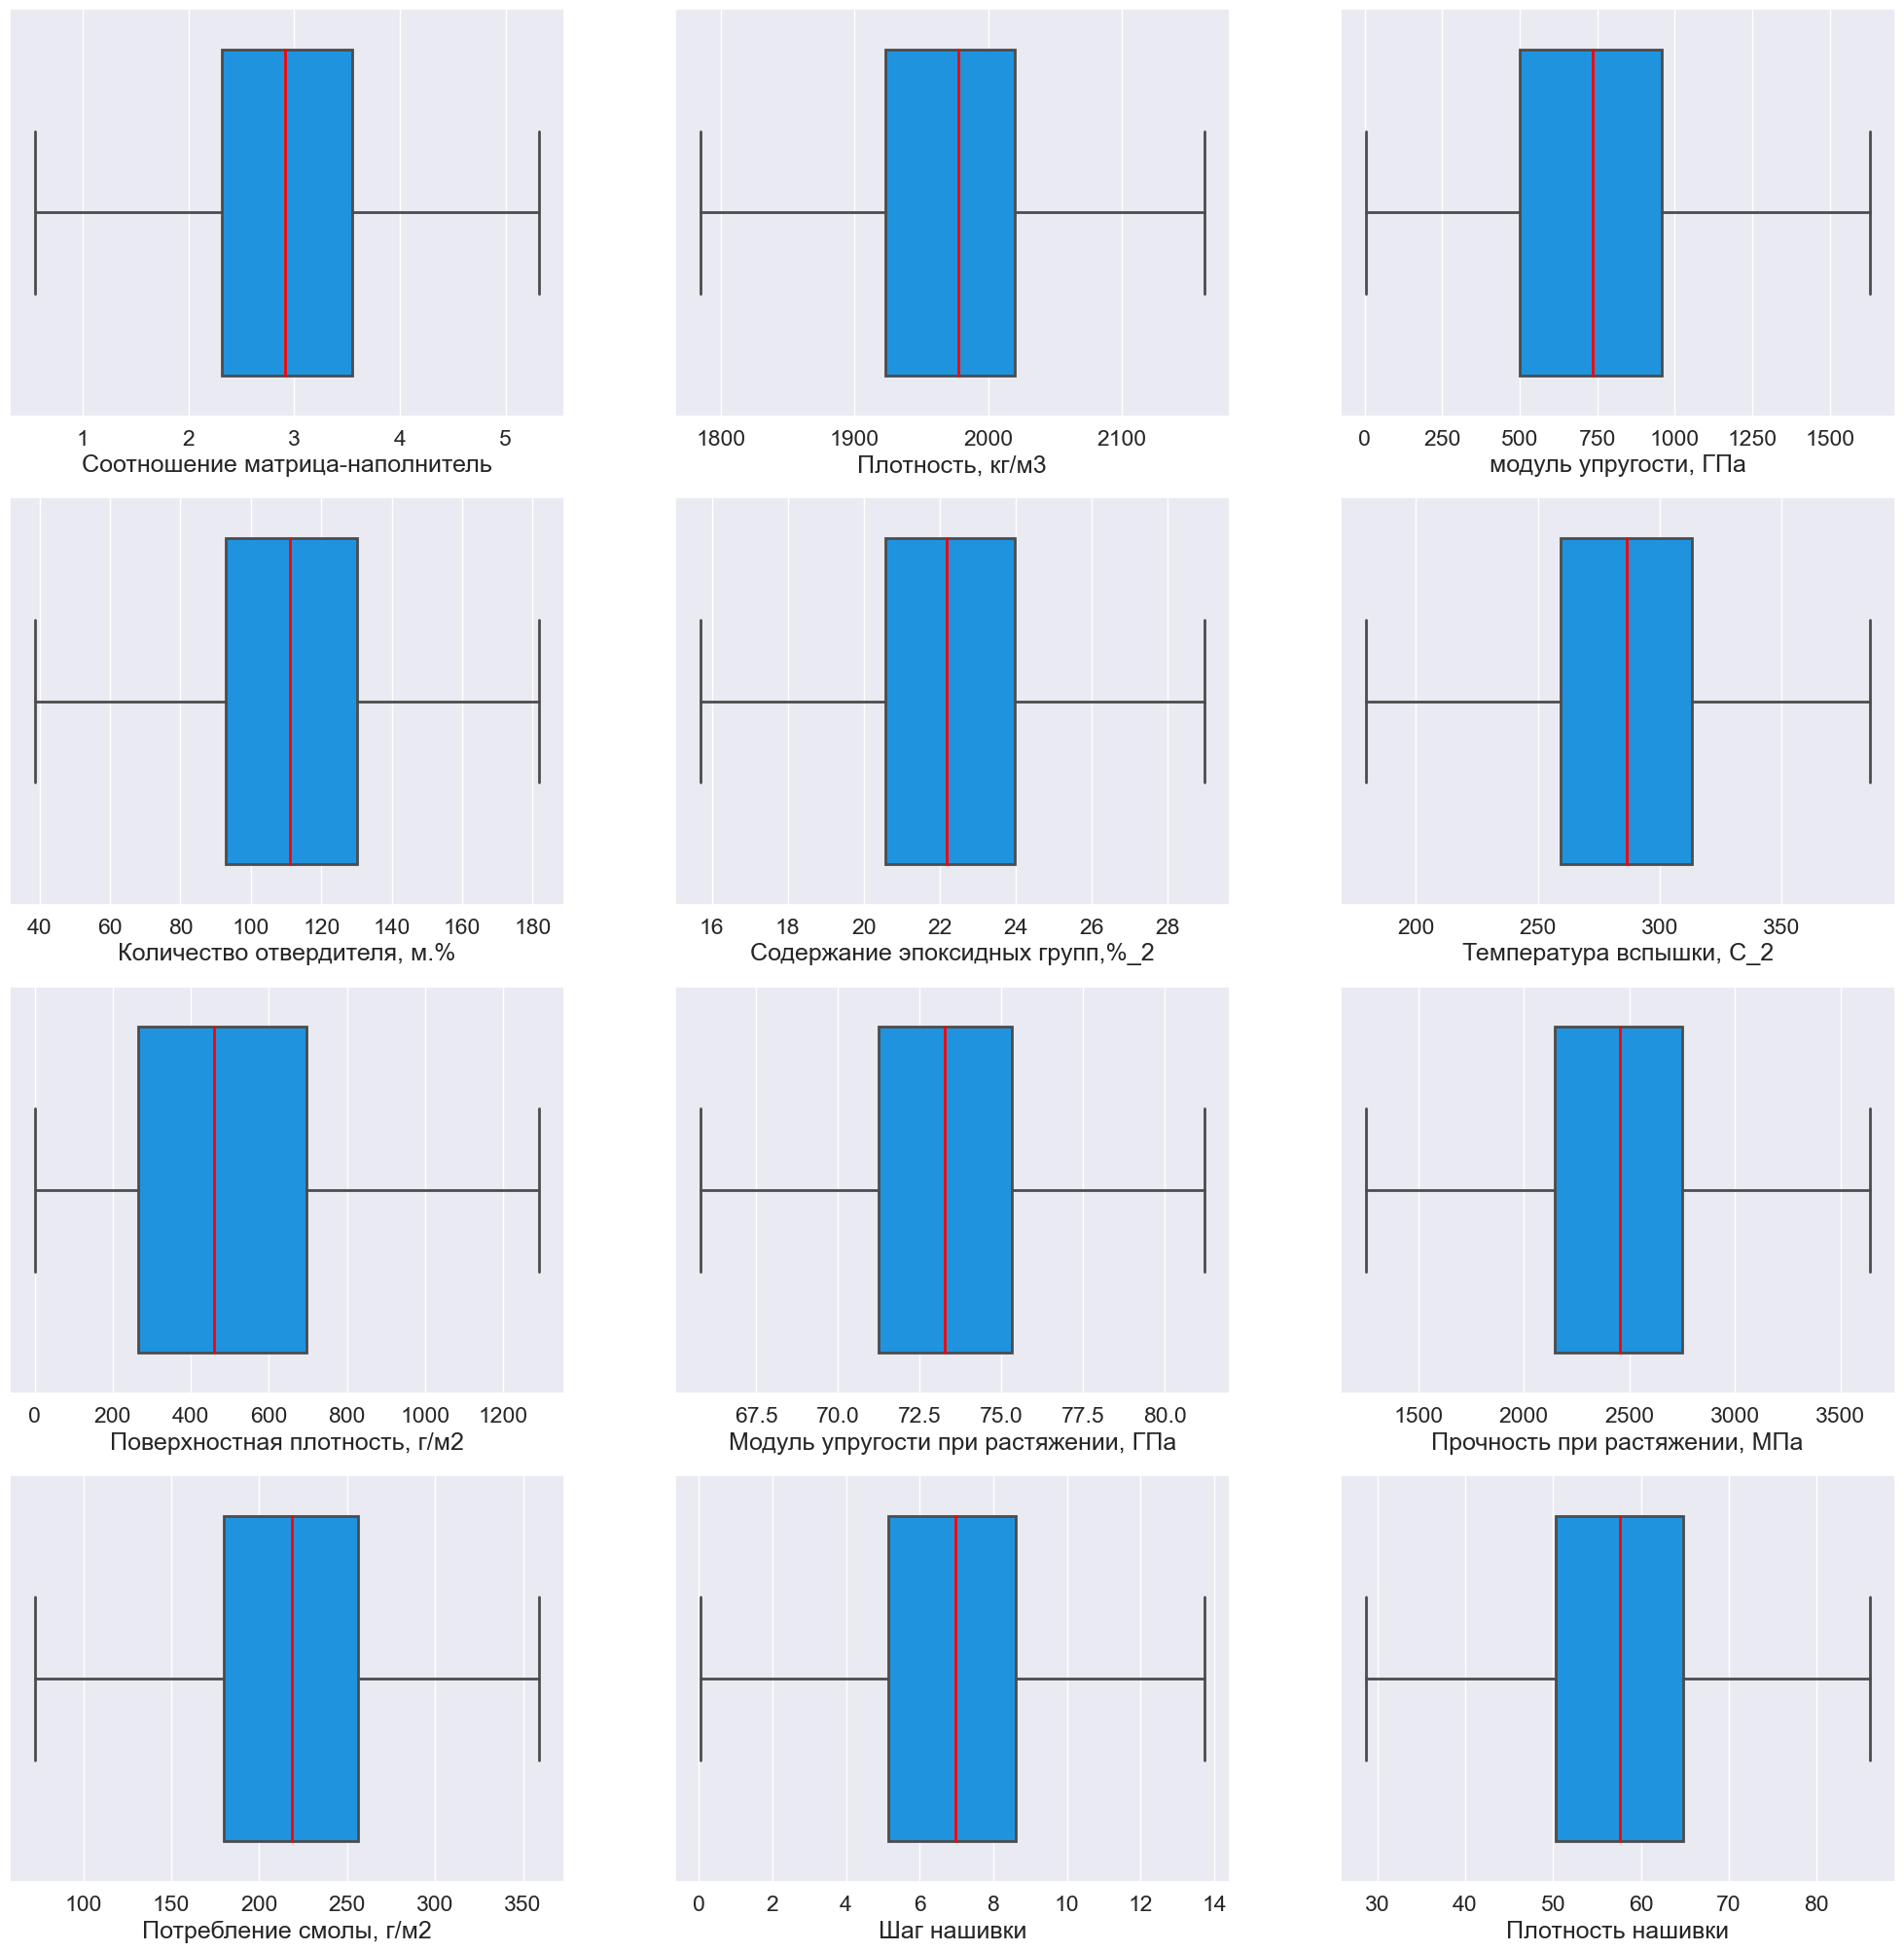

In [77]:
# после удаления выбросов посмотрим ящики с усами для каждой переменной (без углов нашивки)
i = 1 # номер столбца (при отсчете от единицы, а не нуля)
Num_col = df.columns.shape[0] - 2 # количество столбцов без последних двух (без углов нашивки)
plt.figure(figsize = (25,25))
for df_col_num in df.columns:
    plt.subplot(math.ceil(Num_col / 3), 3, i)
    sns.boxplot(x = df[df_col_num], color = "#0099FF", meanline = True, medianprops = dict(color = 'red'), linewidth = 2)
    plt.ylabel(None)
    i += 1
    if i > Num_col:
        break
plt.savefig('Images\Boxplot_after_IQR.png')

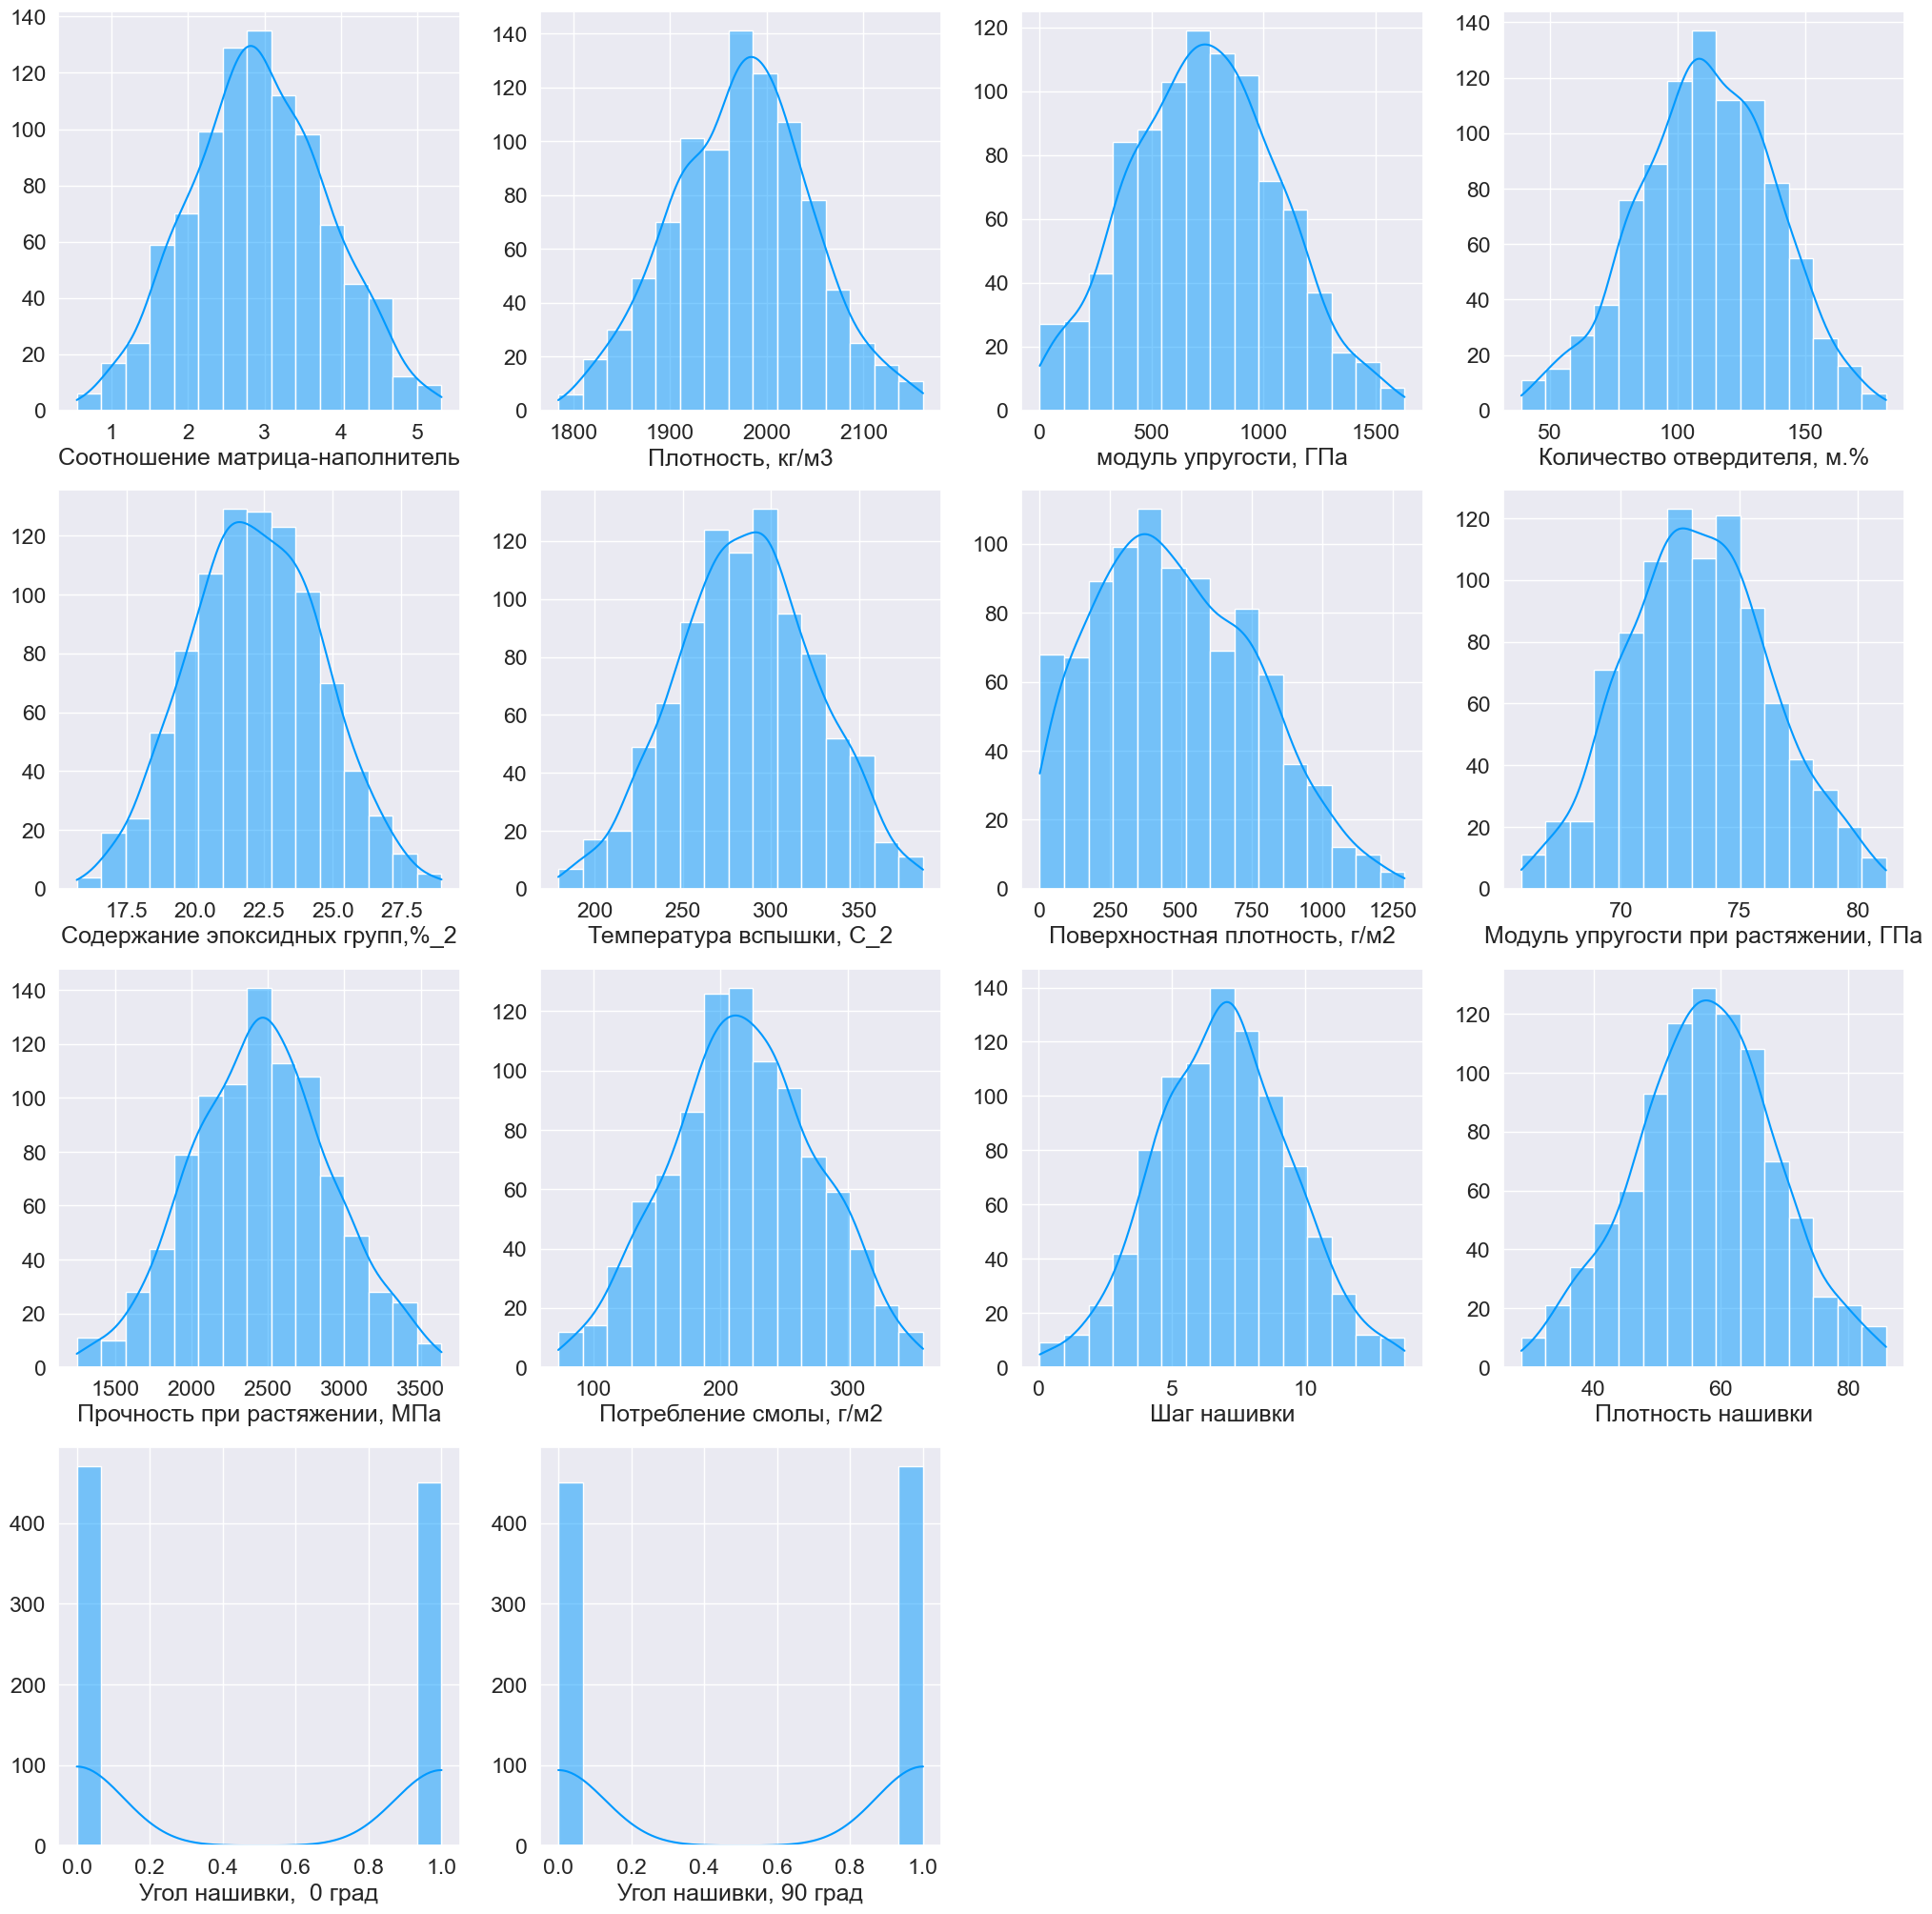

In [78]:
# Гистограммы распределения признаков с графиком распределения после удаления выбросов
i = 1
plt.figure(figsize = (25,25))
for df_col_num in df.columns:
    plt.subplot(4, 4, i)
    sns.histplot(data = df[df_col_num], kde=True, color = "#0099FF", bins = 15)
    plt.ylabel(None)
    i += 1
plt.savefig('Images\hist_after_IQR.png')

In [79]:
df.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       921.0     2.927987    0.895958   
Плотность, кг/м3                      921.0  1974.076438   71.067625   
модуль упругости, ГПа                 921.0   735.845364  327.678809   
Количество отвердителя, м.%           921.0   111.139456   26.767566   
Содержание эпоксидных групп,%_2       921.0    22.200385    2.395220   
Температура вспышки, С_2              921.0   286.210649   39.431984   
Поверхностная плотность, г/м2         921.0   482.917197  280.197532   
Модуль упругости при растяжении, ГПа  921.0    73.305807    3.026672   
Прочность при растяжении, МПа         921.0  2460.196046  452.101798   
Потребление смолы, г/м2               921.0   217.961148   57.107510   
Шаг нашивки                           921.0     6.931668    2.515536   
Плотность нашивки                     921.0    57.570720   11.125702   
Угол нашивки,  0 град                 921.0     0.488599    0.500142   
Угол нашивки, 90 град                 921.0     0.511401    0.500142   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.547391     2.319322     2.908787   
Плотность, кг/м3                      1784.482245  1923.255135  1977.302956   
модуль упругости, ГПа                    2.436909   498.519344   734.763985   
Количество отвердителя, м.%             38.668500    92.834720   111.166301   
Содержание эпоксидных групп,%_2         15.695894    20.555344    22.177332   
Температура вспышки, С_2               179.374391   259.224491   286.302097   
Поверхностная плотность, г/м2            0.603740   264.538975   458.556445   
Модуль упругости при растяжении, ГПа    65.793845    71.252628    73.253725   
Прочность при растяжении, МПа         1250.392802  2147.576085  2455.555556   
Потребление смолы, г/м2                 72.530873   179.858423   218.448971   
Шаг нашивки                              0.037639     5.140035     6.968698   
Плотность нашивки                       28.661632    50.273632    57.603262   
Угол нашивки,  0 град                    0.000000     0.000000     0.000000   
Угол нашивки, 90 град                    0.000000     0.000000     1.000000   

                                              75%          max  
Соотношение матрица-наполнитель          3.550038     5.314144  
Плотность, кг/м3                      2020.108384  2161.565216  
модуль упругости, ГПа                  956.906660  1628.000000  
Количество отвердителя, м.%            130.163998   181.828448  
Содержание эпоксидных групп,%_2         23.957502    28.955094  
Температура вспышки, С_2               313.023467   386.067992  
Поверхностная плотность, г/м2          695.845999  1291.340115  
Модуль упругости при растяжении, ГПа    75.310287    81.203147  
Прочность при растяжении, МПа         2751.228051  3636.892992  
Потребление смолы, г/м2                256.283235   359.052220  
Шаг нашивки                              8.613054    13.732404  
Плотность нашивки                       64.854936    86.012427  
Угол нашивки,  0 град                    1.000000     1.000000  
Угол нашивки, 90 град                    1.000000     1.000000

In [80]:
# сохраним датасет в файл (резервирование данных)
df.to_excel("Data/X_nup_inner_bp.xlsx")

#  Предобработка данных

Стандартизация наборов данных является общим требованием для многих методов машинного обучения, реализованных в scikit-learn; они могут вести себя плохо, если отдельные функции не более или менее выглядят как стандартные нормально распределенные данные: гауссовские с нулевым средним и единичной дисперсией. (https://scikit-learn.ru/6-3-preprocessing-data/)

In [81]:
from sklearn import preprocessing

In [82]:
# используем метод StandardScaler
# columns_names = df.columns
# std_scaler = preprocessing.StandardScaler().fit(df)
# df_std = std_scaler.transform(df)
# df_after_StandardScaler = pd.DataFrame(df_std, columns = columns_names)
# df_after_StandardScaler.head()

In [83]:
# используем метод MinMaxScaler
columns_names = df.columns
MinMax_scaler = preprocessing.MinMaxScaler().fit(df)
df_MinMax = MinMax_scaler.transform(df)
df_after_MinMaxScaler = pd.DataFrame(df_MinMax, columns = columns_names)
df_after_MinMaxScaler.head().T

0         1         2         3  \
Соотношение матрица-наполнитель       0.274768  0.274768  0.466552  0.465836   
Плотность, кг/м3                      0.651097  0.651097  0.651097  0.571539   
модуль упругости, ГПа                 0.452951  0.452951  0.461725  0.458649   
Количество отвердителя, м.%           0.079153  0.630983  0.511257  0.511257   
Содержание эпоксидных групп,%_2       0.607435  0.418887  0.495653  0.495653   
Температура вспышки, С_2              0.509164  0.583596  0.509164  0.509164   
Поверхностная плотность, г/м2         0.162230  0.162230  0.162230  0.162230   
Модуль упругости при растяжении, ГПа  0.272962  0.272962  0.272962  0.272962   
Прочность при растяжении, МПа         0.733127  0.733127  0.733127  0.733127   
Потребление смолы, г/м2               0.514688  0.514688  0.514688  0.514688   
Шаг нашивки                           0.289334  0.362355  0.362355  0.362355   
Плотность нашивки                     0.546433  0.319758  0.494123  0.546433   
Угол нашивки,  0 град                 1.000000  1.000000  1.000000  1.000000   
Угол нашивки, 90 град                 0.000000  0.000000  0.000000  0.000000   

                                             4  
Соотношение матрица-наполнитель       0.424236  
Плотность, кг/м3                      0.332865  
модуль упругости, ГПа                 0.494944  
Количество отвердителя, м.%           0.511257  
Содержание эпоксидных групп,%_2       0.495653  
Температура вспышки, С_2              0.509164  
Поверхностная плотность, г/м2         0.162230  
Модуль упругости при растяжении, ГПа  0.272962  
Прочность при растяжении, МПа         0.733127  
Потребление смолы, г/м2               0.514688  
Шаг нашивки                           0.362355  
Плотность нашивки                     0.720799  
Угол нашивки,  0 град                 1.000000  
Угол нашивки, 90 град                 0.000000

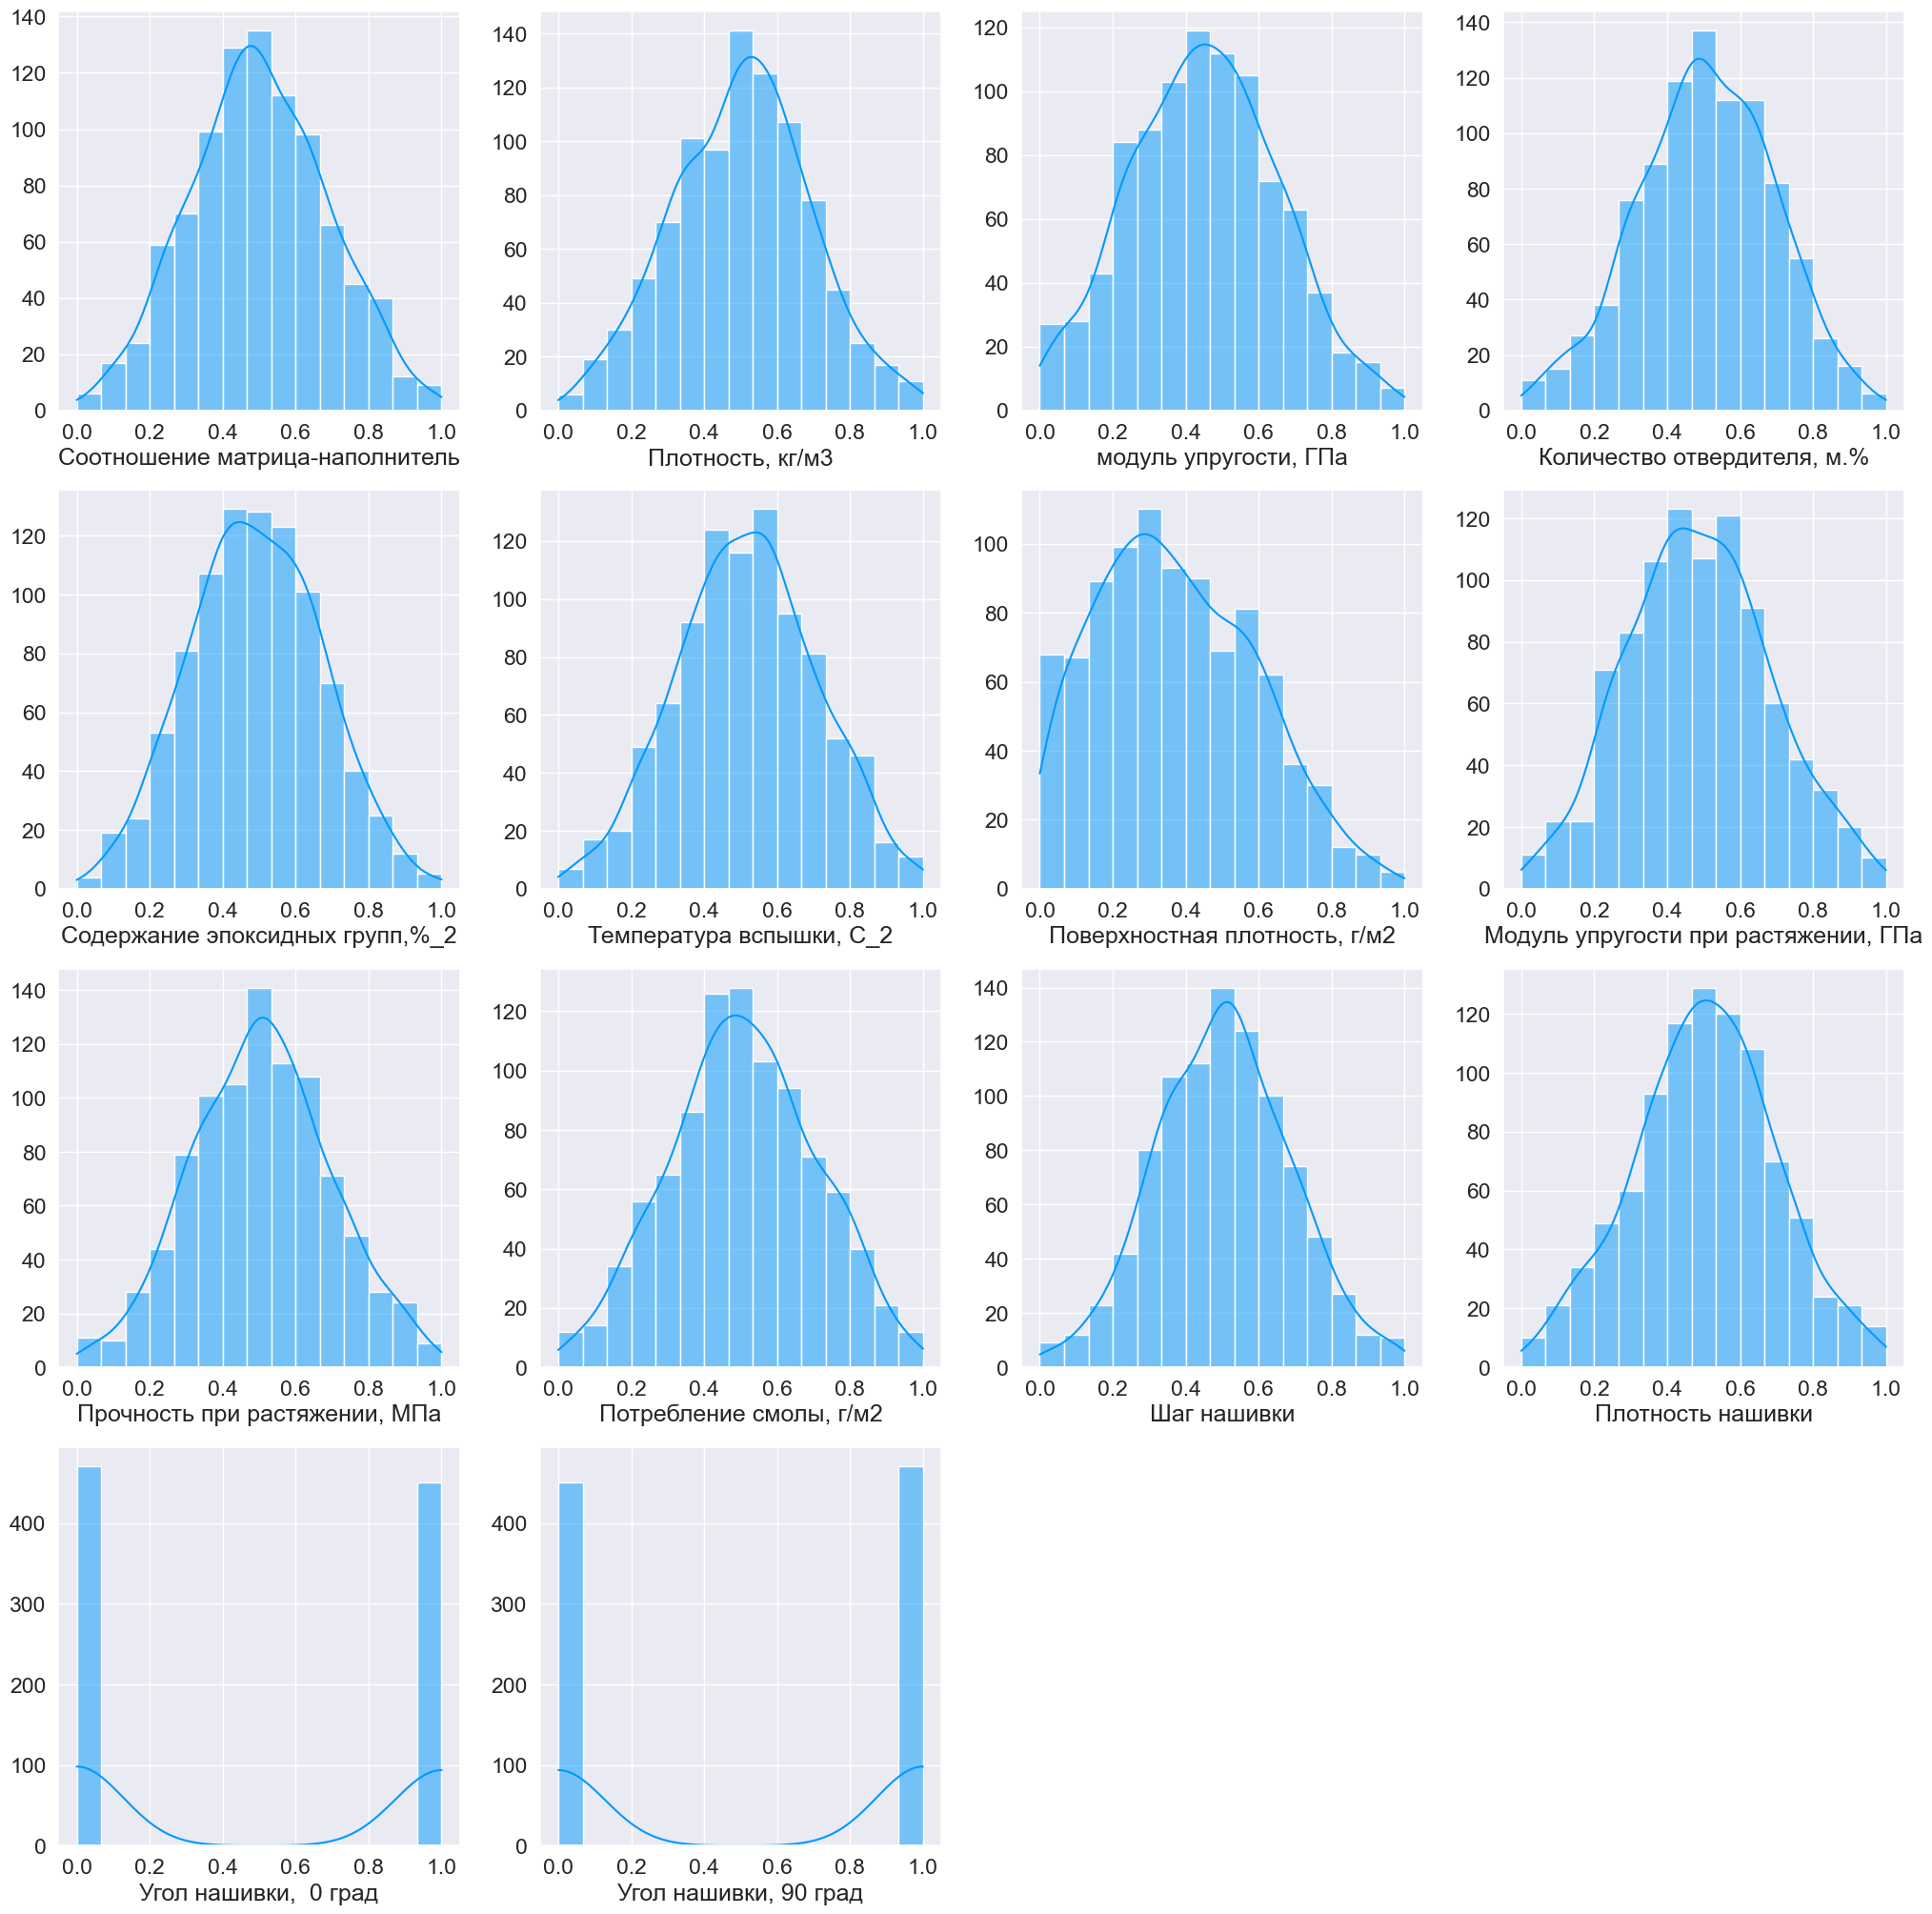

In [84]:
# Гистограммы распределения признаков с графиком распределения после нормализации
i = 1
plt.figure(figsize = (25,25))
for df_col_num in df_after_MinMaxScaler.columns:
    plt.subplot(4, 4, i)
    sns.histplot(data = df_after_MinMaxScaler[df_col_num], kde=True, color = "#0099FF", bins = 15)
    plt.ylabel(None)
    i += 1
plt.savefig('Images\hist_after_norm.png')

In [85]:
#df_after_StandardScaler.describe()

In [86]:
df_after_MinMaxScaler.describe().T

count      mean       std  min  \
Соотношение матрица-наполнитель       921.0  0.499417  0.187960  0.0   
Плотность, кг/м3                      921.0  0.502792  0.188467  0.0   
модуль упругости, ГПа                 921.0  0.451172  0.201579  0.0   
Количество отвердителя, м.%           921.0  0.506224  0.186977  0.0   
Содержание эпоксидных групп,%_2       921.0  0.490564  0.180646  0.0   
Температура вспышки, С_2              921.0  0.516882  0.190775  0.0   
Поверхностная плотность, г/м2         921.0  0.373673  0.217083  0.0   
Модуль упругости при растяжении, ГПа  921.0  0.487495  0.196419  0.0   
Прочность при растяжении, МПа         921.0  0.506936  0.189441  0.0   
Потребление смолы, г/м2               921.0  0.507572  0.199313  0.0   
Шаг нашивки                           921.0  0.503406  0.183686  0.0   
Плотность нашивки                     921.0  0.504075  0.193994  0.0   
Угол нашивки,  0 град                 921.0  0.488599  0.500142  0.0   
Угол нашивки, 90 град                 921.0  0.511401  0.500142  0.0   

                                           25%       50%       75%  max  
Соотношение матрица-наполнитель       0.371727  0.495389  0.629915  1.0  
Плотность, кг/м3                      0.368017  0.511348  0.624865  1.0  
модуль упругости, ГПа                 0.305176  0.450507  0.587163  1.0  
Количество отвердителя, м.%           0.378362  0.506411  0.639114  1.0  
Содержание эпоксидных групп,%_2       0.366496  0.488826  0.623085  1.0  
Температура вспышки, С_2              0.386321  0.517325  0.646605  1.0  
Поверхностная плотность, г/м2         0.204484  0.354800  0.538640  1.0  
Модуль упругости при растяжении, ГПа  0.354252  0.484115  0.617578  1.0  
Прочность при растяжении, МПа         0.375941  0.504992  0.628885  1.0  
Потребление смолы, г/м2               0.374588  0.509275  0.641322  1.0  
Шаг нашивки                           0.372580  0.506110  0.626182  1.0  
Плотность нашивки                     0.376839  0.504642  0.631086  1.0  
Угол нашивки,  0 град                 0.000000  0.000000  1.000000  1.0  
Угол нашивки, 90 град                 0.000000  1.000000  1.000000  1.0

In [87]:
# построим графики оценки плотности ядра 
# В статистике оценка плотности ядра (KDE) - это непараметрический способ оценки функции плотности вероятности (PDF)
# случайной величины.
# fig, ax = plt.subplots(figsize = (25, 25))
# df_after_StandardScaler.plot(kind = 'kde', ax = ax)

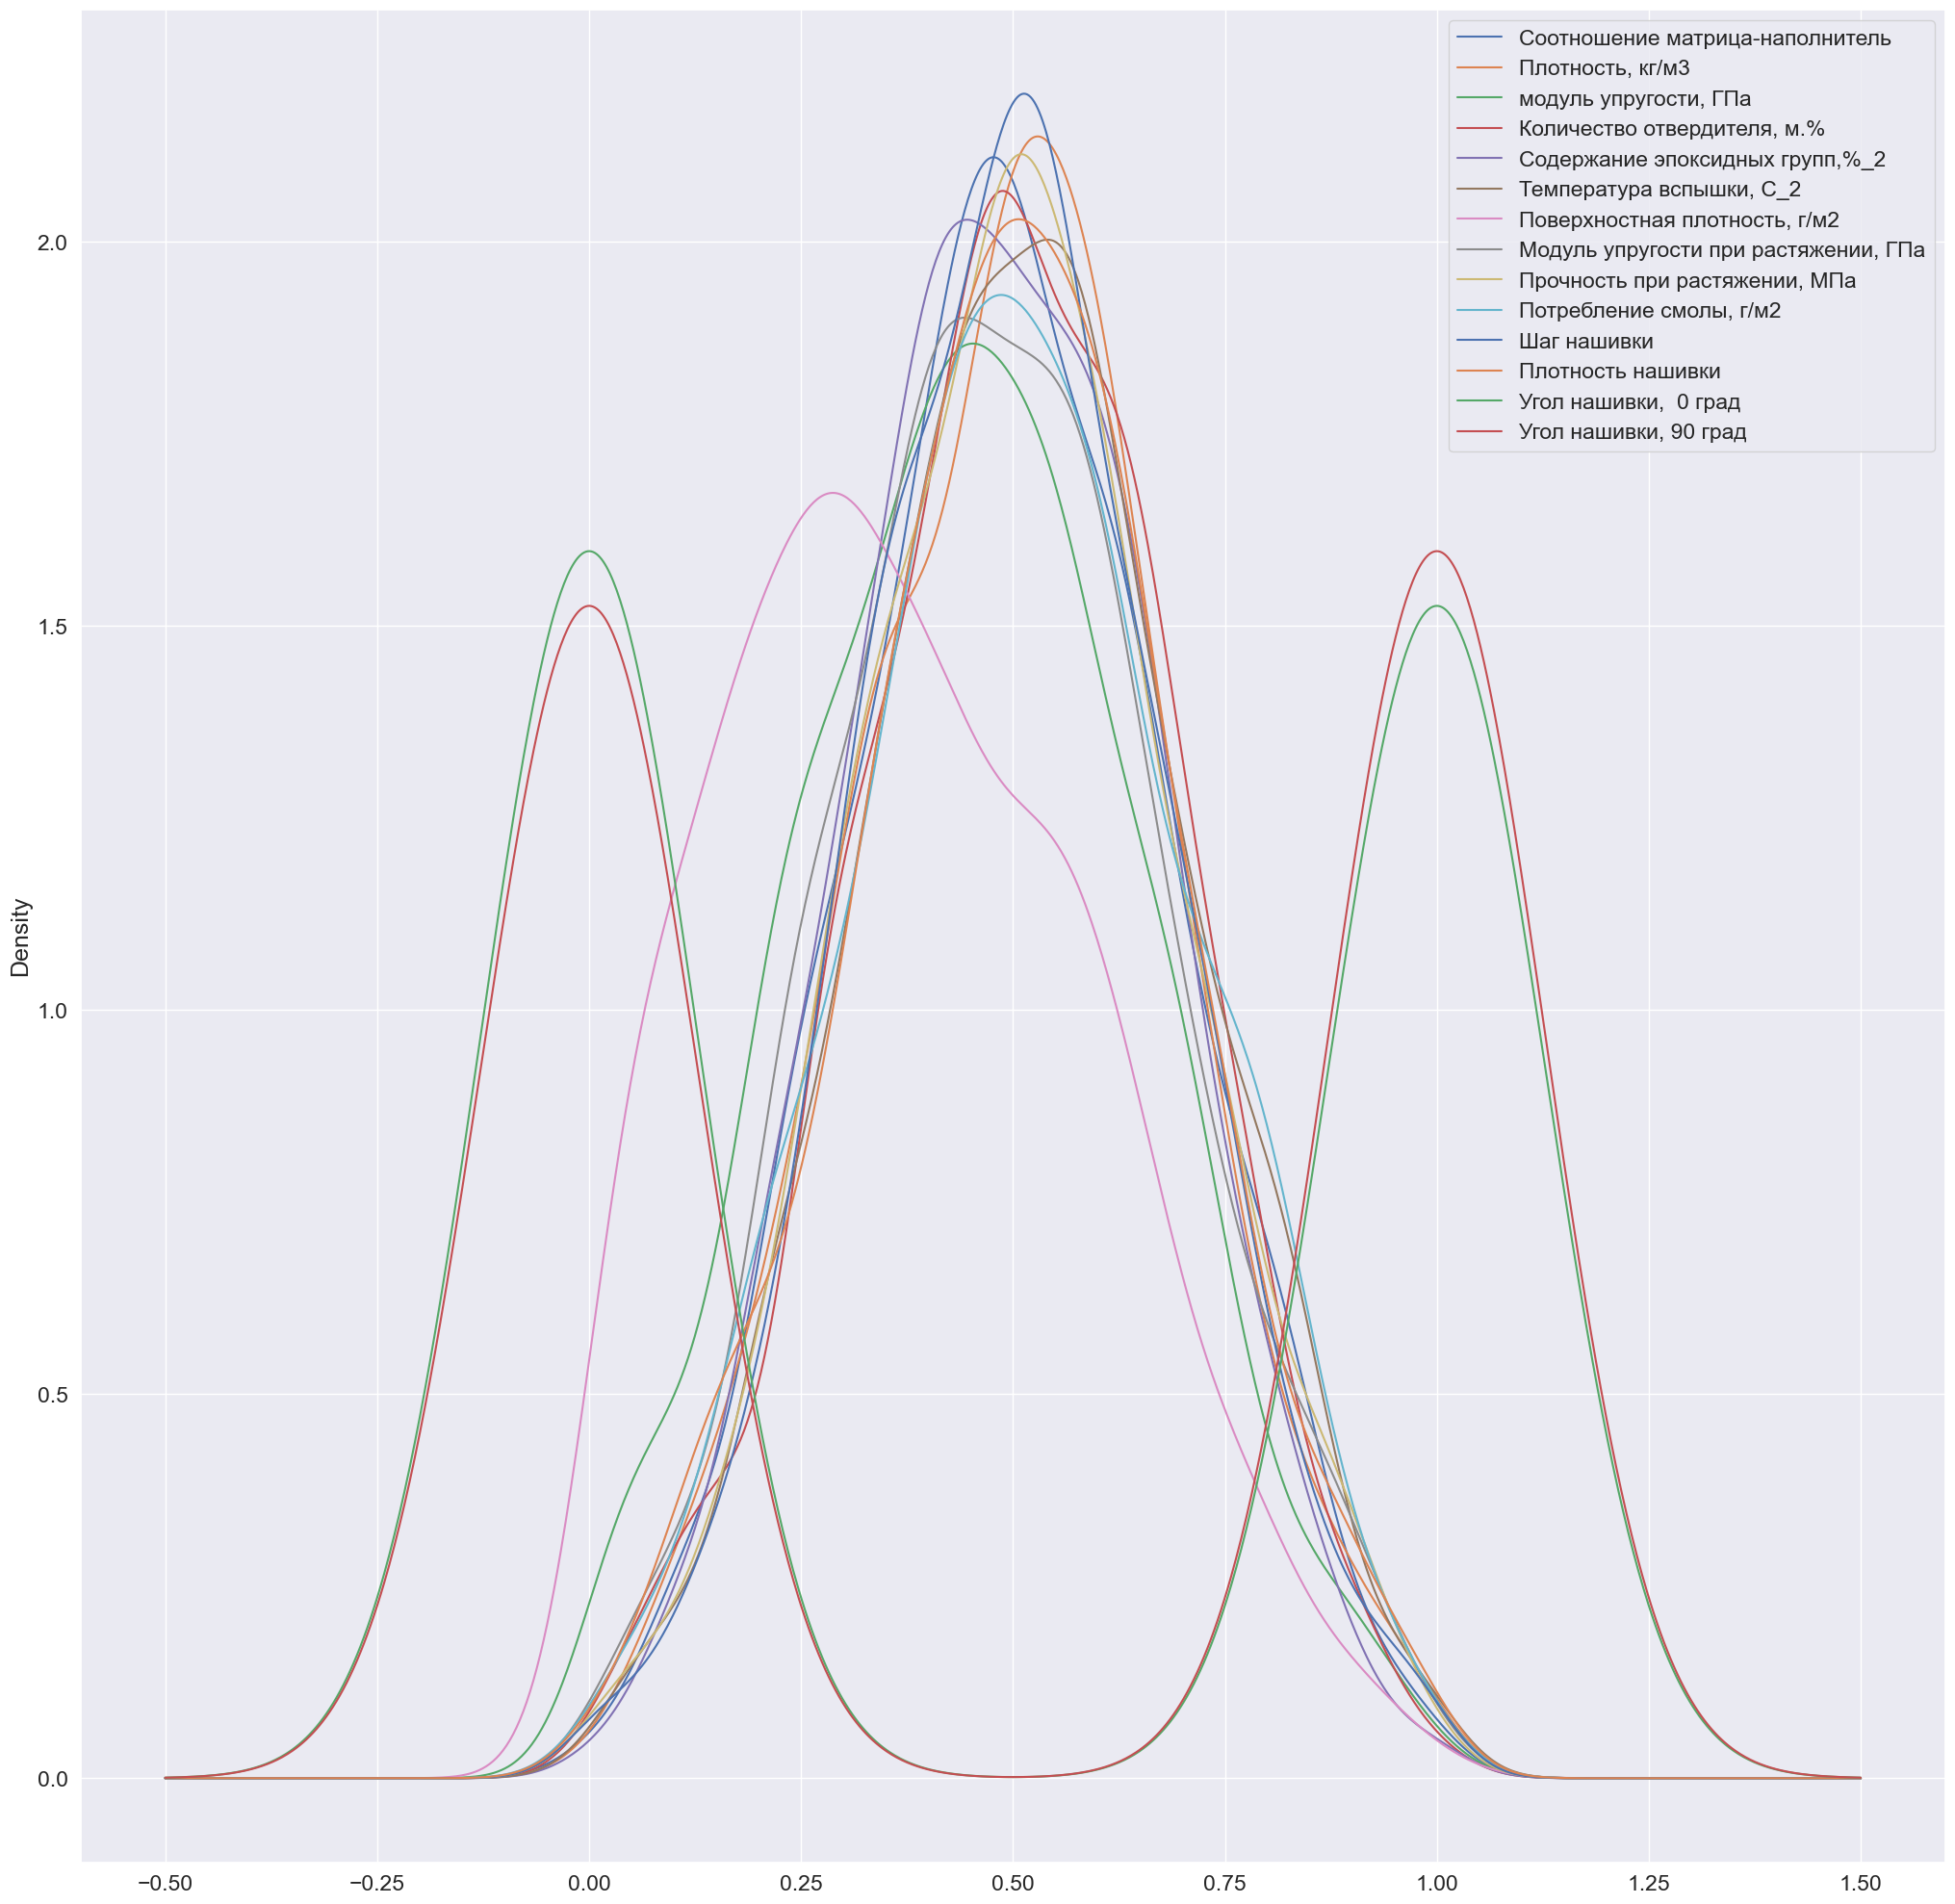

In [88]:
# построим графики оценки плотности ядра 
# В статистике оценка плотности ядра (KDE) - это непараметрический способ оценки функции плотности вероятности (PDF)
# случайной величины.
fig, ax = plt.subplots(figsize = (25, 25))
df_after_MinMaxScaler.plot(kind = 'kde', ax = ax)
plt.savefig('Images\PDF.png')

#  Прогноза модуля упругости при растяжении и прочности при растяжении

Разделим данные на тренировочную и тестовую выборки: обучение и валидацию будем проводить на тренировочной выборки, а финальную проверку качества модели на тестовой выборке.

In [89]:
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV

In [90]:
# тренировочная и тестовая выборки
# целевая переменная "Модуль упругости при растяжении, ГПа"
#target1 = "Модуль упругости при растяжении, ГПа"
# целевая переменная "Прочность при растяжении, МПа"
#target2 = "Прочность при растяжении, МПа"

# параметры 
# test_size - значение с плавающей запятой, оно должно быть между 0.0 и 1.0 и представляет
# долю набора данных для включения в тестовое разделение.
# random_state - управляет перемешиванием, применяемым к данным перед применением разделения.

#x1_train, x1_test, y1_train, y1_test = train_test_split(df_after_StandardScaler.drop([target1], axis=1), 
#                                                        df_after_StandardScaler[target1],
#                                                        test_size=0.3,
#                                                        random_state=17,                                                         shuffle=True
#                                                        )
#
#x2_train, x2_test, y2_train, y2_test = train_test_split(df_after_StandardScaler.drop([target2], axis=1), 
#                                                        df_after_StandardScaler[target2],
#                                                        test_size=0.3,
#                                                        random_state=17,
#                                                        shuffle=True
#                                                        )


In [91]:
# тренировочная и тестовая выборки
# целевая переменная "Модуль упругости при растяжении, ГПа"
target1 = "Модуль упругости при растяжении, ГПа"
# целевая переменная "Прочность при растяжении, МПа"
target2 = "Прочность при растяжении, МПа"

# параметры 
# test_size - значение с плавающей запятой, оно должно быть между 0.0 и 1.0 и представляет
# долю набора данных для включения в тестовое разделение.
# random_state - управляет перемешиванием, применяемым к данным перед применением разделения.

x1_train, x1_test, y1_train, y1_test = train_test_split(df_after_MinMaxScaler.drop([target1], axis=1), 
                                                        df_after_MinMaxScaler[target1],
                                                        test_size=0.3,
                                                        random_state=17,                                                         shuffle=True
                                                        )

x2_train, x2_test, y2_train, y2_test = train_test_split(df_after_MinMaxScaler.drop([target2], axis=1), 
                                                        df_after_MinMaxScaler[target2],
                                                        test_size=0.3,
                                                        random_state=17,
                                                        shuffle=True
                                                        )


In [92]:
print('целевая переменная: ', target1)
print('Размер тренировочной выборки: {}\nРазмер тестовой выборки: {}'.format(x1_train.shape, x1_test.shape))

целевая переменная:  Модуль упругости при растяжении, ГПа
Размер тренировочной выборки: (644, 13)
Размер тестовой выборки: (277, 13)


In [93]:
print('целевая переменная: ', target2)
print('Размер тренировочной выборки: {}\nРазмер тестовой выборки: {}'.format(x2_train.shape, x2_test.shape))

целевая переменная:  Прочность при растяжении, МПа
Размер тренировочной выборки: (644, 13)
Размер тестовой выборки: (277, 13)


In [94]:
# датфрейм для сохранения данных оценки ошибок применяемых для регрессионного анализа методов
df_predict_score = pd.DataFrame(columns = ['метод (регрессор)', 
                                           'целевая переменная', 
                                           'оценка ошибки',
                                           'значение ошибки',
                                           'кросс-валидация (Да/Нет)',
                                           'кросс-валидация - значения гиперпараметров',
                                           'кросс-валидация - значение ошибки'])

### Алгоритм опорных векторов - SVR

class sklearn.svm.SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)


In [95]:
from sklearn.svm import SVR
# метрики
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

сначала используем метод опорных векторов для задач регрессии с параметрами по умолчанию:
- ядро kernel = 'rbf'
- степень полиномиальной функции ядра (‘poly’). Должно быть неотрицательным. Игнорируется всеми другими ядрами.
- gamma = 'scale' - использует 1 / (n_features * X.var()) в качестве значения гаммы по умолчанию.
- tol = 0.001 - Допуск для критерия остановки.
- C= 1.0 - Параметр регуляризации. Сила регуляризации обратно пропорциональна C. Должна быть строго положительной.
- epsilon=0.1 - параметр, в пределах которой функция потерь при обучении не связана с штрафными баллами, предсказанными в пределах расстояния epsilon от фактического значения. Должно быть неотрицательным.
- max_iter = -1  отсутствие ограничений на итерации в алгоритме.

In [96]:
# SVR - целевая переменная "Модуль упругости при растяжении, ГПа"
Model_svr1 = SVR()
Model_svr1.fit(x1_train, y1_train)
y1_predict_svr = Model_svr1.predict(x1_test)

# SVR - целевая переменная "Прочность при растяжении, МПа"
Model_svr2 = SVR()
Model_svr2.fit(x2_train, y2_train)
y2_predict_svr = Model_svr2.predict(x2_test)

In [97]:
# оценка точности предсказания
# используем коэффициент детерминации прогноза - метод score в SVR
# коэффициент детерминации  определяется как (1 - u/v) 
# где u - является остаточной суммой квадратов ((y_true - y_pred)** 2).sum() 
#     v - является общей суммой квадратов ((y_true - y_true.mean()) ** 2).sum(). 
# наилучший возможный результат равен 1.0, и он может быть отрицательным (потому что модель может быть сколь угодно хуже).
print('целевая переменная: ', target1)
print("коэффициент детерминации прогноза, тренировочная выборка:", Model_svr1.score(x1_train, y1_train))
print("коэффициент детерминации прогноза,   проверочная выборка:", Model_svr1.score(x1_test, y1_test))
print('======')
print('целевая переменная: ', target2)
print("коэффициент детерминации прогноза, тренировочная выборка:", Model_svr2.score(x2_train, y2_train))
print("коэффициент детерминации прогноза,   проверочная выборка:", Model_svr2.score(x2_test, y2_test))

целевая переменная:  Модуль упругости при растяжении, ГПа
коэффициент детерминации прогноза, тренировочная выборка: 0.3997666249267545
коэффициент детерминации прогноза,   проверочная выборка: -0.23040655493329187
целевая переменная:  Прочность при растяжении, МПа
коэффициент детерминации прогноза, тренировочная выборка: 0.38934498051613387
коэффициент детерминации прогноза,   проверочная выборка: -0.16435517404081268


In [98]:
# сохраним информацию о r2_score для первой целевой переменной
df_predict_score = df_predict_score.append({'метод (регрессор)':'Support Vector regression',
                                            'целевая переменная':target1,
                                            'оценка ошибки':'R2',
                                            'значение ошибки':r2_score(y1_test, y1_predict_svr),
                                            'кросс-валидация (Да/Нет)':'Нет',
                                            'кросс-валидация - значения гиперпараметров':'-',
                                            'кросс-валидация - значение ошибки':'-'}, ignore_index=True)

C:\Users\md15m\AppData\Local\Temp\ipykernel_22880\4031559457.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_predict_score = df_predict_score.append({'метод (регрессор)':'Support Vector regression',


In [99]:
# сохраним информацию о r2_score для второй целевой переменной
df_predict_score = df_predict_score.append({'метод (регрессор)':'Support Vector regression',
                                            'целевая переменная':target2,
                                            'оценка ошибки':'R2',
                                            'значение ошибки':r2_score(y2_test, y2_predict_svr),
                                            'кросс-валидация (Да/Нет)':'Нет',
                                            'кросс-валидация - значения гиперпараметров':'-',
                                            'кросс-валидация - значение ошибки':'-'}, ignore_index=True)

C:\Users\md15m\AppData\Local\Temp\ipykernel_22880\3202656832.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_predict_score = df_predict_score.append({'метод (регрессор)':'Support Vector regression',


In [100]:
#df_predict_score

In [101]:
# функция вычисляющая абсолютную оценку погрешности между тестовым и предсказанным значением в процентном соотношении
# и выводящая график для каждого предсказанного значения переменной в отличие от реального значения в процентном соотношении 
def plot_percent_error(y_test, y_predict, method_name, target_name, f_name):
    x = np.arange(1, y_test.shape[0]+1)
    y = np.abs(y_test - y_predict) / y_test * 100
    fig, ax = plt.subplots()
    ax.bar(x, y)
    fig.set_facecolor('white')
    fig.set_figwidth(25)    
    fig.set_figheight(10)    
    plt.ylabel('ошибка, в %')
    plt.xlabel('позиция в массиве тестовой выборки, целевая переменная: ' + target_name)
    plt.title("ошибки в процентном соотношении между тестовым и предсказанным значениями, метод: " + method_name)
    plt.savefig(f_name)
    plt.show()
    return

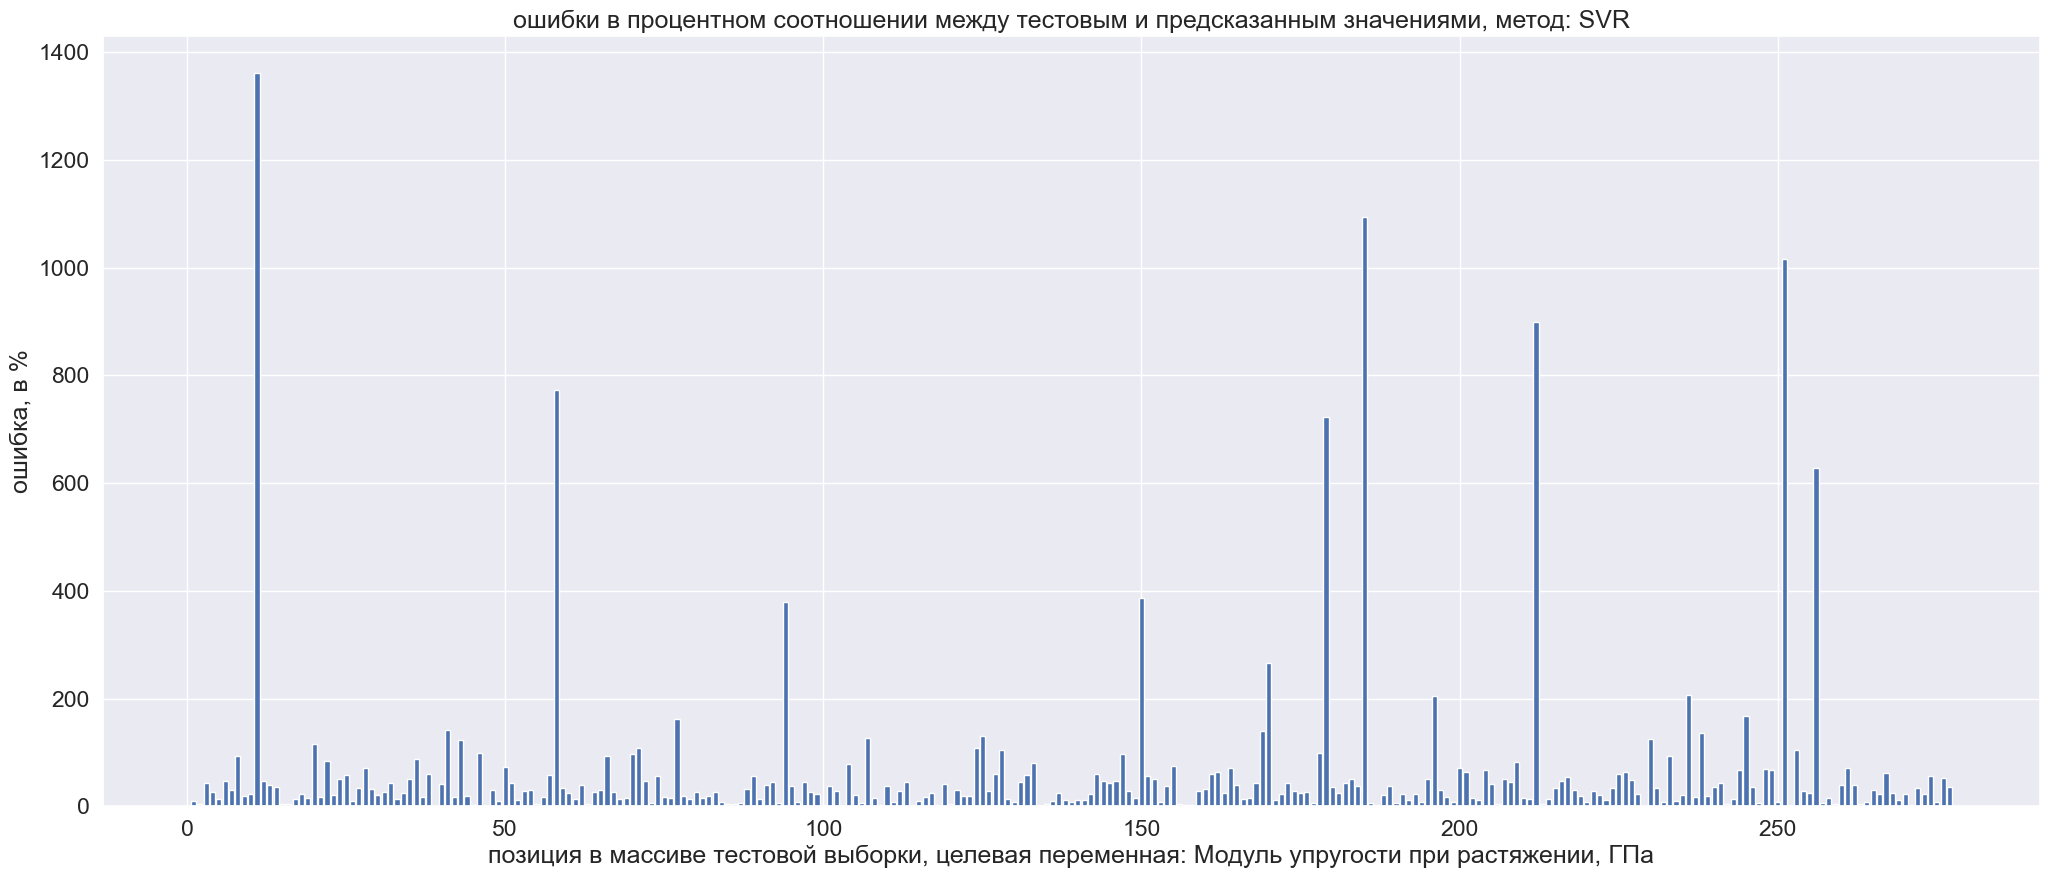

In [102]:
plot_percent_error(y1_test, y1_predict_svr, "SVR", target1, 'Images\plot_percent_error_SVR1.png')

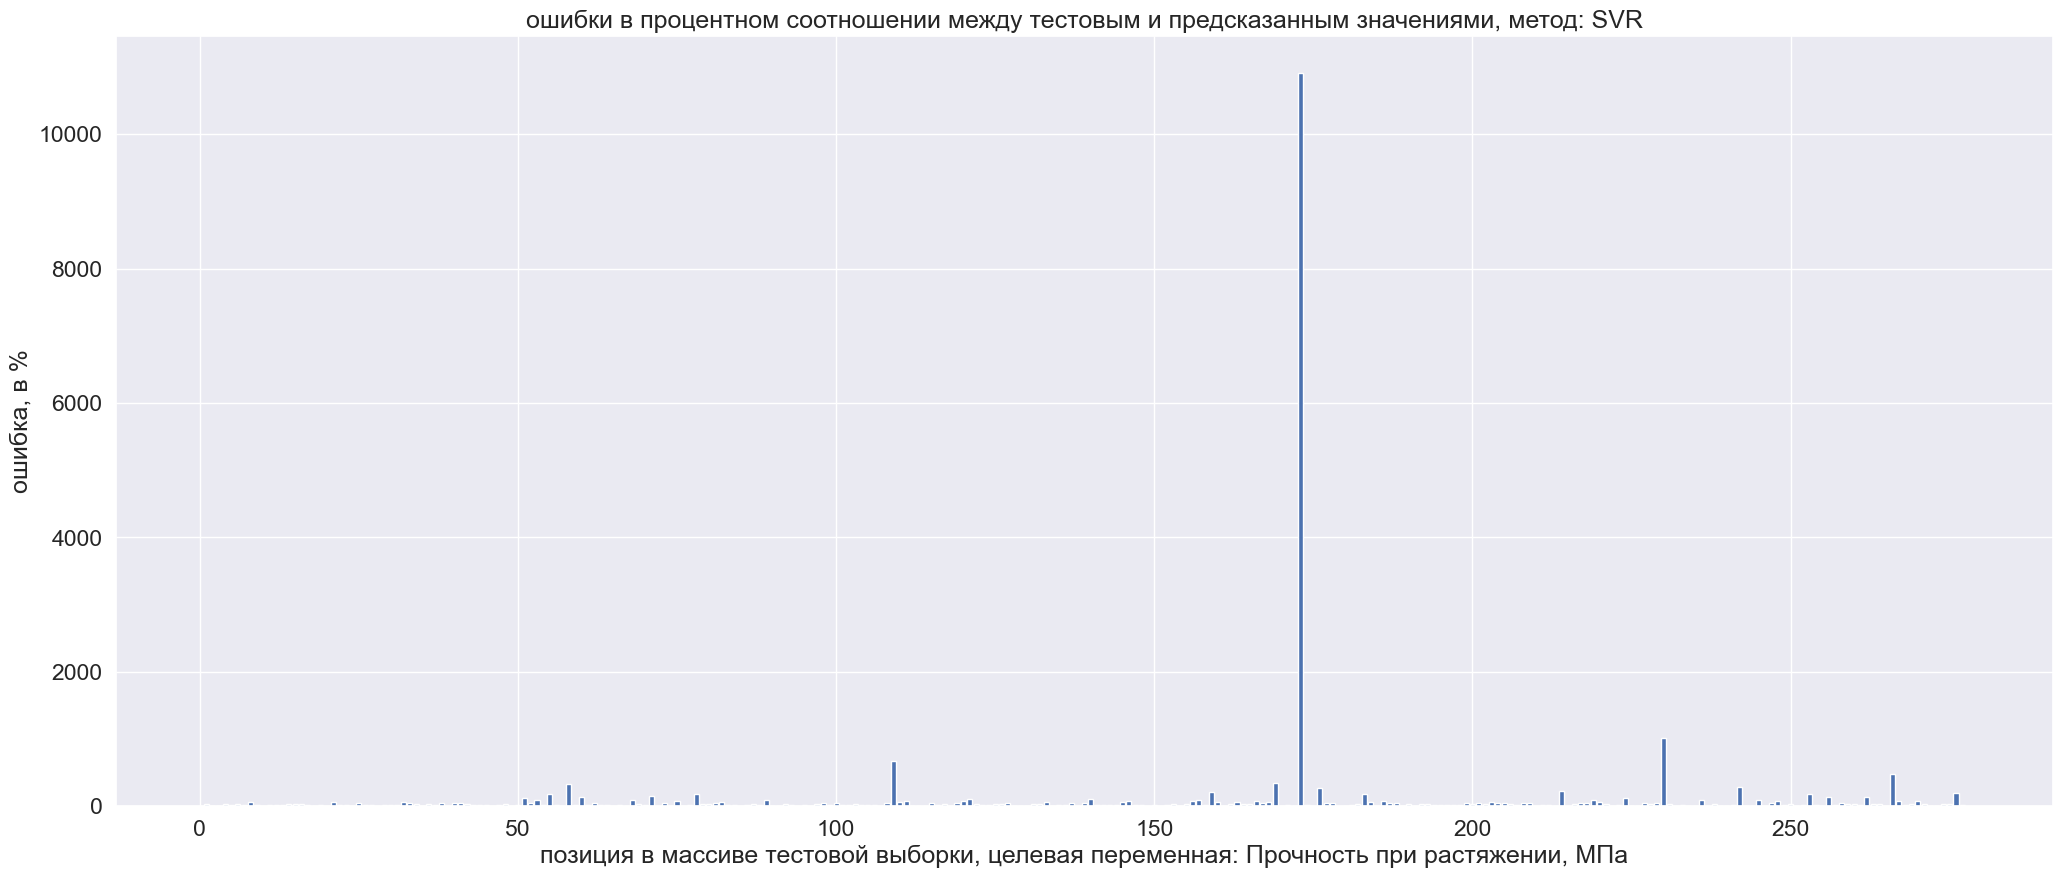

In [103]:
plot_percent_error(y2_test, y2_predict_svr, "SVR", target2, 'Images\plot_percent_error_SVR2.png')

In [104]:
# функция вычисляющая абсолютную оценку погрешности между тестовым и предсказанным значением
# и выводящая график распределения ошибок 
def plot_error(y_test, y_predict, method_name, target_name, f_name):
    error = y_test - y_predict
    plt.figure(figsize = (7,3))
    plt.hist(error, bins = 35, color = "#0099FF")
    plt.xlabel('ошибка предсказания')
    plt.ylabel('кол-во')
    plt.title(method_name + ", " + target_name)
    plt.savefig(f_name)
    plt.show()
    return

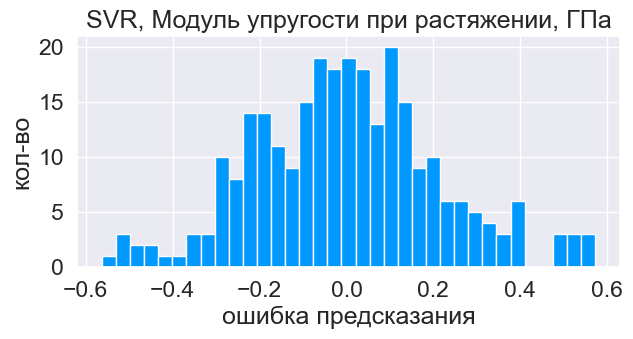

In [105]:
plot_error(y1_test, y1_predict_svr, "SVR", target1, 'Images\plot_error_SVR1.png')

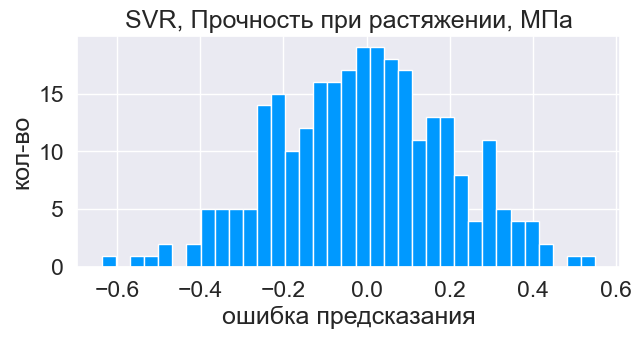

In [106]:
plot_error(y2_test, y2_predict_svr, "SVR", target2, 'Images\plot_error_SVR2.png')

In [107]:
# кросс-валидация на базовых параметрах
from sklearn.model_selection import cross_val_score

In [108]:
cv_score_svr1 = cross_val_score(Model_svr1, x1_train, y1_train, cv=10, n_jobs=-1, scoring='neg_median_absolute_error')
cv_score_svr2 = cross_val_score(Model_svr2, x2_train, y2_train, cv=10, n_jobs=-1, scoring='neg_median_absolute_error')
print('целевая переменная: ', target1)
print('Точность модели SVR на кросс-валидации: %.3f+-%.3f'% (np.median(cv_score_svr1), np.std(cv_score_svr1)))
print('======')      
print('целевая переменная: ', target2)
print('Точность модели SVR на кросс-валидации: %.3f+-%.3f'% (np.median(cv_score_svr2), np.std(cv_score_svr2)))

целевая переменная:  Модуль упругости при растяжении, ГПа
Точность модели SVR на кросс-валидации: -0.154+-0.017
целевая переменная:  Прочность при растяжении, МПа
Точность модели SVR на кросс-валидации: -0.140+-0.017


In [109]:
# Вывод: получили плохую точночть на модели SVR на базовых параметрах

### настройка модели SVR на кросс-валидации, подбор гиперпараметров

In [110]:
def val_grid_search(x, y, model, params, cv):
    grid = GridSearchCV(model, param_grid=params, scoring='r2', n_jobs=-1, cv=cv)
    grid.fit(x, y)
    print('Лучшая модель на кросс-валидации с параметрами {} и результатом {}'.format(grid.best_params_, 
                                                                                      np.round(grid.best_score_,4)))
    return grid.best_estimator_ , grid.best_params_ , grid.best_score_

In [111]:
#def val_grid_search(x, y, model, params, cv):
#    grid = GridSearchCV(model, param_grid=params, n_jobs=-1, cv=cv)
#    grid.fit(x, y)
#    print('Лучшая модель на кросс-валидации с параметрами {} и результатом {}'.format(grid.best_params_, 
#                                                                                      np.round(grid.best_score_,4)))
#    return grid.best_estimator_ , grid.best_params_ , grid.best_score_

In [112]:
params_svr1 = {'C': (0.1, 1, 10, 100), 'kernel': ('rbf', 'poly', 'sigmoid'), 'degree': (2,3,5), 'gamma':('scale', 'auto')}
print('целевая переменная: ', target1)
best_model_svr1_estimator, best_model_svr1_params, best_model_svr1_score = val_grid_search(x1_train, 
                                                                                           y1_train, 
                                                                                           Model_svr1, 
                                                                                           params_svr1, 
                                                                                           10)

целевая переменная:  Модуль упругости при растяжении, ГПа
Лучшая модель на кросс-валидации с параметрами {'C': 1, 'degree': 5, 'gamma': 'auto', 'kernel': 'poly'} и результатом -0.0108


In [113]:
params_svr2 = {'C': (0.1, 1, 10, 100), 'kernel': ('rbf', 'poly', 'sigmoid'), 'degree': (2,3,5), 'gamma':('scale', 'auto')}
print('целевая переменная: ', target2)
best_model_svr2_estimator, best_model_svr2_params, best_model_svr2_score = val_grid_search(x2_train, 
                                                                                           y2_train, 
                                                                                           Model_svr2, 
                                                                                           params_svr2, 
                                                                                           10)

целевая переменная:  Прочность при растяжении, МПа
Лучшая модель на кросс-валидации с параметрами {'C': 1, 'degree': 5, 'gamma': 'auto', 'kernel': 'poly'} и результатом -0.0163


In [114]:
# сохраним информацию о кросс-валидации, подбор гиперпараметров для первой целевой переменной
df_predict_score = df_predict_score.append({'метод (регрессор)':'Support Vector regression',
                                            'целевая переменная':target1,
                                            'оценка ошибки':'R2',
                                            'значение ошибки':'-',
                                            'кросс-валидация (Да/Нет)':'Да',
                                            'кросс-валидация - значения гиперпараметров':str(best_model_svr1_params),
                                            'кросс-валидация - значение ошибки':str(best_model_svr1_score)}, ignore_index=True)

C:\Users\md15m\AppData\Local\Temp\ipykernel_22880\2366218995.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_predict_score = df_predict_score.append({'метод (регрессор)':'Support Vector regression',


In [115]:
# сохраним информацию о кросс-валидации, подбор гиперпараметров для второй целевой переменной
df_predict_score = df_predict_score.append({'метод (регрессор)':'Support Vector regression',
                                            'целевая переменная':target2,
                                            'оценка ошибки':'R2',
                                            'значение ошибки':'-',
                                            'кросс-валидация (Да/Нет)':'Да',
                                            'кросс-валидация - значения гиперпараметров':str(best_model_svr2_params),
                                            'кросс-валидация - значение ошибки':str(best_model_svr2_score)}, ignore_index=True)

C:\Users\md15m\AppData\Local\Temp\ipykernel_22880\1676774654.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_predict_score = df_predict_score.append({'метод (регрессор)':'Support Vector regression',


### Метод K Neighbors Regressor  (К-ближайших соседей)

In [116]:
from sklearn.neighbors import KNeighborsRegressor

Регрессия на основе k-ближайших соседей.
Целевая переменная предсказывается путем локальной интерполяции целевой переменной, связанных с ближайшими соседями в обучающем наборе.
KNeighborsRegressor(n_neighbors= , *, weights='uniform', algorithm ='auto', leaf_size= 30, p= 2, metric='minkowski', metric_params=None, n_jobs=None)

сначала используем метод К-ближайших соседей для задач регрессии с параметрами по умолчанию:

n_neighbors = 5 (значение по умолчанию) - количество соседей

weights ='uniform' - весовая функция, используемая в прогнозировании.

    Возможные значения:
    uniform  - равномерные веса, все точки в каждой окрестности взвешиваются одинаково.
    distance - взвешивание точек на величину, обратную их расстоянию, в этом случае более близкие соседи точки запроса
               будут иметь большее влияние, чем соседи, которые находятся дальше.
    [collable] - определяемая пользователем функция, которая принимает массив расстояний и возвращает массив той же формы,
                 содержащий веса.

algorithm = 'auto', возможные значения {'auto', 'ball_tree', 'kd_tree', 'brute'}

leaf_sizeint = 30 - размер листа передается в BallTree или KDTree.

               Это может повлиять на скорость построения и запроса, а также на объем памяти,
               необходимый для хранения дерева. Оптимальное значение зависит от характера проблемы.

p = 2 (значение по умолчанию)
               
               Параметр мощности для метрики Минковского. Когда p = 1, это эквивалентно использованию manhattan_distance (l1)
               и euclidean_distance (l2) для p = 2. Для произвольного p используется minkowski_distance (l_p).

metric = 'minkowski' (значение по умолчанию)
               
               Метрика, используемая для вычисления расстояния. По умолчанию используется значение "minkowski",
               что приводит к стандартному евклидову расстоянию при p = 2.
               (см. документацию scipy.spatial.distance и метрики, перечисленные в distance_metrics
                для получения допустимых значений метрик.)

n_jobs = Нет

               Количество параллельных заданий, выполняемых для поиска соседей. None означает 1,
               -1 означает использование всех процессоров.

In [117]:
# Метод К-ближайших соседей

# KNR - целевая переменная "Модуль упругости при растяжении, ГПа"
Model_knr1 = KNeighborsRegressor()
Model_knr1.fit(x1_train, y1_train)
y1_predict_knr = Model_knr1.predict(x1_test)

# KNR - целевая переменная "Прочность при растяжении, МПа"
Model_knr2 = KNeighborsRegressor()
Model_knr2.fit(x2_train, y2_train)
y2_predict_knr = Model_knr2.predict(x2_test)

In [118]:
# оценка точности предсказания
# используем коэффициент детерминации прогноза - метод score в KNR
# где u - является остаточной суммой квадратов ((y_true - y_pred)** 2).sum() 
#     v - является общей суммой квадратов ((y_true - y_true.mean()) ** 2).sum(). 
# наилучший возможный результат равен 1.0, и он может быть отрицательным (потому что модель может быть сколь угодно хуже).
print('целевая переменная: ', target1)
print("коэффициент детерминации прогноза, тренировочная выборка:", Model_knr1.score(x1_train, y1_train))
print("коэффициент детерминации прогноза,   проверочная выборка:", Model_knr1.score(x1_test, y1_test))
print('======')
print('целевая переменная: ', target2)
print("коэффициент детерминации прогноза, тренировочная выборка:", Model_knr2.score(x2_train, y2_train))
print("коэффициент детерминации прогноза,   проверочная выборка:", Model_knr2.score(x2_test, y2_test))

целевая переменная:  Модуль упругости при растяжении, ГПа
коэффициент детерминации прогноза, тренировочная выборка: 0.15903322617216686
коэффициент детерминации прогноза,   проверочная выборка: -0.2358118892335639
целевая переменная:  Прочность при растяжении, МПа
коэффициент детерминации прогноза, тренировочная выборка: 0.18491245797262823
коэффициент детерминации прогноза,   проверочная выборка: -0.1904980668429781


In [119]:
# сохраним информацию о r2_score для первой целевой переменной
df_predict_score = df_predict_score.append({'метод (регрессор)':'KNeighborsRegressor',
                                            'целевая переменная':target1,
                                            'оценка ошибки':'R2',
                                            'значение ошибки':r2_score(y1_test, y1_predict_knr),
                                            'кросс-валидация (Да/Нет)':'Нет',
                                            'кросс-валидация - значения гиперпараметров':'-',
                                            'кросс-валидация - значение ошибки':'-'}, ignore_index=True)

C:\Users\md15m\AppData\Local\Temp\ipykernel_22880\1058444938.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_predict_score = df_predict_score.append({'метод (регрессор)':'KNeighborsRegressor',


In [120]:
# сохраним информацию о r2_score для второй целевой переменной
df_predict_score = df_predict_score.append({'метод (регрессор)':'KNeighborsRegressor',
                                            'целевая переменная':target2,
                                            'оценка ошибки':'R2',
                                            'значение ошибки':r2_score(y2_test, y2_predict_knr),
                                            'кросс-валидация (Да/Нет)':'Нет',
                                            'кросс-валидация - значения гиперпараметров':'-',
                                            'кросс-валидация - значение ошибки':'-'}, ignore_index=True)

C:\Users\md15m\AppData\Local\Temp\ipykernel_22880\1458750244.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_predict_score = df_predict_score.append({'метод (регрессор)':'KNeighborsRegressor',


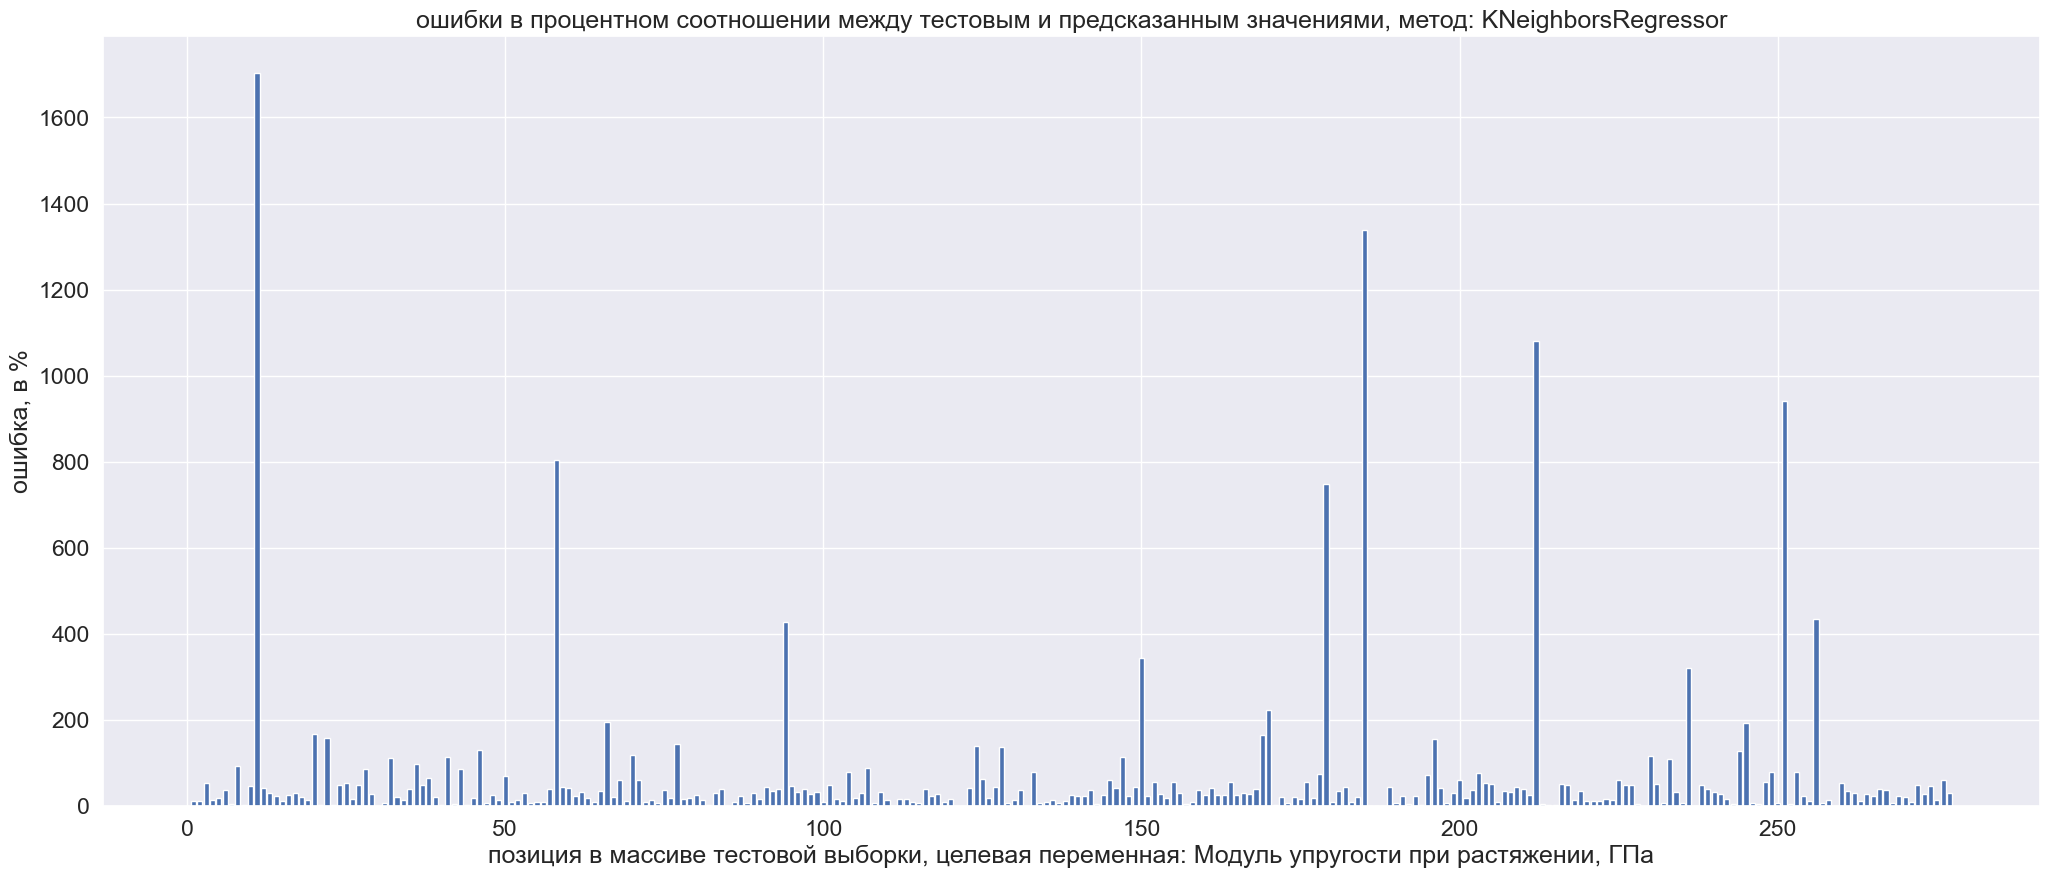

In [121]:
plot_percent_error(y1_test, y1_predict_knr, "KNeighborsRegressor", target1, 'Images\plot_percent_error_KNR1.png')

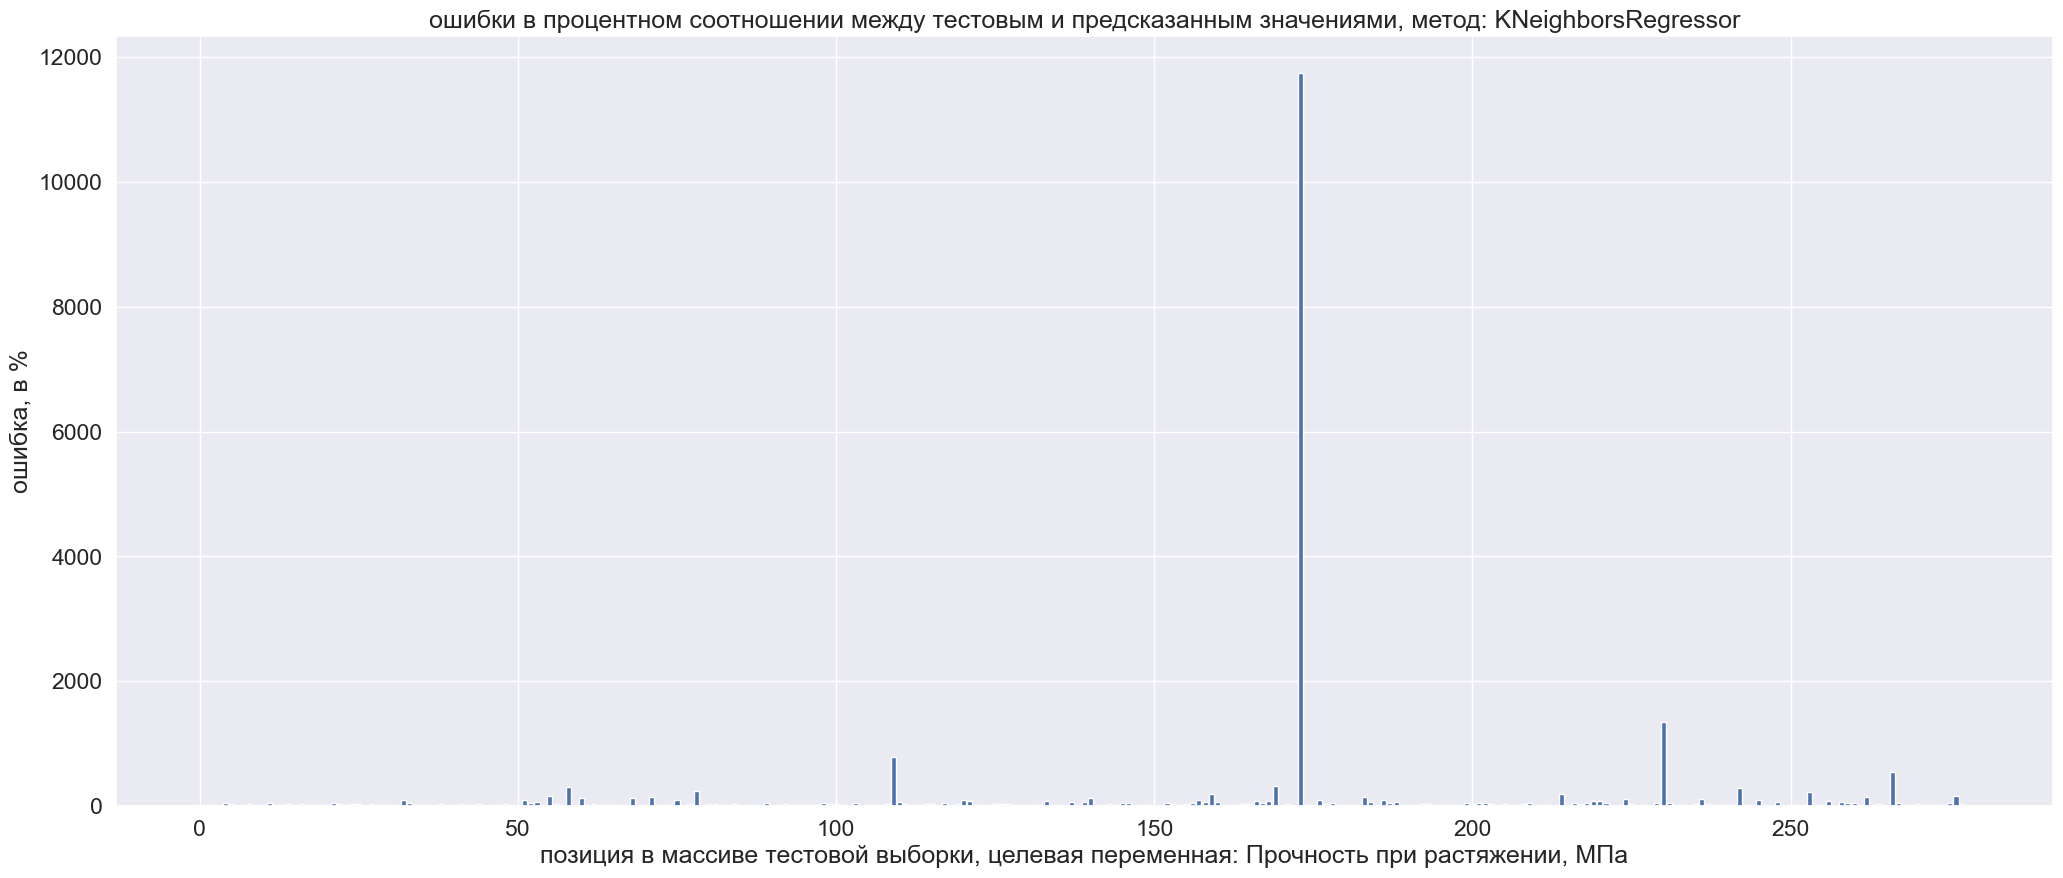

In [122]:
plot_percent_error(y2_test, y2_predict_knr, "KNeighborsRegressor", target2, 'Images\plot_percent_error_KNR2.png')

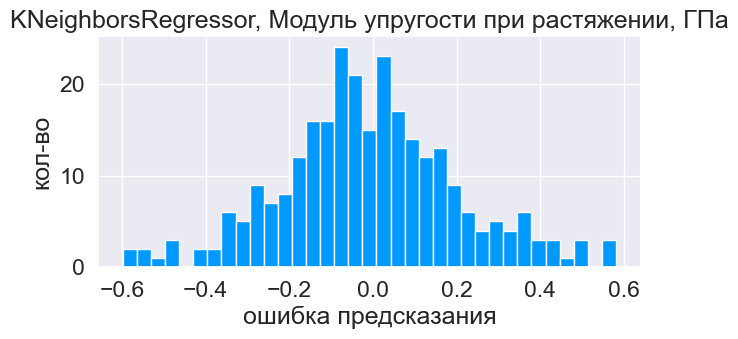

In [123]:
plot_error(y1_test, y1_predict_knr, "KNeighborsRegressor", target1, 'Images\plot_error_KNR1.png')

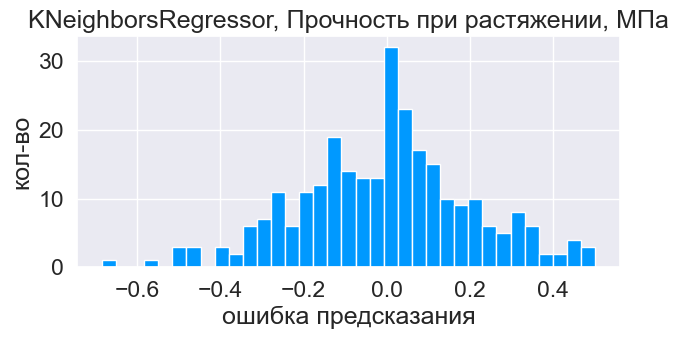

In [124]:
plot_error(y2_test, y2_predict_knr, "KNeighborsRegressor", target2, 'Images\plot_error_KNR2.png')

### настройка модели KNeighborsRegressor на кросс-валидации, подбор гиперпараметров

In [125]:
params_knr1 = {'n_neighbors': (3, 5, 7, 10),
               'weights': ('uniform', 'distance'),
               'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute')}
print('целевая переменная: ', target1)
best_model_knr1_estimator, best_model_knr1_params, best_model_knr1_score = val_grid_search(x1_train, 
                                                                                           y1_train, 
                                                                                           Model_knr1, 
                                                                                           params_knr1, 
                                                                                           10)

целевая переменная:  Модуль упругости при растяжении, ГПа
Лучшая модель на кросс-валидации с параметрами {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'} и результатом -0.1545


In [126]:
params_knr2 = {'n_neighbors': (3, 5, 7, 10),
               'weights': ('uniform', 'distance'),
               'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute')}
print('целевая переменная: ', target2)
best_model_knr2_estimator, best_model_knr2_params, best_model_knr2_score = val_grid_search(x2_train,
                                                                                           y2_train,
                                                                                           Model_knr2, 
                                                                                           params_knr2, 
                                                                                           10)

целевая переменная:  Прочность при растяжении, МПа
Лучшая модель на кросс-валидации с параметрами {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'} и результатом -0.1565


In [127]:
# сохраним информацию о кросс-валидации, подбор гиперпараметров для первой целевой переменной
df_predict_score = df_predict_score.append({'метод (регрессор)':'KNeighborsRegressor',
                                            'целевая переменная':target1,
                                            'оценка ошибки':'R2',
                                            'значение ошибки':'-',
                                            'кросс-валидация (Да/Нет)':'Да',
                                            'кросс-валидация - значения гиперпараметров':str(best_model_knr1_params),
                                            'кросс-валидация - значение ошибки':str(best_model_knr1_score)}, ignore_index=True)

C:\Users\md15m\AppData\Local\Temp\ipykernel_22880\3394073139.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_predict_score = df_predict_score.append({'метод (регрессор)':'KNeighborsRegressor',


In [128]:
# сохраним информацию о кросс-валидации, подбор гиперпараметров для второй целевой переменной
df_predict_score = df_predict_score.append({'метод (регрессор)':'KNeighborsRegressor',
                                            'целевая переменная':target2,
                                            'оценка ошибки':'R2',
                                            'значение ошибки':'-',
                                            'кросс-валидация (Да/Нет)':'Да',
                                            'кросс-валидация - значения гиперпараметров':str(best_model_knr2_params),
                                            'кросс-валидация - значение ошибки':str(best_model_knr2_score)}, ignore_index=True)

C:\Users\md15m\AppData\Local\Temp\ipykernel_22880\3842418783.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_predict_score = df_predict_score.append({'метод (регрессор)':'KNeighborsRegressor',


### Метод DecisionTreeRegressor  (деревья регрессии)

In [129]:
from sklearn.tree import DecisionTreeRegressor

DecisionTreeRegressor( , criterion ='squared_error', splitter ='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease= 0.0, ccp_alpha= 0.0)

criterion ='squared_error' - Функция для измерения качества разделения
    
    возможные значения {'squared_error', 'friedman_mse', 'absolute_error', 'poisson'}:
    - 'squared_error' - для среднеквадратичной ошибки, которая равна уменьшению дисперсии в качестве критерия выбора объекта
    и минимизирует потери L2, используя среднее значение каждого терминального узла
    - 'friedman_mse' - использует среднеквадратичную ошибку с оценкой улучшения Фридмана для потенциальных расщеплений
    - 'absolute_error' - для средней абсолютной ошибки, которая минимизирует потерю L1, используя медиану каждого
    терминального узла
    'poisson' - использует уменьшение отклонения Пуассона для поиска расщеплений

splitter ='best' - разделитель, стратегия, используемая для выбора разделения на каждом узле.

    возможные значения {'best', 'random'}:
    Поддерживаемые стратегии - 'best' для выбора наилучшего разделения и 'random' для выбора наилучшего случайного разделения.

max_depth = None - Максимальная глубина дерева. Если нет, то узлы расширяются до тех пор, пока все листья не станут чистыми или пока все листья не будут содержать меньше образцов min_samples_split.

min_samples_split = 2 - Минимальное количество выборок, необходимых для разделения внутреннего узла:
        
        Если int, то считайте min_samples_split как минимальное число.
        Если float, то min_samples_split это дробь и ceil(min_samples_split * n_samples) минимальное количество выборок
        для каждого разделения.

min_samples_leaf = 1 - Минимальное количество выборок, которое требуется для конечного узла. Точка разделения на любой глубине будет учитываться только в том случае, если она оставляет по крайней мере min_samples_leaf обучающие выборки в каждой из левой
и правой ветвей. Это может привести к сглаживанию модели, особенно в регрессии.

        Если int, то считайте min_samples_leaf как минимальное число.
        Если float , то min_samples_leaf это дробь и ceil(min_samples_leaf * n_samples) минимальное количество выборок
        для каждого узла.


min_weight_fraction_leaf = 0.0 - минимальная взвешенная доля от общей суммы весов (всех входных выборок), требуемая для конечного узла. Образцы имеют одинаковый вес, если параметр sample_weight не указан.

max_features = None , float или {'auto', 'sqrt', 'log2'} - Количество функций, которые следует учитывать при поиске наилучшего разделения:

        Если int, то учитывайте max_features особенности при каждом разделении.
        Если float , то max_features это дробь, и max(1, int(max_features * n_features_in_)) функции рассматриваются
        при каждом разделении.
        Если 'auto', то max_features=n_features.
        Если 'sqrt', то max_features=sqrt(n_features).
        Если 'log2', то max_features=log2(n_features).
        Если None, то max_features=n_features.

Примечание: поиск разделения не прекращается до тех пор, пока не будет найден хотя бы один допустимый раздел образцов узлов, даже если для этого требуется эффективно проверять больше, чем max_features функции.

random_state = None - Управляет случайностью оценки. Функции всегда случайным образом переставляются при каждом разделении,
даже если splitter установлено значение "best". Когда max_features < n_features алгоритм будет выбирать max_features
случайным образом при каждом разделении, прежде чем найти наилучшее разделение среди них. Но наилучшее найденное разделение может отличаться в разных запусках, даже если max_features=n_features. Это тот случай, когда улучшение критерия одинаково для нескольких разделений, и одно разделение должно быть выбрано случайным образом. Чтобы получить детерминированное поведение во время подгонки, random_state должно быть зафиксировано в целое число. Подробности см. в Глоссарии.

max_leaf_nodes  = None - Создайте дерево с max_leaf_nodes с помощью метода наилучшего выбора. Лучшие узлы определяются как относительное уменьшение примесей. Если нет, то неограниченное количество конечных узлов.

min_impurity_decrease = 0.0 - Узел будет разделен, если это разделение приведет к уменьшению примеси, большей или равной этому значению.

Взвешенное уравнение уменьшения примесей выглядит следующим образом:

N_t / N * (примесь - N_t_R / N_t * right_impurity
                    - N_t_L / N_t * left_impurity)
где N- общее количество выборок, N_t- количество выборок в текущем узле, N_t_L- количество выборок в левом дочернем элементе и N_t_R- количество выборок в правом дочернем элементе.

N, N_t, N_t_Rи N_t_Lвсе они относятся к взвешенной сумме, если sample_weightпередается.


ccp_alpha неотрицательное значение с плавающей запятой, по умолчанию = 0.0
Параметр сложности, используемый для сокращения минимальной стоимости-сложности. Будет выбрано поддерево с наибольшей стоимостью сложности, которая меньше, чем ccp_alpha. По умолчанию обрезка не выполняется. Подробности см. в разделе Сокращение минимальной стоимости и сложности.

In [130]:
# Деревья регрессии

# DTR - целевая переменная "Модуль упругости при растяжении, ГПа"
Model_dtr1 = DecisionTreeRegressor()
Model_dtr1.fit(x1_train, y1_train)
y1_predict_dtr = Model_dtr1.predict(x1_test)

# DTR - целевая переменная "Прочность при растяжении, МПа"
Model_dtr2 = DecisionTreeRegressor()
Model_dtr2.fit(x2_train, y2_train)
y2_predict_dtr = Model_dtr2.predict(x2_test)

In [131]:
# оценка точности предсказания
# используем коэффициент детерминации прогноза - метод score в DTR
# коэффициент детерминации  определяется как (1 - u/v) 
# где u - является остаточной суммой квадратов ((y_true - y_pred)** 2).sum() 
#     v - является общей суммой квадратов ((y_true - y_true.mean()) ** 2).sum(). 
# наилучший возможный результат равен 1.0, и он может быть отрицательным (потому что модель может быть сколь угодно хуже).
print('целевая переменная: ', target1)
print("коэффициент детерминации прогноза, тренировочная выборка:", Model_dtr1.score(x1_train, y1_train))
print("коэффициент детерминации прогноза,   проверочная выборка:", Model_dtr1.score(x1_test, y1_test))
print('======')
print('целевая переменная: ', target2)
print("коэффициент детерминации прогноза, тренировочная выборка:", Model_dtr2.score(x2_train, y2_train))
print("коэффициент детерминации прогноза,   проверочная выборка:", Model_dtr2.score(x2_test, y2_test))

целевая переменная:  Модуль упругости при растяжении, ГПа
коэффициент детерминации прогноза, тренировочная выборка: 1.0
коэффициент детерминации прогноза,   проверочная выборка: -1.0739275432831779
целевая переменная:  Прочность при растяжении, МПа
коэффициент детерминации прогноза, тренировочная выборка: 1.0
коэффициент детерминации прогноза,   проверочная выборка: -1.0778857119373586


In [132]:
# сохраним информацию о r2_score для первой целевой переменной
df_predict_score = df_predict_score.append({'метод (регрессор)':'DecisionTreeRegressor',
                                            'целевая переменная':target1,
                                            'оценка ошибки':'R2',
                                            'значение ошибки':r2_score(y1_test, y1_predict_dtr),
                                            'кросс-валидация (Да/Нет)':'Нет',
                                            'кросс-валидация - значения гиперпараметров':'-',
                                            'кросс-валидация - значение ошибки':'-'}, ignore_index=True)

C:\Users\md15m\AppData\Local\Temp\ipykernel_22880\2547148806.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_predict_score = df_predict_score.append({'метод (регрессор)':'DecisionTreeRegressor',


In [133]:
# сохраним информацию о r2_score для второй целевой переменной
df_predict_score = df_predict_score.append({'метод (регрессор)':'DecisionTreeRegressor',
                                            'целевая переменная':target2,
                                            'оценка ошибки':'R2',
                                            'значение ошибки':r2_score(y2_test, y2_predict_dtr),
                                            'кросс-валидация (Да/Нет)':'Нет',
                                            'кросс-валидация - значения гиперпараметров':'-',
                                            'кросс-валидация - значение ошибки':'-'}, ignore_index=True)

C:\Users\md15m\AppData\Local\Temp\ipykernel_22880\303153895.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_predict_score = df_predict_score.append({'метод (регрессор)':'DecisionTreeRegressor',


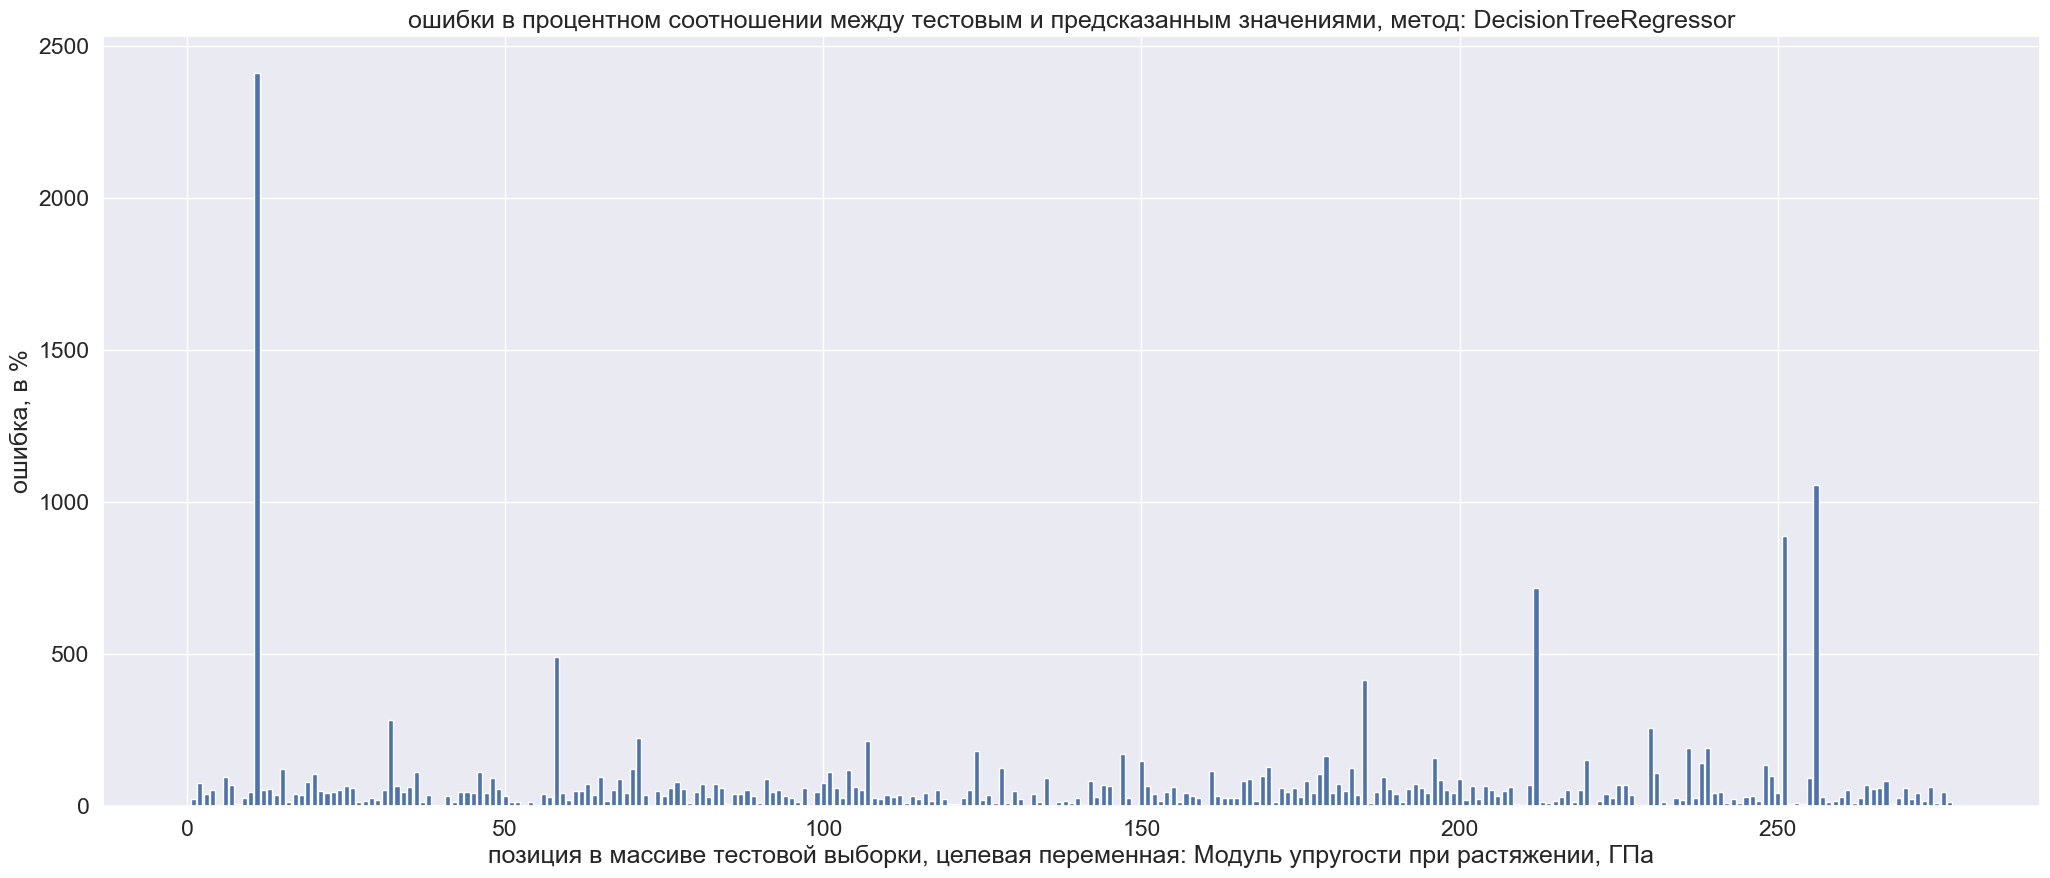

In [134]:
plot_percent_error(y1_test, y1_predict_dtr, "DecisionTreeRegressor", target1, 'Images\plot_percent_error_DTR1.png')

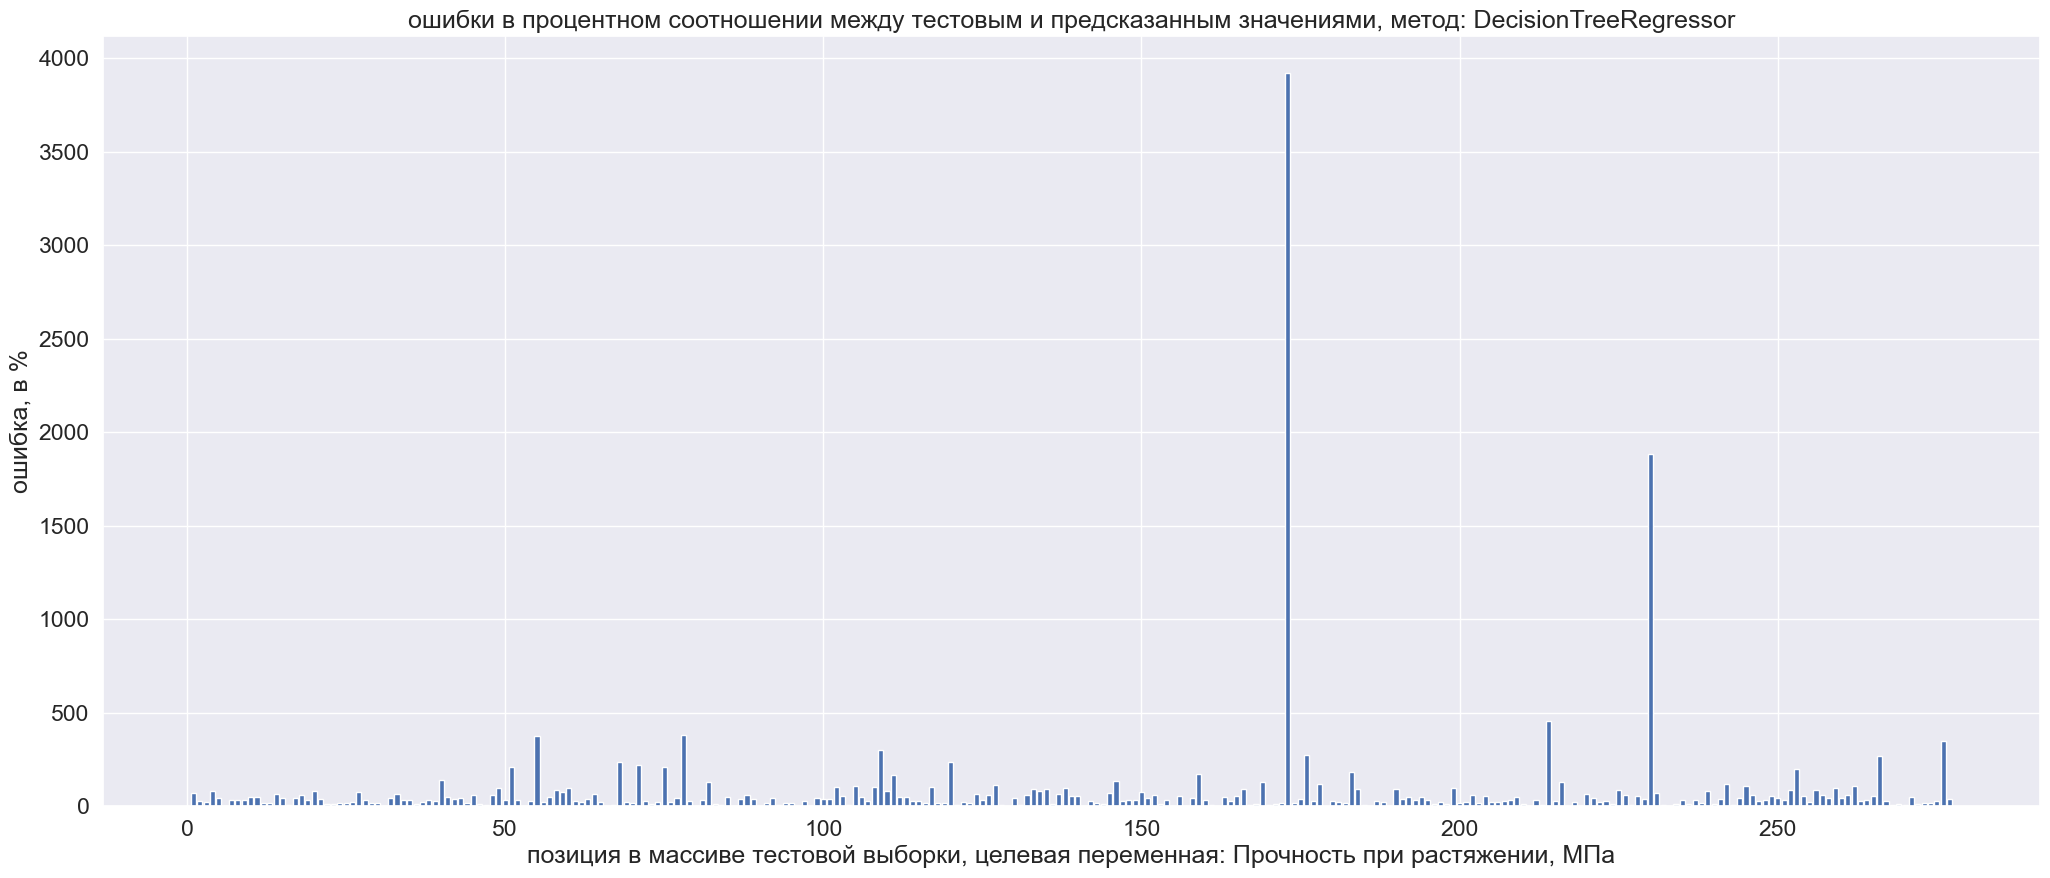

In [135]:
plot_percent_error(y2_test, y2_predict_dtr, "DecisionTreeRegressor", target2, 'Images\plot_percent_error_DTR2.png')

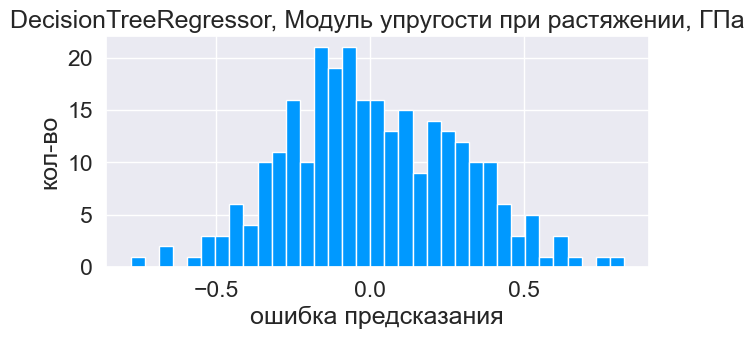

In [136]:
plot_error(y1_test, y1_predict_dtr, "DecisionTreeRegressor", target1, 'Images\plot_error_DTR1.png')

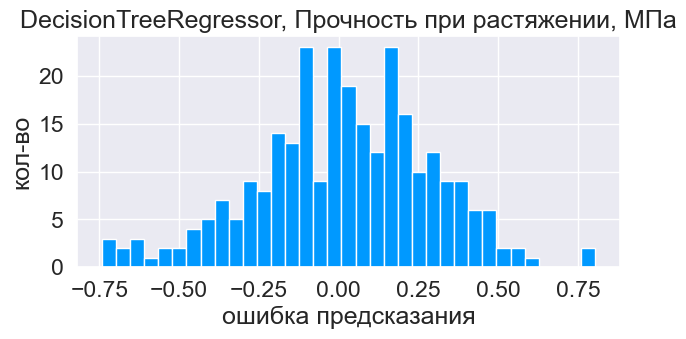

In [137]:
plot_error(y2_test, y2_predict_dtr, "DecisionTreeRegressor", target2, 'Images\plot_error_DTR2.png')

### настройка модели DecisionTreeRegressor на кросс-валидации, подбор гиперпараметров

In [138]:
params_dtr1 = {'criterion': ('squared_error', 'friedman_mse', 'absolute_error', 'poisson'),
               'splitter': ('best', 'random'),
               'min_samples_split':(2, 3, 4, 5, 6, 7, 8, 9, 10)}
print('целевая переменная: ', target1)
best_model_dtr1_estimator, best_model_dtr1_params, best_model_dtr1_score = val_grid_search(x1_train,
                                                                                           y1_train, 
                                                                                           Model_dtr1, 
                                                                                           params_dtr1, 
                                                                                           10)

целевая переменная:  Модуль упругости при растяжении, ГПа
Лучшая модель на кросс-валидации с параметрами {'criterion': 'poisson', 'min_samples_split': 10, 'splitter': 'random'} и результатом -0.5337


In [139]:
params_dtr2 = {'criterion': ('squared_error', 'friedman_mse', 'absolute_error', 'poisson'),
               'splitter': ('best', 'random'),
               'min_samples_split':(2, 3, 4, 5, 6, 7, 8, 9, 10)}
print('целевая переменная: ', target2)
best_model_dtr2_estimator, best_model_dtr2_params, best_model_dtr2_score = val_grid_search(x2_train, 
                                                                                           y2_train, 
                                                                                           Model_dtr2, 
                                                                                           params_dtr2, 
                                                                                           10)

целевая переменная:  Прочность при растяжении, МПа
Лучшая модель на кросс-валидации с параметрами {'criterion': 'poisson', 'min_samples_split': 10, 'splitter': 'random'} и результатом -0.5716


In [140]:
# сохраним информацию о кросс-валидации, подбор гиперпараметров для первой целевой переменной
df_predict_score = df_predict_score.append({'метод (регрессор)':'DecisionTreeRegressor',
                                            'целевая переменная':target1,
                                            'оценка ошибки':'R2',
                                            'значение ошибки':'-',
                                            'кросс-валидация (Да/Нет)':'Да',
                                            'кросс-валидация - значения гиперпараметров':str(best_model_dtr1_params),
                                            'кросс-валидация - значение ошибки':str(best_model_dtr1_score)}, ignore_index=True)

C:\Users\md15m\AppData\Local\Temp\ipykernel_22880\3439143684.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_predict_score = df_predict_score.append({'метод (регрессор)':'DecisionTreeRegressor',


In [141]:
# сохраним информацию о кросс-валидации, подбор гиперпараметров для второй целевой переменной
df_predict_score = df_predict_score.append({'метод (регрессор)':'DecisionTreeRegressor',
                                            'целевая переменная':target2,
                                            'оценка ошибки':'R2',
                                            'значение ошибки':'-',
                                            'кросс-валидация (Да/Нет)':'Да',
                                            'кросс-валидация - значения гиперпараметров':str(best_model_dtr2_params),
                                            'кросс-валидация - значение ошибки':str(best_model_dtr2_score)}, ignore_index=True)

C:\Users\md15m\AppData\Local\Temp\ipykernel_22880\2393544732.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_predict_score = df_predict_score.append({'метод (регрессор)':'DecisionTreeRegressor',


### Метод SGDRegressor (стохастический градиентный спуск)

In [142]:
from sklearn.linear_model import SGDRegressor

SGDRegressor (loss= , *, penalty='l2', alpha= 0,0001, l1_ratio=0,15, fit_intercept=True, max_iter= 1000,
              tol= 0,001, shuffle=True, verbose = 0, epsilon = 0,1, random_state=None, learning_rate='invscaling',
              eta0= 0.01, power_t= 0.25, early_stopping=False, validation_fraction= 0.1, n_iter_no_change= 5, 
              warm_start=False, average=False)

loss = 'squared_error' - Функция потерь, которая будет использоваться. Возможными значениями являются 'squared_error', 'huber', 'epsilon_insensitive' или 'squared_epsilon_insensitive'

    'squared_error' - относится к обычному методу наименьших квадратов.
    'huber' - изменяет ‘squared_error’, чтобы меньше фокусироваться на исправлении выбросов,
     переключаясь с квадратичных на линейные потери, превышающие расстояние эпсилон.
     'epsilon_insensitive' - игнорирует ошибки меньше, чем epsilon, и линейно превосходит их;
     это функция потерь, используемая в SVR. 
     'squared_epsilon_insensitive' - то же самое, но становится потерями в квадрате, превышающими допуск epsilon.


penalty = 'l2' - возможные значения {'l2', 'l1', 'elasticnet', None} - Штраф (он же термин регуляризации), который будет использоваться. По умолчанию используется значение 'l2', которое является стандартным регуляризатором для линейных моделей SVM. 'l1' и 'elasticnet' могут привести к разреженности модели (выбору объектов), недостижимой с помощью 'l2'. None - При установке значения не добавляется штраф.

alpha = 0,000 - Константа, которая умножает член регуляризации. Чем выше значение, тем сильнее регуляризация. Также используется для вычисления скорости обучения, когда установлено learning_rate значение 'optimal'.

l1_ratio = 0,15 - Параметр смешивания эластичной сетки с 0 <= l1_ratio <= 1. l1_ratio=0 соответствует штрафу L2, l1_ratio=1 - L1. Используется только в том случае, если penalty это 'elasticnet'.

fit_intercept bool = True - Следует ли оценивать перехват или нет. Если значение равно False, предполагается, что данные уже центрированы.

max_iter int = 1000 - Максимальное количество проходов по обучающим данным (иначе эпох). Это влияет только на поведение fit метода, а не на сам partial_fit метод.

tol= 0,001 - критерий остановки. Если это не None, обучение будет остановлено, когда (потеря> best_loss - tol) для n_iter_no_change последовательных эпох. Сходимость проверяется на потерю обучения или потерю проверки в зависимости от early_stopping параметра.

shuffle = True - Следует ли перетасовывать данные обучения после каждой эпохи.

verbose = 0 - Уровень детализации.

epsilon = 0,1 - Эпсилон в нечувствительных к эпсилону функциях потерь; только если loss это ‘huber’, ‘epsilon_insensitive’ или ‘squared_epsilon_insensitive’. Для ‘huber’ определяет порог, при котором становится менее важным точное предсказание. Для нечувствительных к эпсилону любые различия между текущим прогнозом и правильной меткой игнорируются, если они меньше этого порога.

random_state = None - Используется для перетасовки данных, когда shuffle установлено значение True. Передайте int для воспроизводимого вывода через несколько вызовов функций. 

learning_rate='invscaling' - График скорости обучения:

    возможные значения:
    'constant': eta = eta0
    'optimal': eta = 1.0 / (alpha * (t + t0)) где t0 выбирается с помощью эвристики, предложенной Леоном Ботту.
    'invscaling': eta = eta0 / pow(t, power_t)
    'adaptive': eta = eta0, пока обучение продолжает уменьшаться. Каждый раз, когда n_iter_no_change последовательных эпох
    не удается уменьшить потерю обучения на tol или не удается увеличить оценку проверки на tol, 
    если значение early_stopping равно True, текущая скорость обучения делится на 5.


eta0 = 0.01 - Начальная скорость обучения для 'constant', 'invscaling' или 'adaptive' графиков. 

power_t = 0.25 - Показатель для скорости обучения с обратным масштабированием.

early_stopping = False - Следует ли использовать раннюю остановку для завершения обучения, когда оценка проверки не улучшается. Если установлено значение True, он автоматически выделит часть обучающих данных в качестве проверки и завершит обучение, когда оценка проверки, возвращаемая score методом, не улучшается, по крайней мере tol, для n_iter_no_change последовательных эпох.

validation_fraction = 0.1 - Доля обучающих данных, которые необходимо отложить в качестве набора проверки для ранней остановки. Должно быть от 0 до 1. Используется только в том случае, если early_stopping имеет значение True.

n_iter_no_change = 5 - Количество итераций без улучшения, которые нужно дождаться, прежде чем остановить подгонку. Сходимость проверяется на потерю обучения или потерю проверки в зависимости от early_stopping параметра.

warm_start = False - Если установлено значение True, повторно используйте решение предыдущего вызова, чтобы соответствовать инициализации, в противном случае просто удалите предыдущее решение.

Повторный вызов fit или partial_fit при значении warm_start True может привести к решению, отличному от однократного вызова fit, из-за способа перетасовки данных. Если используется динамическая скорость обучения, скорость обучения адаптируется в зависимости от количества уже просмотренных образцов. Вызов fit сбрасывает этот счетчик, в то время partial_fit как приведет к увеличению существующего счетчика.

average = False - При значении True вычисляет усредненные веса SGD для всех обновлений и сохраняет результат в coef_attribute. Если значение int больше 1, усреднение начнется, как только будет достигнуто общее количество просмотренных выборок average. Итак average = 10, начнется усреднение после просмотра 10 образцов.

In [143]:
# стохастический градиентный спуск

# SGDR - целевая переменная "Модуль упругости при растяжении, ГПа"
Model_sgdr1 = SGDRegressor()
Model_sgdr1.fit(x1_train, y1_train)
y1_predict_sgdr = Model_sgdr1.predict(x1_test)

# SGDR - целевая переменная "Прочность при растяжении, МПа"
Model_sgdr2 = SGDRegressor()
Model_sgdr2.fit(x2_train, y2_train)
y2_predict_sgdr = Model_sgdr2.predict(x2_test)

In [144]:
# оценка точности предсказания
# используем коэффициент детерминации прогноза - метод score в SGDR
# коэффициент детерминации  определяется как (1 - u/v) 
# где u - является остаточной суммой квадратов ((y_true - y_pred)** 2).sum() 
#     v - является общей суммой квадратов ((y_true - y_true.mean()) ** 2).sum(). 
# наилучший возможный результат равен 1.0, и он может быть отрицательным (потому что модель может быть сколь угодно хуже).
print('целевая переменная: ', target1)
print("коэффициент детерминации прогноза, тренировочная выборка:", Model_sgdr1.score(x1_train, y1_train))
print("коэффициент детерминации прогноза,   проверочная выборка:", Model_sgdr1.score(x1_test, y1_test))
print('======')
print('целевая переменная: ', target2)
print("коэффициент детерминации прогноза, тренировочная выборка:", Model_sgdr2.score(x2_train, y2_train))
print("коэффициент детерминации прогноза,   проверочная выборка:", Model_sgdr2.score(x2_test, y2_test))

целевая переменная:  Модуль упругости при растяжении, ГПа
коэффициент детерминации прогноза, тренировочная выборка: -0.026974074465329734
коэффициент детерминации прогноза,   проверочная выборка: -0.00039591832098095914
целевая переменная:  Прочность при растяжении, МПа
коэффициент детерминации прогноза, тренировочная выборка: -0.06210179662879267
коэффициент детерминации прогноза,   проверочная выборка: -0.01959618634593907


In [145]:
# сохраним информацию о r2_score для первой целевой переменной
df_predict_score = df_predict_score.append({'метод (регрессор)':'SGDRegressor',
                                            'целевая переменная':target1,
                                            'оценка ошибки':'R2',
                                            'значение ошибки':r2_score(y1_test, y1_predict_sgdr),
                                            'кросс-валидация (Да/Нет)':'Нет',
                                            'кросс-валидация - значения гиперпараметров':'-',
                                            'кросс-валидация - значение ошибки':'-'}, ignore_index=True)

C:\Users\md15m\AppData\Local\Temp\ipykernel_22880\3812270432.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_predict_score = df_predict_score.append({'метод (регрессор)':'SGDRegressor',


In [146]:
# сохраним информацию о r2_score для второй целевой переменной
df_predict_score = df_predict_score.append({'метод (регрессор)':'SGDRegressor',
                                            'целевая переменная':target2,
                                            'оценка ошибки':'R2',
                                            'значение ошибки':r2_score(y2_test, y2_predict_sgdr),
                                            'кросс-валидация (Да/Нет)':'Нет',
                                            'кросс-валидация - значения гиперпараметров':'-',
                                            'кросс-валидация - значение ошибки':'-'}, ignore_index=True)

C:\Users\md15m\AppData\Local\Temp\ipykernel_22880\972662117.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_predict_score = df_predict_score.append({'метод (регрессор)':'SGDRegressor',


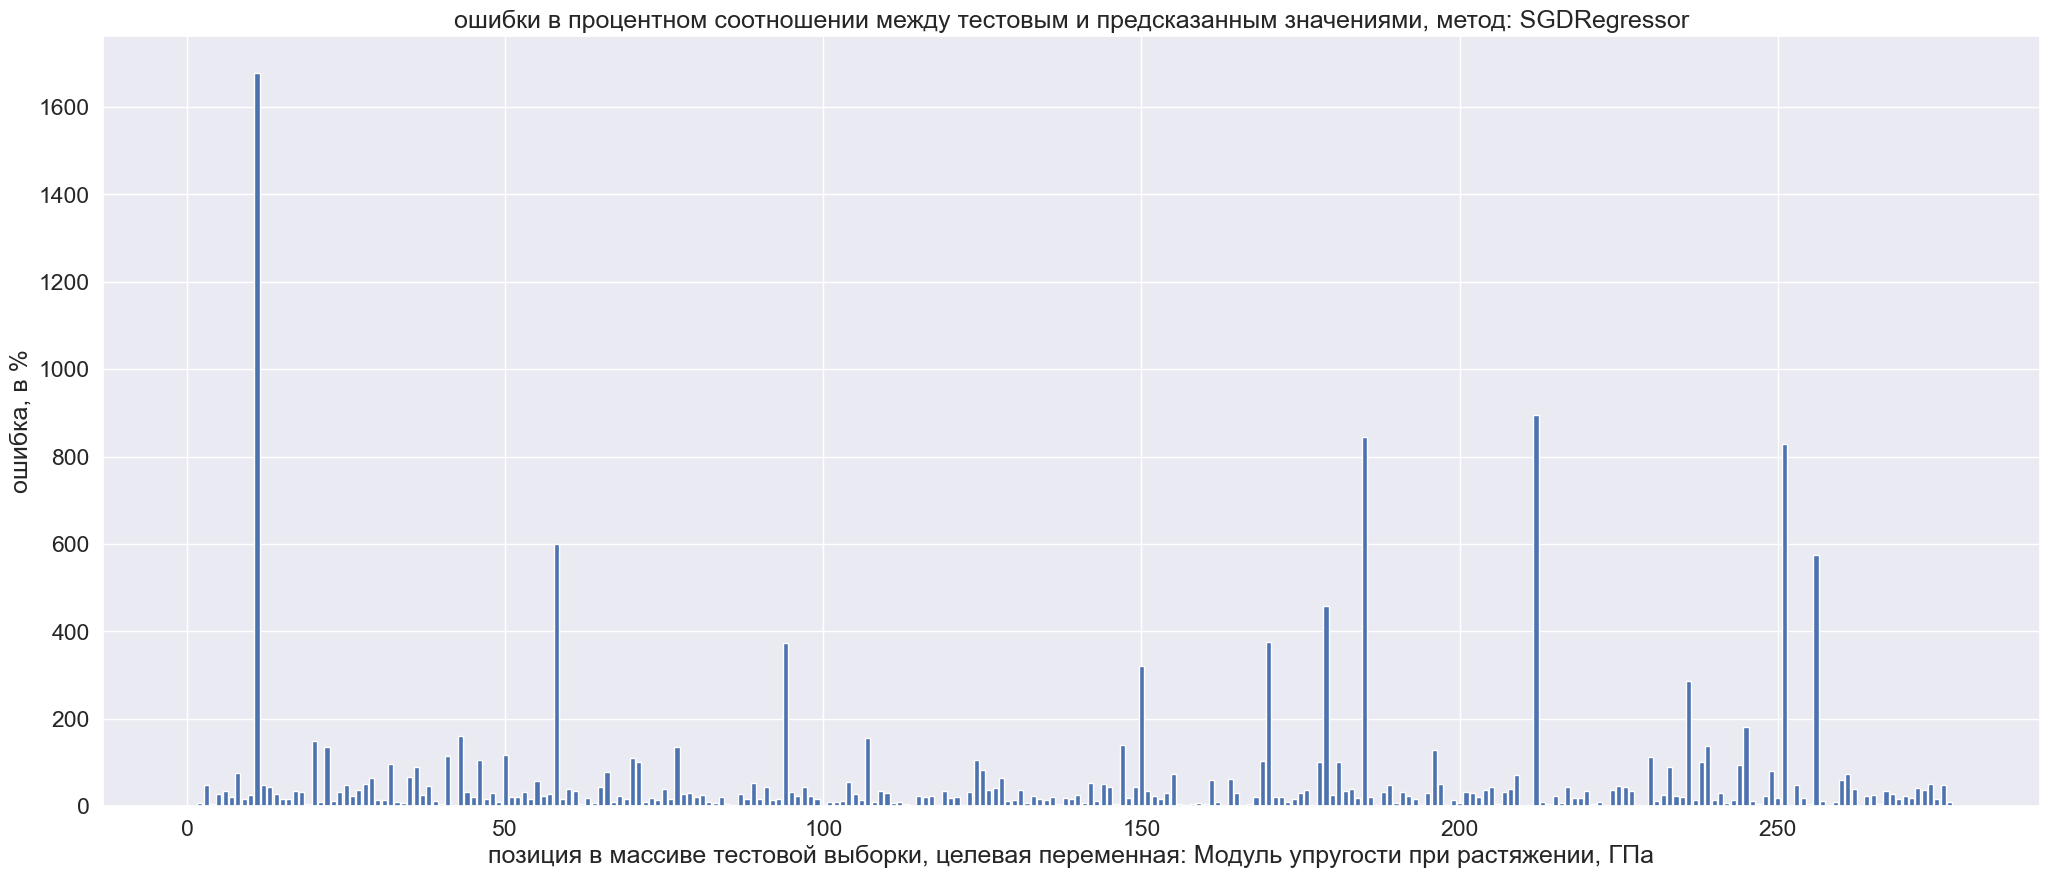

In [147]:
plot_percent_error(y1_test, y1_predict_sgdr, "SGDRegressor", target1, 'Images\plot_percent_error_SGDR1.png')

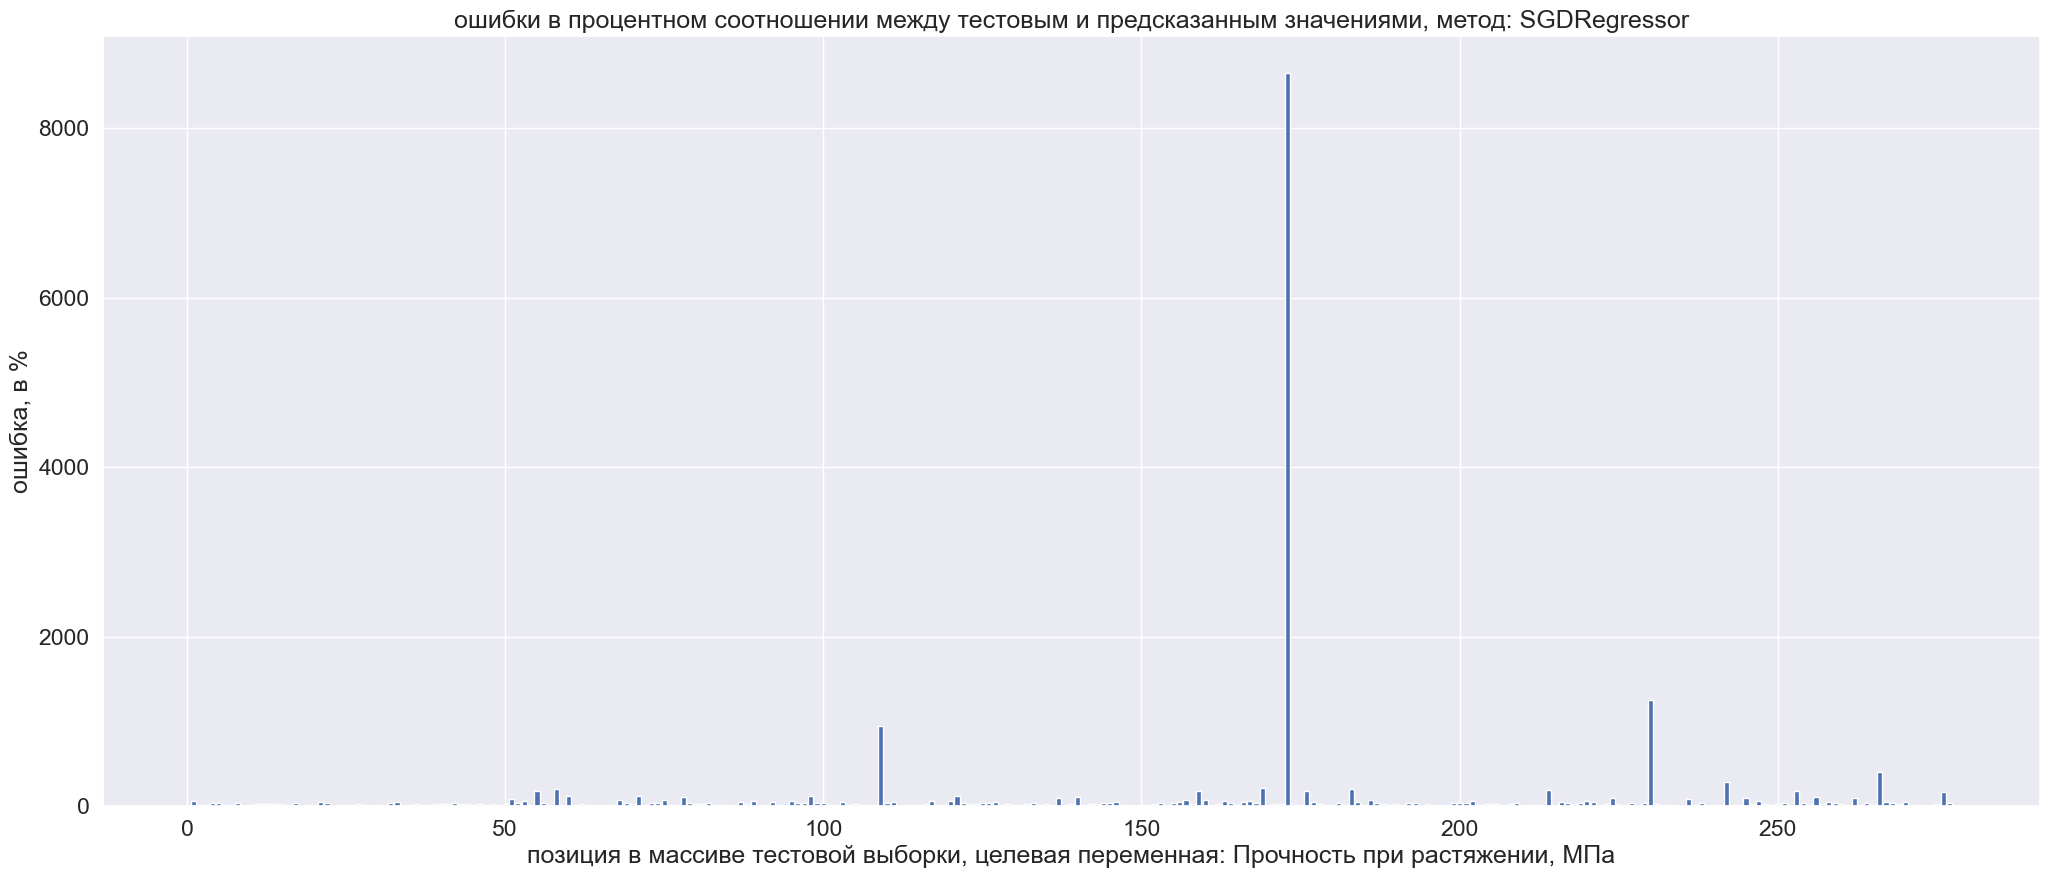

In [148]:
plot_percent_error(y2_test, y2_predict_sgdr, "SGDRegressor", target2, 'Images\plot_percent_error_SGDR2.png')

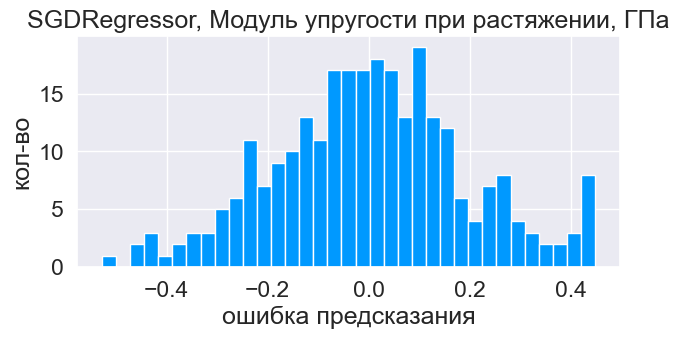

In [149]:
plot_error(y1_test, y1_predict_sgdr, "SGDRegressor", target1, 'Images\plot_error_SGDR1.png')

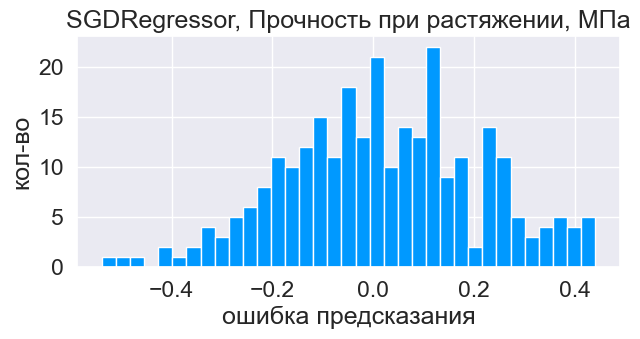

In [150]:
plot_error(y2_test, y2_predict_sgdr, "SGDRegressor", target2, 'Images\plot_error_SGDR2.png')

### настройка модели SGDRegressor на кросс-валидации, подбор гиперпараметров

In [151]:
params_sgdr1 = {'loss': ('squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'),
               'penalty': ('l2', 'l1', 'elasticnet', None),
               'alpha':(0.0, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0),
               'l1_ratio':(0.0, 0.1, 0.15, 0.2, 0.5, 0.7, 1.0),
               'fit_intercept':(True, False),
               'tol':(0.001, 0.0000001),
               'epsilon':(0.1, 0.01, 0.001)}
print('целевая переменная: ', target1)
best_model_sgdr1_estimator, best_model_sgdr1_params, best_model_sgdr1_score = val_grid_search(x1_train,
                                                                                              y1_train,
                                                                                              Model_sgdr1,
                                                                                              params_sgdr1,
                                                                                              10)

целевая переменная:  Модуль упругости при растяжении, ГПа
Лучшая модель на кросс-валидации с параметрами {'alpha': 5.0, 'epsilon': 0.01, 'fit_intercept': True, 'l1_ratio': 0.7, 'loss': 'epsilon_insensitive', 'penalty': 'l2', 'tol': 0.001} и результатом -0.0027


In [152]:
params_sgdr2 = {'loss': ('squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'),
               'penalty': ('l2', 'l1', 'elasticnet', None),
               'alpha':(0.0, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0),
               'l1_ratio':(0.0, 0.1, 0.15, 0.2, 0.5, 0.7, 1.0),
               'fit_intercept':(True, False),
               'tol':(0.001, 0.0000001),
               'epsilon':(0.1, 0.01, 0.001)}
print('целевая переменная: ', target2)
best_model_sgdr2_estimator, best_model_sgdr2_params, best_model_sgdr2_score = val_grid_search(x2_train, 
                                                                                              y2_train, 
                                                                                              Model_sgdr2, 
                                                                                              params_sgdr2, 
                                                                                              10)

целевая переменная:  Прочность при растяжении, МПа
Лучшая модель на кросс-валидации с параметрами {'alpha': 2.0, 'epsilon': 0.01, 'fit_intercept': True, 'l1_ratio': 0.1, 'loss': 'epsilon_insensitive', 'penalty': 'l2', 'tol': 1e-07} и результатом -0.0055


In [153]:
# сохраним информацию о кросс-валидации, подбор гиперпараметров для первой целевой переменной
df_predict_score = df_predict_score.append({'метод (регрессор)':'SGDRegressor',
                                            'целевая переменная':target1,
                                            'оценка ошибки':'R2',
                                            'значение ошибки':'-',
                                            'кросс-валидация (Да/Нет)':'Да',
                                            'кросс-валидация - значения гиперпараметров':str(best_model_sgdr1_params),
                                            'кросс-валидация - значение ошибки':str(best_model_sgdr1_score)}, ignore_index=True)

C:\Users\md15m\AppData\Local\Temp\ipykernel_22880\3053925925.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_predict_score = df_predict_score.append({'метод (регрессор)':'SGDRegressor',


In [154]:
# сохраним информацию о кросс-валидации, подбор гиперпараметров для второй целевой переменной
df_predict_score = df_predict_score.append({'метод (регрессор)':'SGDRegressor',
                                            'целевая переменная':target2,
                                            'оценка ошибки':'R2',
                                            'значение ошибки':'-',
                                            'кросс-валидация (Да/Нет)':'Да',
                                            'кросс-валидация - значения гиперпараметров':str(best_model_sgdr2_params),
                                            'кросс-валидация - значение ошибки':str(best_model_sgdr2_score)}, ignore_index=True)

C:\Users\md15m\AppData\Local\Temp\ipykernel_22880\534825031.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_predict_score = df_predict_score.append({'метод (регрессор)':'SGDRegressor',


### Метод LinearRegression (линейная регрессия)

In [155]:
from sklearn.linear_model import LinearRegression

LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)

fit_intercept = True - Следует ли вычислять перехват для этой модели. Если установлено значение False, перехват не будет использоваться в вычислениях (т. Е. Ожидается, что данные будут центрированы).

copy_X = True - Если True, X будет скопирован; в противном случае он может быть перезаписан.

n_jobs = None - Количество заданий, используемых для вычисления. Это обеспечит ускорение только в случае достаточно больших проблем, то есть, если n_targets > 1Xfirst и second являются разреженными или если positive установлено значение True. None означает 1, если только в joblib.parallel_backendконтексте. -1 означает использование всех процессоров. Более подробную информацию см. в Глоссарии.

positive = False -Когда установлено значение True, коэффициенты должны быть положительными. Эта опция поддерживается только для плотных массивов.

In [156]:
# линейная регрессия

# LR - целевая переменная "Модуль упругости при растяжении, ГПа"
Model_lr1 = LinearRegression()
Model_lr1.fit(x1_train, y1_train)
y1_predict_lr = Model_lr1.predict(x1_test)

# LR - целевая переменная "Прочность при растяжении, МПа"
Model_lr2 = LinearRegression()
Model_lr2.fit(x2_train, y2_train)
y2_predict_lr = Model_lr2.predict(x2_test)

In [157]:
# оценка точности предсказания
# используем коэффициент детерминации прогноза - метод score в LR
# коэффициент детерминации  определяется как (1 - u/v) 
# где u - является остаточной суммой квадратов ((y_true - y_pred)** 2).sum() 
#     v - является общей суммой квадратов ((y_true - y_true.mean()) ** 2).sum(). 
# наилучший возможный результат равен 1.0, и он может быть отрицательным (потому что модель может быть сколь угодно хуже).
print('целевая переменная: ', target1)
print("коэффициент детерминации прогноза, тренировочная выборка:", Model_lr1.score(x1_train, y1_train))
print("коэффициент детерминации прогноза,   проверочная выборка:", Model_lr1.score(x1_test, y1_test))
print('======')
print('целевая переменная: ', target2)
print("коэффициент детерминации прогноза, тренировочная выборка:", Model_lr2.score(x2_train, y2_train))
print("коэффициент детерминации прогноза,   проверочная выборка:", Model_lr2.score(x2_test, y2_test))

целевая переменная:  Модуль упругости при растяжении, ГПа
коэффициент детерминации прогноза, тренировочная выборка: 0.014388223837901615
коэффициент детерминации прогноза,   проверочная выборка: -0.01708773382071138
целевая переменная:  Прочность при растяжении, МПа
коэффициент детерминации прогноза, тренировочная выборка: 0.02744733022102308
коэффициент детерминации прогноза,   проверочная выборка: -0.025184214394478932


In [158]:
# сохраним информацию о r2_score для первой целевой переменной
df_predict_score = df_predict_score.append({'метод (регрессор)':'LinearRegression',
                                            'целевая переменная':target1,
                                            'оценка ошибки':'R2',
                                            'значение ошибки':r2_score(y1_test, y1_predict_lr),
                                            'кросс-валидация (Да/Нет)':'Нет',
                                            'кросс-валидация - значения гиперпараметров':'-',
                                            'кросс-валидация - значение ошибки':'-'}, ignore_index=True)

C:\Users\md15m\AppData\Local\Temp\ipykernel_22880\1830429668.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_predict_score = df_predict_score.append({'метод (регрессор)':'LinearRegression',


In [159]:
# сохраним информацию о r2_score для второй целевой переменной
df_predict_score = df_predict_score.append({'метод (регрессор)':'LinearRegression',
                                            'целевая переменная':target2,
                                            'оценка ошибки':'R2',
                                            'значение ошибки':r2_score(y2_test, y2_predict_lr),
                                            'кросс-валидация (Да/Нет)':'Нет',
                                            'кросс-валидация - значения гиперпараметров':'-',
                                            'кросс-валидация - значение ошибки':'-'}, ignore_index=True)

C:\Users\md15m\AppData\Local\Temp\ipykernel_22880\288866147.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_predict_score = df_predict_score.append({'метод (регрессор)':'LinearRegression',


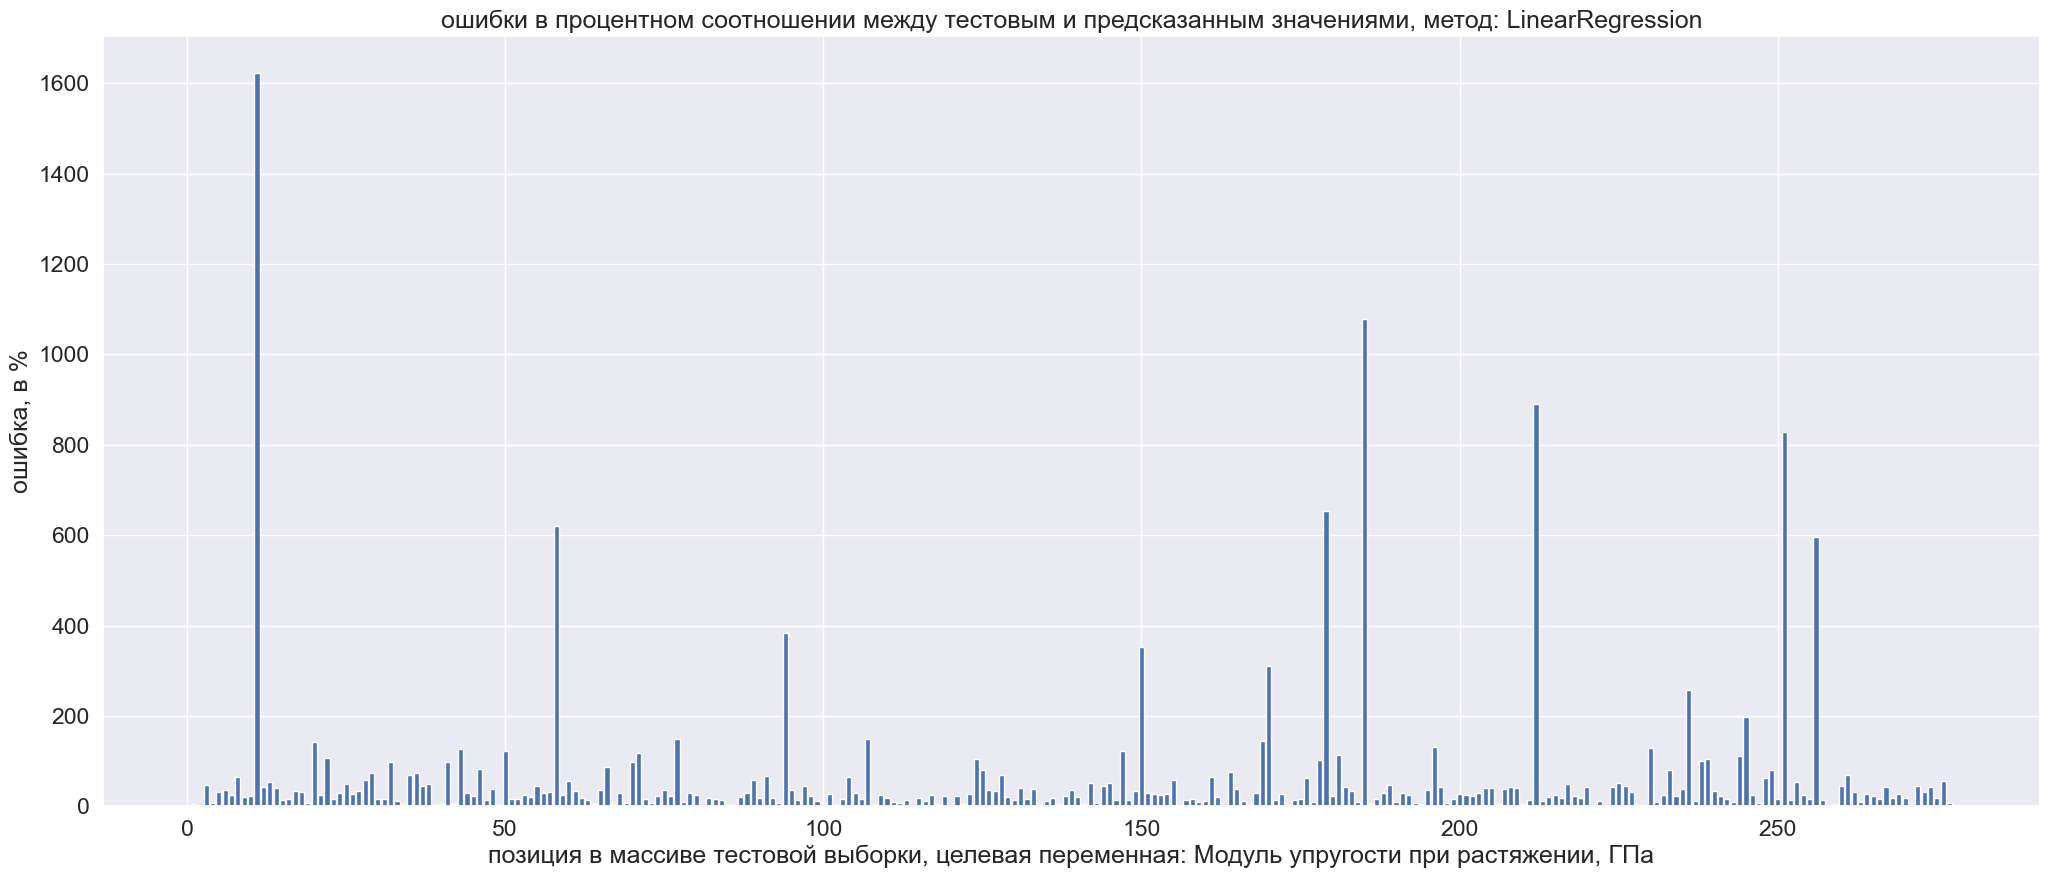

In [160]:
plot_percent_error(y1_test, y1_predict_lr, "LinearRegression", target1, 'Images\plot_percent_error_LR1.png')

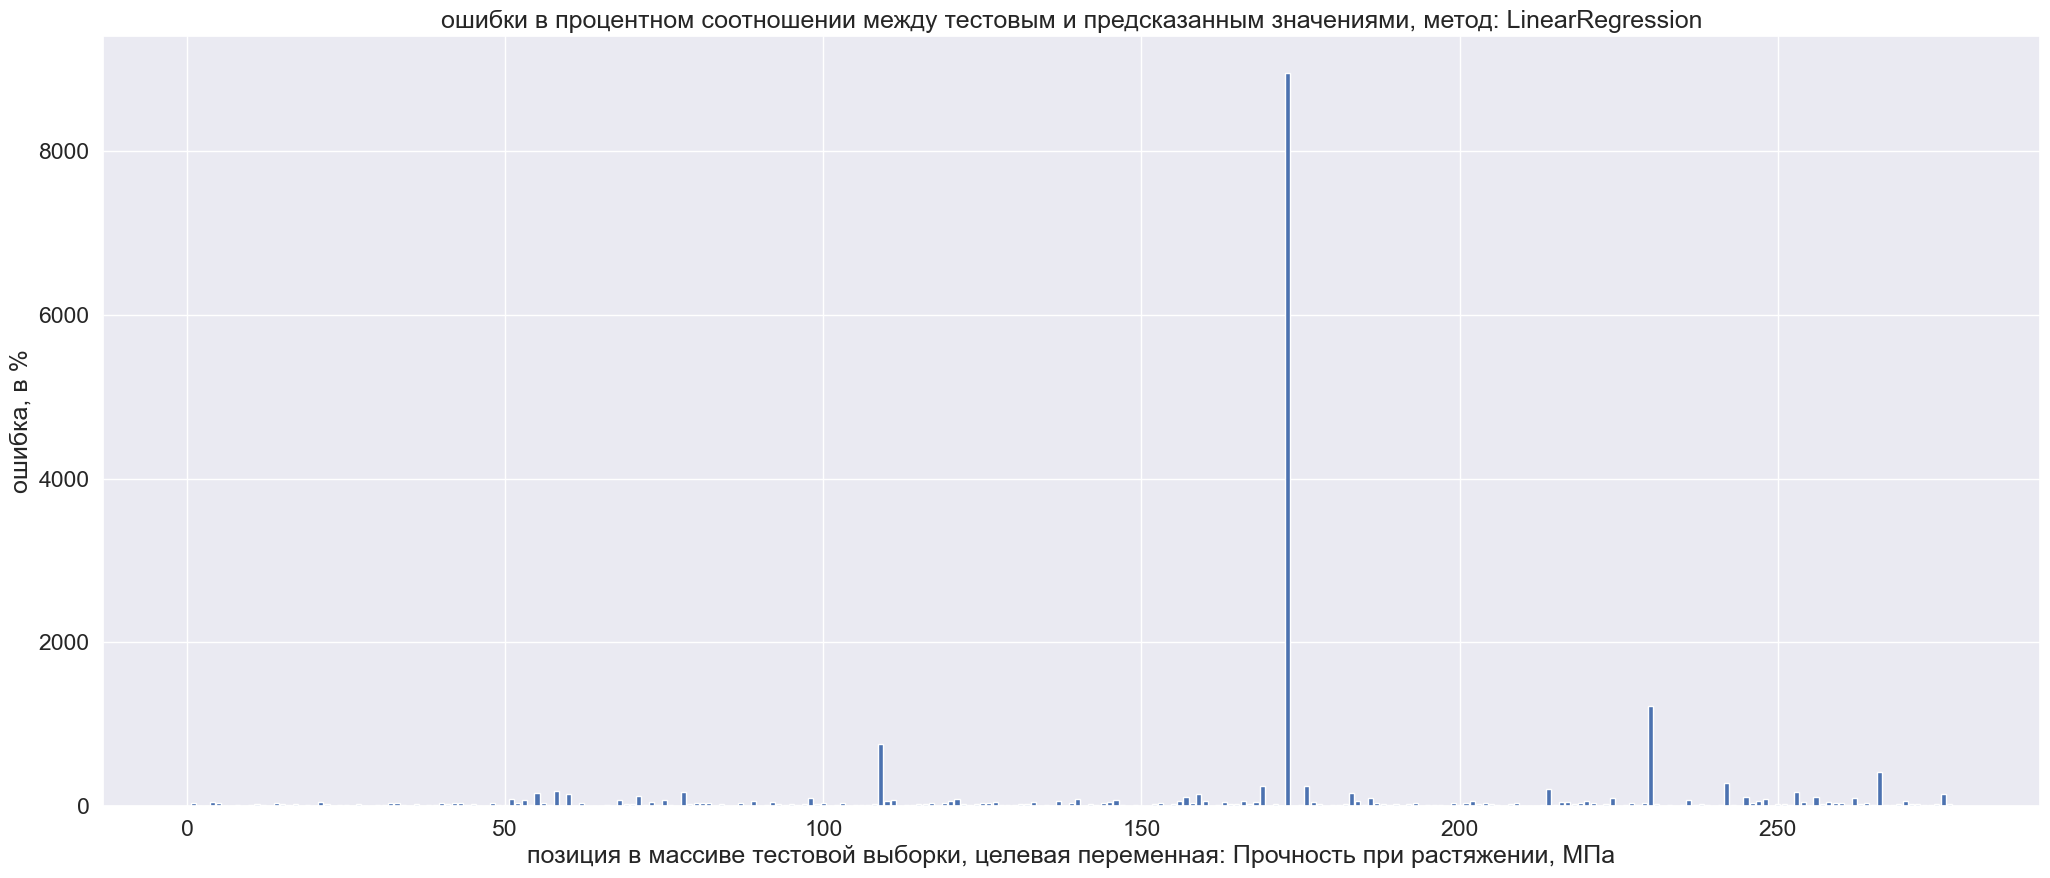

In [161]:
plot_percent_error(y2_test, y2_predict_lr, "LinearRegression", target2, 'Images\plot_percent_error_LR2.png')

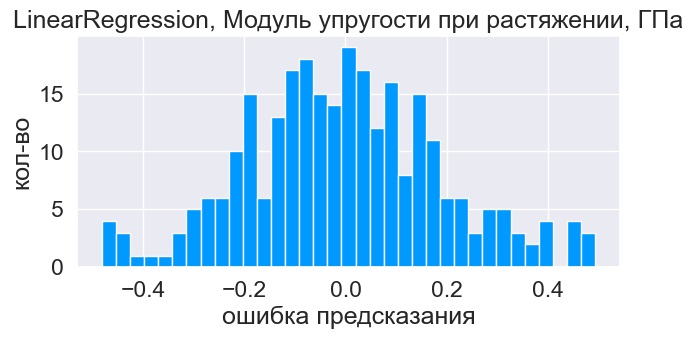

In [162]:
plot_error(y1_test, y1_predict_lr, "LinearRegression", target1, 'Images\plot_error_LR1.png')

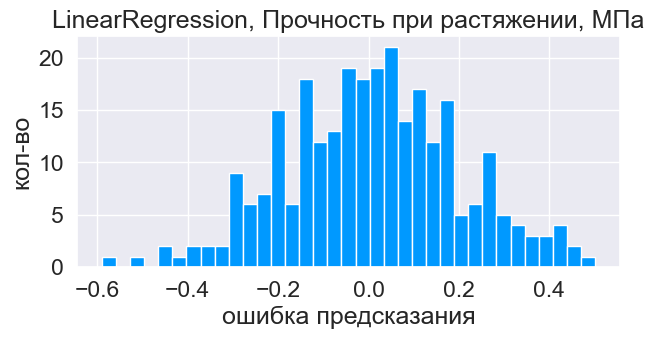

In [163]:
plot_error(y2_test, y2_predict_lr, "LinearRegression", target2, 'Images\plot_error_LR2.png')

In [164]:
# сводная таблица результатов предсказаний используемых выше при анализе методов
df_predict_score.head(100)

метод (регрессор)                    целевая переменная  \
0   Support Vector regression  Модуль упругости при растяжении, ГПа   
1   Support Vector regression         Прочность при растяжении, МПа   
2   Support Vector regression  Модуль упругости при растяжении, ГПа   
3   Support Vector regression         Прочность при растяжении, МПа   
4         KNeighborsRegressor  Модуль упругости при растяжении, ГПа   
5         KNeighborsRegressor         Прочность при растяжении, МПа   
6         KNeighborsRegressor  Модуль упругости при растяжении, ГПа   
7         KNeighborsRegressor         Прочность при растяжении, МПа   
8       DecisionTreeRegressor  Модуль упругости при растяжении, ГПа   
9       DecisionTreeRegressor         Прочность при растяжении, МПа   
10      DecisionTreeRegressor  Модуль упругости при растяжении, ГПа   
11      DecisionTreeRegressor         Прочность при растяжении, МПа   
12               SGDRegressor  Модуль упругости при растяжении, ГПа   
13               SGDRegressor         Прочность при растяжении, МПа   
14               SGDRegressor  Модуль упругости при растяжении, ГПа   
15               SGDRegressor         Прочность при растяжении, МПа   
16           LinearRegression  Модуль упругости при растяжении, ГПа   
17           LinearRegression         Прочность при растяжении, МПа   

   оценка ошибки значение ошибки кросс-валидация (Да/Нет)  \
0             R2       -0.230407                      Нет   
1             R2       -0.164355                      Нет   
2             R2               -                       Да   
3             R2               -                       Да   
4             R2       -0.235812                      Нет   
5             R2       -0.190498                      Нет   
6             R2               -                       Да   
7             R2               -                       Да   
8             R2       -1.073928                      Нет   
9             R2       -1.077886                      Нет   
10            R2               -                       Да   
11            R2               -                       Да   
12            R2       -0.000396                      Нет   
13            R2       -0.019596                      Нет   
14            R2               -                       Да   
15            R2               -                       Да   
16            R2       -0.017088                      Нет   
17            R2       -0.025184                      Нет   

           кросс-валидация - значения гиперпараметров  \
0                                                   -   
1                                                   -   
2   {'C': 1, 'degree': 5, 'gamma': 'auto', 'kernel...   
3   {'C': 1, 'degree': 5, 'gamma': 'auto', 'kernel...   
4                                                   -   
5                                                   -   
6   {'algorithm': 'auto', 'n_neighbors': 10, 'weig...   
7   {'algorithm': 'auto', 'n_neighbors': 10, 'weig...   
8                                                   -   
9                                                   -   
10  {'criterion': 'poisson', 'min_samples_split': ...   
11  {'criterion': 'poisson', 'min_samples_split': ...   
12                                                  -   
13                                                  -   
14  {'alpha': 5.0, 'epsilon': 0.01, 'fit_intercept...   
15  {'alpha': 2.0, 'epsilon': 0.01, 'fit_intercept...   
16                                                  -   
17                                                  -   

   кросс-валидация - значение ошибки  
0                                  -  
1                                  -  
2               -0.01076477849031714  
3              -0.016290715949112723  
4                                  -  
5                                  -  
6                -0.1545096427401985  
7                 -0.156462799010936  
8                                  -  
9                           

In [165]:
print("Время выполнения ноутбука: %s seconds" % (time.time() - start_time))

Время выполнения ноутбука: 1074.0019965171814 seconds


In [166]:
# Вывод: анализ графиков ошибок предсказания и сводной таблицы используемых в анализе методов регрессии,
# показывает, что применительно к исследуемому набору данных примененные методы дают плохой результат.

In [167]:
pip list > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [168]:
# сохраним датасет в файл (резервирование данных)
df_predict_score.to_excel("Data/Models_score.xlsx")